In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import markovify
import missingno as msno
import nltk

In [4]:
gen_df = pd.read_csv('AppleStore.csv')
desc_df = pd.read_csv('appleStore_description.csv') 

In [5]:
gen_df.head()

Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver     ver cont_rating   prime_genre  \
0          4.0              4.5   6.3.5          4+         Games   
1          4.0              3.5   8.2.2          4+  Productivity   
2          3.5              4.5   5.0.0          4+       Weather   
3          4.0              4.5  5.10.0         12+      Shopping   
4          4.5              5.0   7.5.1          4+     Reference   

   sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  
0               38                5        10        1  
1               37                5        23        1  
2               37                5         3        1  
3               37                5         9        1  
4               37                5        45        1

In [6]:
desc_df.head()

id                                         track_name  size_bytes  \
0  281656475                                    PAC-MAN Premium   100788224   
1  281796108                          Evernote - stay organized   158578688   
2  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   100524032   
3  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   128512000   
4  282935706                                              Bible    92774400   

                                            app_desc  
0  SAVE 20%, now only $3.99 for a limited time!\n...  
1  Let Evernote change the way you organize your ...  
2  Download the most popular free weather app pow...  
3  The eBay app is the best way to find anything ...  
4  On more than 250 million devices around the wo...

In [7]:
# creating a merged dataframe that includes description information

apps_df = pd.merge(gen_df, desc_df[['id','app_desc']],on='id', how='left')

In [8]:
apps_df.head()

Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver     ver cont_rating   prime_genre  \
0          4.0              4.5   6.3.5          4+         Games   
1          4.0              3.5   8.2.2          4+  Productivity   
2          3.5              4.5   5.0.0          4+       Weather   
3          4.0              4.5  5.10.0         12+      Shopping   
4          4.5              5.0   7.5.1          4+     Reference   

   sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  \
0               38                5        10        1   
1               37                5        23        1   
2               37                5         3        1   
3               37                5         9        1   
4               37                5        45        1   

                                            app_desc  
0  SAVE 20%, now only $3.99 for a limited time!\n...  
1  Let Evernote change the way you organize your ...  
2  Download the most popular free weather app pow...  
3  The eBay app is the best way to find anything ...  
4  On more than 250 million devices around the wo...

In [9]:
apps_df.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
app_desc             object
dtype: object

In [10]:
apps_df['cont_rating'].unique()

array(['4+', '12+', '17+', '9+'], dtype=object)

In [11]:
def per_label(val, total):
    return str(int(val/total * 100)) + '%'

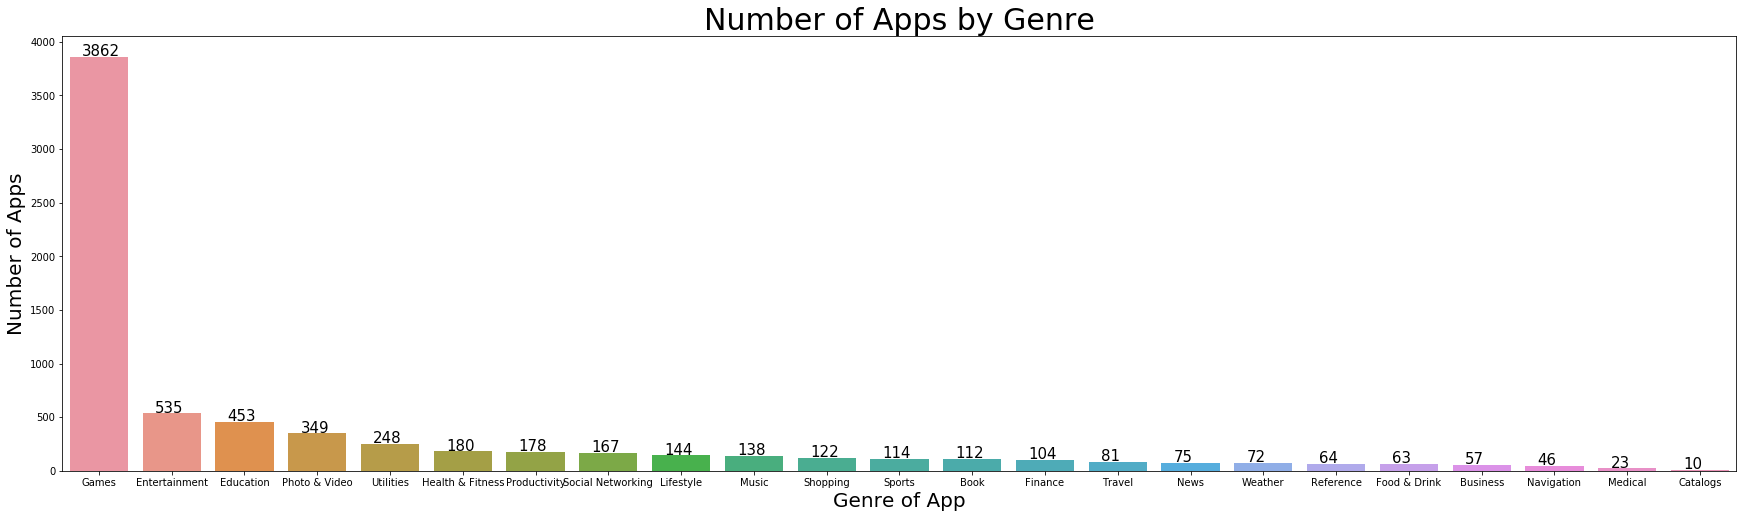

In [12]:
# graph of the number of apps in each genre

%matplotlib inline
plt.figure(figsize = (30,8))
ax = sb.countplot(data = apps_df, x = 'prime_genre', order = apps_df['prime_genre'].value_counts().index)
ax
ax.set_title('Number of Apps by Genre', fontsize = 30)
ax.set_xlabel('Genre of App', fontsize = 20)
ax.set_ylabel('Number of Apps', fontsize = 20)

for p, label in zip(ax.patches, apps_df['prime_genre'].value_counts()):
    ax.annotate(label, (p.get_x()+0.17, p.get_height()+10), fontsize = 15)

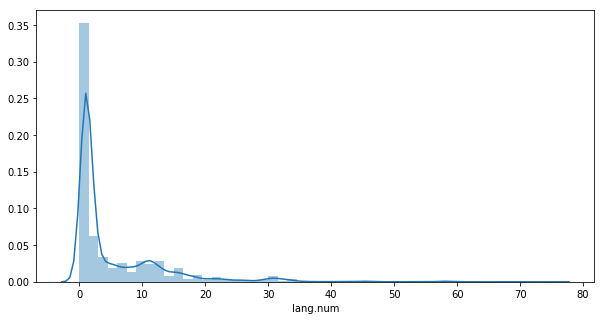

In [13]:
# distribution across languages

%matplotlib inline
plt.figure(figsize = (10,5))
ax = sb.distplot(apps_df['lang.num'])
# ax.set_title('Number of Apps by Genre', fontsize = 30)
# ax.set_xlabel('Genre of App', fontsize = 20)
# ax.set_ylabel('Number of Apps', fontsize = 20)

In [14]:
apps_df.describe()

Unnamed: 0            id    size_bytes        price  \
count   7197.000000  7.197000e+03  7.197000e+03  7197.000000   
mean    4759.069612  8.631310e+08  1.991345e+08     1.726218   
std     3093.625213  2.712368e+08  3.592069e+08     5.833006   
min        1.000000  2.816565e+08  5.898240e+05     0.000000   
25%     2090.000000  6.000937e+08  4.692275e+07     0.000000   
50%     4380.000000  9.781482e+08  9.715302e+07     0.000000   
75%     7223.000000  1.082310e+09  1.819249e+08     1.990000   
max    11097.000000  1.188376e+09  4.025970e+09   299.990000   

       rating_count_tot  rating_count_ver  user_rating  user_rating_ver  \
count      7.197000e+03       7197.000000  7197.000000      7197.000000   
mean       1.289291e+04        460.373906     3.526956         3.253578   
std        7.573941e+04       3920.455183     1.517948         1.809363   
min        0.000000e+00          0.000000     0.000000         0.000000   
25%        2.800000e+01          1.000000     3.500000         2.500000   
50%        3.000000e+02         23.000000     4.000000         4.000000   
75%        2.793000e+03        140.000000     4.500000         4.500000   
max        2.974676e+06     177050.000000     5.000000         5.000000   

       sup_devices.num  ipadSc_urls.num     lang.num      vpp_lic  
count      7197.000000      7197.000000  7197.000000  7197.000000  
mean         37.361817         3.707100     5.434903     0.993053  
std           3.737715         1.986005     7.919593     0.083066  
min           9.000000         0.000000     0.000000     0.000000  
25%          37.000000         3.000000     1.000000     1.000000  
50%          37.000000         5.000000     1.000000     1.000000  
75%          38.000000         5.000000     8.000000     1.000000  
max          47.000000         5.000000    75.000000     1.000000

In [15]:
apps_df.groupby('prime_genre').get_group('Sports')

sports_model = markovify.NewlineText(apps_df.groupby('prime_genre').get_group('Sports')['app_desc'], state_size = 2)

In [16]:
for i in range(10):
    print(sports_model.make_sentence())

• Open a stream for scores, stories, videos, and unlock cool digital gear for your favorite team’s top videos and photos
- For more information visit the terms of use and privacy policy:
If you are not available for every game.
* Tennis – Wimbledon, US Open Tennis Championships, designed and developed by IBM
Score App 『 HOOP J “ !!
The ultimate app for the USAV two libero rules
• The most important parts of your game and track star distribution for game day
+ Trace your golf ball finding apps often take longer to find the tee time reservations near cities, landmarks and more
With more than 30,000 courses
• UEFA Champions league and the latest news direct from Rio 2016, PyeongChang 2018


In [17]:
apps_df

Unnamed: 0          id  \
0              1   281656475   
1              2   281796108   
2              3   281940292   
3              4   282614216   
4              5   282935706   
5              6   283619399   
6              7   283646709   
7              8   284035177   
8              9   284666222   
9             10   284736660   
10            11   284791396   
11            12   284815117   
12            13   284815942   
13            14   284847138   
14            15   284862767   
15            16   284876795   
16            17   284882215   
17            18   284910350   
18            20   284993459   
19            21   285005463   
20            22   285946052   
21            23   285994151   
22            24   286058814   
23            25   286070473   
24            27   286799607   
25            28   286906691   
26            29   286911400   
27            31   288113403   
28            32   288120394   
29            33   288419283   
...          ...         ...   
7167       10995  1182265441   
7168       10998  1182331762   
7169       11002  1182568288   
7170       11010  1183234072   
7171       11013  1183260922   
7172       11016  1183548754   
7173       11019  1183709176   
7174       11022  1183856228   
7175       11024  1183986102   
7176       11027  1184711626   
7177       11031  1184800011   
7178       11033  1185209084   
7179       11035  1185328193   
7180       11036  1185365336   
7181       11038  1185428381   
7182       11040  1185538497   
7183       11041  1185580782   
7184       11042  1185731859   
7185       11043  1185777521   
7186       11050  1186108496   
7187       11051  1186126548   
7188       11060  1186384912   
7189       11074  1187128255   
7190       11077  1187279979   
7191       11079  1187282363   
7192       11081  1187617475   
7193       11082  1187682390   
7194       11087  1187779532   
7195       11089  1187838770   
7196       11097  1188375727   

                                             track_name  size_bytes currency  \
0                                       PAC-MAN Premium   100788224      USD   
1                             Evernote - stay organized   158578688      USD   
2       WeatherBug - Local Weather, Radar, Maps, Alerts   100524032      USD   
3     eBay: Best App to Buy, Sell, Save! Online Shop...   128512000      USD   
4                                                 Bible    92774400      USD   
5                                      Shanghai Mahjong    10485713      USD   
6                PayPal - Send and request money safely   227795968      USD   
7                               Pandora - Music & Radio   130242560      USD   
8                           PCalc - The Best Calculator    49250304      USD   
9                                           Ms. PAC-MAN    70023168      USD   
10                            Solitaire by MobilityWare    49618944      USD   
11                                     SCRABBLE Premium   227547136      USD   
12                 Google – Search made just for mobile   179979264      USD   
13                     Bank of America - Mobile Banking   160925696      USD   
14                                             FreeCell    55153664      USD   
15               TripAdvisor Hotels Flights Restaurants   207907840      USD   
16                                             Facebook   389879808      USD   
17       Yelp - Nearby Restaurants, Shopping & Services   167407616      USD   
18    Shazam - Discover music, artists, videos & lyrics   147093504      USD   
19                        Crash Bandicoot Nitro Kart 3D    10735026      USD   
20                                               iQuran    70707916      USD   
21                                          :) Sudoku +     6169600      USD   
22      Yahoo Sports - Teams, Scores, News & Highlights   130583552      USD   
23                            Mileage Log | Fahrtenbuch    71203840      USD   
24                   

prime_genre
Book                 2.477679
Business             3.745614
Catalogs             2.100000
Education            3.376380
Entertainment        3.246729
Finance              2.432692
Food & Drink         3.182540
Games                3.685008
Health & Fitness     3.700000
Lifestyle            2.805556
Medical              3.369565
Music                3.978261
Navigation           2.684783
News                 2.980000
Photo & Video        3.800860
Productivity         4.005618
Reference            3.453125
Shopping             3.540984
Social Networking    2.985030
Sports               2.982456
Travel               3.376543
Utilities            3.278226
Weather              3.597222
Name: user_rating, dtype: float64


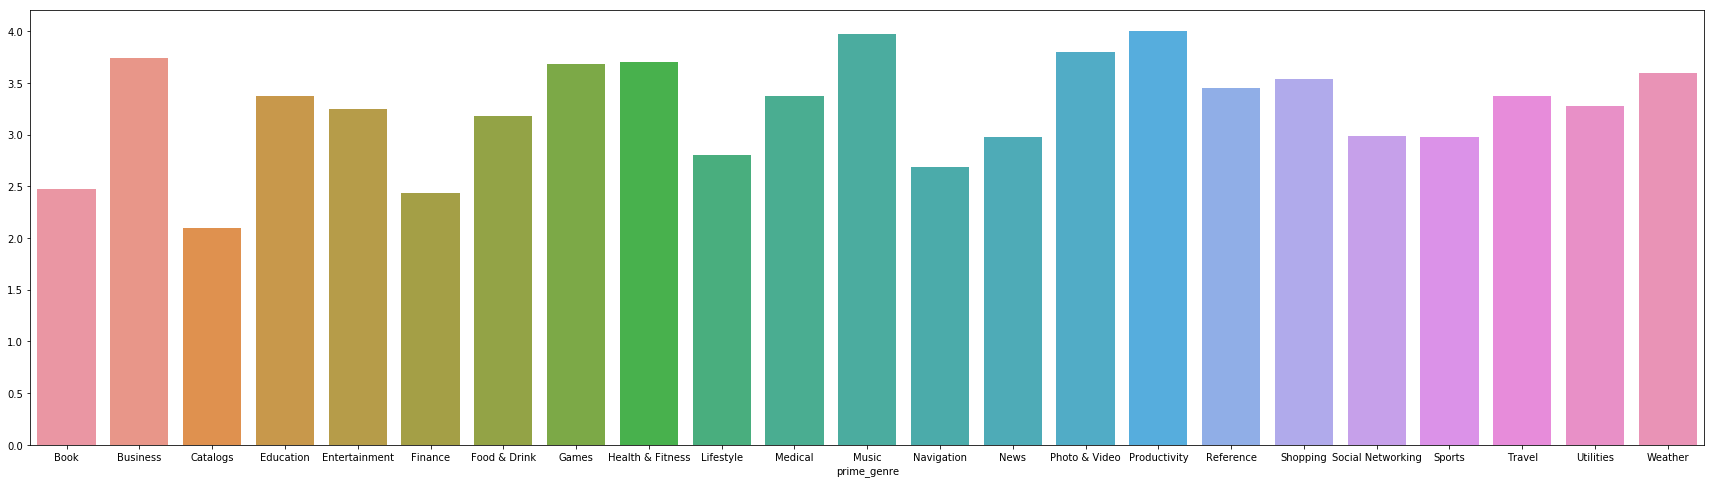

In [18]:
grouped = apps_df.groupby('prime_genre')
print(grouped['user_rating'].mean())

plt.figure(figsize = (30,8))
sb.barplot(x = grouped['user_rating'].mean().keys(), y = grouped['user_rating'].mean().values)

In [19]:
# random nlp ideas:
# ratings and comment sentiments
# predicting price based and average rating
# staging the text
# pre processing**

In [20]:
per_label(len(apps_df[apps_df['price']==0]),len(apps_df))

'56%'

In [21]:
# translate to english
from langdetect import detect
from googletrans import Translator

apps_df['desc_lang'] = ''

for item, row in apps_df.iterrows():
    apps_df.at[item,'desc_lang'] = detect(row['app_desc'])
    if detect(row['app_desc'])!='en':
        try:

            translator = Translator()
            translated = translator.translate(row['app_desc']).text
#             row['app_desc'] = translator.translate(re.sub(r'[^\w\s ]','',row['app_desc']))
            print(translated)
            apps_df.at[item,'app_desc'] = translated
            print(apps_df.loc[item])

        except:
            print('ERRORERRORERROR',row['id'],row['track_name'])
            
# for i, row in df.iterrows():
#   ifor_val = something
#   if <condition>:
#     ifor_val = something_else
#   df.at[i,'ifor'] = ifor_val

Listen for free all your favorite NRJ hits in unlimited on your iPhone and iPad. Pop, dance, r'n'b, rap, rock, listen to more than 150 NRJ web radios: all hits, all styles, non-stop and in ultra high definition! NRJ the music app # 1 for new hits. NRJ Hit music only!

Free and unlimited music, all NRJ hits, all your favorite artists, listen to the latest news, discover all new hits, with the music app N ° 1.

Listen to all your favorite artists, Rihanna, One Direction, Master Gims, Bruno March, David Guetta, Kendji Girac, Maroon 5, Stromae, M Pokora, Ariana Grande, Black M, Katy Perry, Soprano, Selena Gomez, Taylor Swift, Louane ...
Find all your favorite shows: wake up with Manu in the 6/9, and double your salary. Lie down with Cauet, Guillaume Radio 2.0 and MIKL.
All hits, all styles: pop, r'n'b, dance, rap, rock, electro, latino, reggae, ragga, zouk, love, fitness, lounge ... ..
Listen to NRJ in ultra high definition with 576 Kbps HD sound.
Share on Facebook your favorite hits.
Vote

Sina News client is produced by Sina official, the first time to get global news information, domestic and foreign news, wonderful sports report, financial and financial trends, film and television entertainment events, as well as exclusive microblogging "micro" news, wonderful to see, There are a lot of news, constellations and jokes.

* News:
Update the vast amount of information content every day, the fastest and most complete headline. The first time was informed of current events at home and abroad, sports events, financial and financial trends, film and television entertainment events, social, military, and scientific news.

* Popular:
Real-time hot news, hot topic rankings, and quickly learn about the hottest events of the day.

* Find:
Free trials, sweepstakes, star hits, handy tools, etc., let you experience the fun of discovery.

* Subscribe:
Customize your channel content and order, and customize your own news.

* Gestures:
Smooth gestures, swipe left and right to switch pag

** New iPhone application **

 20minutes.fr: Wherever you are, take with you the best of info!
-------------------------------------------------- -----------------------

iPhone

Discover the new iphone application
 
A complete redesign of the application to offer you a new experience with a streamlined interface.

 
The + of the app:
- Pin your favorite sections
- Add RSS feeds of your choice
- Save an article to read it later
- Compatibility and optimization for iOS 10
- 3D Touch function
- A full horoscope every day
- Possibility to have a big or small picture for the nostalgic
- A free grid of arrow words and sudoku
 

20 Minutes: Wherever you are, take the best of info with you!

All sections of 20 Minutes: national and international news, Sport, Economy, Tech / Web, Politics, World, Health, High-tech, Sciences, Culture, Cinema, Media, Television, People, Style ... but also the classification of articles the most read and the unavoidable unusual section of the writing "T'as vu? ".

NEW BFMTV APPLICATION, MORE FLUID, SIMPLER!

ALL THE NEWS OF LEGISLATIVE ELECTIONS
- Find all the news of the legislative elections live in video
- Find the latest polls, live minute by minute and the results of candidates in the French constituencies.
- Also follow the establishment of the new government of President-elect Emmanuel Macron.

ALL THE NEWS IN REAL TIME
Stay informed 7 days a week, 24 hours a day, highlights of French and international news with:
- The BFMTV Direct that allows you to watch live TV while viewing the latest news feed,
- The section "All the news" to quickly consult the last information of the editorial office of BFMTV,
- An "Info Alerts" service to be notified first of the news not to be missed
- The best of BFMTV.com in your application (Politics, International, Society, Economy, Tech, Sport, Health, People, TV News, Auto, Animals, Weather ...).

INFORMATION IN IMAGES
- A 100% video section with, every day, more than 150 new unpublished videos on the appli

Meet once
a story
a brand new start
Youku, the world is cool.
 
"Selecting the Sky" under the star cream against the trend of the sky, immediately on Youku see exclusive interpretation
The "people's name" strength actor blew the anti-corruption assembly number, the largest scale anti-corruption drama in history
"Da Ming Dynasty 1566" classic return, grand opening drama
"Cambrian" high-value dark black idol drama, He Junxiang net drama first bomb
"Hot Blood Changan" Tang version X file, bloody youth to explore Changan
"Flowers and Boys 3" is on the line. Youku is fully assisted by netizens to "seek flowers".
"I want to sing with you 2" Sun Yanzi comes back after the birth. On April 29, Youku looks at the singer.
"Happy Boys" is the only nationally-made star-singing singer selection reality show
"Xiao said 2017" the world is still very big, so big that you can say
"Happy Comedy 3" funny we are serious
"Gintama 4" vowed to honor you as the king in this life, use my blood to seal you
"Thre

■ Over 60 million monthly users · Cooking search service with 2.55 million recipes

◆ The perfect cooking application for this person
· I would like to make every day's menu decisive
· I would like to expand the repertory of meals
· I'd like to work hard for my own cooking from now on
· I would like to be praised for parties and event cuisine
· I want to hand-make sweets for Valentine's etc.
· I would like to try the topics gourmet at home at TV and SNS
· I want to record the dishes I made

◆ Features of Cookpad (free)
· Everyone's recipe recipes are more than 2.55 million items
- Easy search for abundant recipes anytime
· Recommended daily recipes
· Screen does not become dark during cooking
· Save favorite recipe (up to 20 items)
· Easy to write recipe (with input assistance)
- Can process crisp photos deliciously
· Read cooking trends and gourmet information in the news

◆ Premium service (subscription is optional)
· Popularity search: You can quickly find popular recipes from 2.55 

Discover the franceinfo application on your mobile and your tablet, the public service's continuous information offer. Follow all news and live news, receive alerts and access direct TV, radio and replay

ALL PRESIDENTIAL AND LEGISLATIVE ELECTIONS
• Receive all the results of the municipalities, departments or regions of your choice from the moment they are published thanks to the results alerts
• Find all the news of the presidential and legislative elections thanks to numerous editorial contents: direct, articles, videos, slideshows, files, infographics, gifs and all polls
• Do not miss the highlights of the elections every day thanks to the 5 news items selected by the editors
• Watch live and replay electoral evenings, debates and political broadcasts of Franceinfo, France 2 and France 3

INFO IN REAL TIME
• With the Live: follow the news continuously all day, react and ask your questions to our journalists who answer you live
• With Direct TV: find the Franceinfo channel in live v

The Univision Deportes App offers you the LIVE broadcast of football matches (Liga MX, MLS, CONCACAF and more) and Univision Deportes Network *. The best sports coverage in Spanish of football, boxing, NFL, NBA, MLB, Formula 1, boxing and more! Available where and when you want. - Videos of the best plays of the broadcasted games (without having to enter with your cable provider)

* Access LIVE content only in the United States and Puerto Rico using the data from your cable provider account. If you do not have a cable service provider, you can now watch all Univision and UniMás live games with a Univision NOW subscription as follows: Click on Play in any game, select "I do not have a cable provider" and then follow the instructions on the screen.

By downloading it you can enjoy:
- LIVE matches of Liga MX, MLS (Friday night matches with audio in English and Spanish), National teams of Mexico and USA. and the entire Centennial America Cup
- Do not miss the live matches of the teams from

ERRORERRORERROR 356968629 ヤフオク! 利用者数NO.1のオークション、フリマアプリ
QQ space, a social network used by more than 600 million users.
Committed to helping users “share life and stay impressed” anytime, anywhere. You can use your mobile phone to view your friends' dynamics, interact with your friends, upload photos, write talks, write logs, check in, and give gifts. There are also many "playing bars" that bring together many popular games to meet various entertainment needs.
------------------------------------------------
[social live broadcast]
Live music: music accompanied by your live broadcast, massive music library wants to sing and sing
Video interaction: Typing is too much trouble? Then use video to broadcast interaction with TA.
Dynamic expressions: cool fun expressions, make live broadcast more exciting
Beauty filter: your beauty is more than just now
Live broadcast: Live broadcast is not monotonous, let you sprout
Smart recommendation: help you discover more exciting live broadcasters

[sho

Fan of football or sports betting? You are traveling and want to be alerted to the latest football results? or simply want to enrich your second-screen experience when you follow the different matches on TV?
Download our app and follow all live matches!

The application has 5 tabs (Matches - Rankings - Search - Dimensions - Parameters) which are the main features:
- Live results by country, competition and team
- Live standings
- Team search engine and competition
- Improved setting of favorites
- Setting Notifications Notifications GOAL
- Graphic virtualization of matches
- Detail of matches: scorers, cards, etc.
- Comments Live Text Live
- Composition of the teams
- Tactical diagram of the teams
- Odds for sports betting
- Detailed match statistics
- Sports betting odds of the main matches
- Calendar of matches by team
- Calendar of matches by competition
- Optimized graphics for high resolutions
- Automatic update of the scores
- Fast and responsive even on a slow connection
- Light

A top selling English learning application of 800,000 users gathering the English phrase phrases actually used by native.
● Over 2000 phrases + updated 1 new phrase every day
● All phrases with example sentences, comments, with sound
● Automatic playback, pronunciation check with Siri, 4 kinds of quizzes
● Question to Dr. Terry for the phrase I want to know

◎ About "Real English conversation"
English learning teacher This is an English learning application created by Dr. Terry. Here, we are offering a learning method to remember the living everyday English phrases actually used by native without being caught by hard words and English grammar etc. All phrases have example sentences, and the situations are easy to understand and you can easily imagine how to use it. By tapping English texts, you can listen to native sound instantly, and the concept is "Native at times like this".

Also, if you do not have the phrase you want to know, let 's ask Phrase Request to Dr. Terry "How do you sa

The Crédit Agricole "My Bank" application meets your expectations of simplicity and modernity, while offering you a maximum of services!

MY ACCOUNTS, all your useful information at a glance:
- Weather favorite accounts, monitoring the latest transactions
- Quick balance without authentication, on home screen and Apple Watch
- Clear and detailed account statements
- Management of transfer beneficiaries * and scheduled transfers *
- Shortcuts to all banking operations: transfers, release of credit reserve, RIB edition, export operations ...
- Currency Order for Business Customers *
- Checkbook order *
- Visualization of outstanding amounts and card ceilings, authorized overdrafts, securities accounts, life insurances, property and casualty insurance contracts, loans in progress and interest on savings accounts,
- Temporary increase of card caps * and authorization of remote payments *
- Links to the application "My CA Card" and "Paylib"
- Graphs showing the evolution of account balances

Series cumulative DL 15 thousand books exceeded!
Thank you very much.

July 15, 2010 Education division earn first place sales!
~ For everyone who takes a home builder ~

From the exam for the past 16 years
· Past problem (4 choice questions) "489 questions"
· True or False (One question) "1573 questions"
Is recorded.

【Configuration of this application】
· Past problem (4 choice questions)
· True or False (One answer)
· Reference materials
· Memorizing note (worm-eaten)
· Gradebook
· Setting screen


【Past issues】 (4 choice questions)

· The choice of four limbs is randomly switched every time.
- Explanation is attached to each of the four limbs of choice.
· You can refer to "reference materials" during problem solving.
· We prepared "supplementary drawing", "bold" and "color character" for the problem. (ON, OFF possible)
· By using "supplementary drawing", you can understand more deeply. (ON, OFF possible)
· If there are dedicated diagrams for the options, the diagram will change only

[Le Shi "name" film, LE sees people's heart]
The five-star drama "White Deer" is the exclusive broadcast of LeTV video, and the epic legend of the Kanto Plain is strong!
"Happy Ode 2" is returning to the United States, locking in LeTV videos and embracing new life together.
"Selecting the Heaven" is the first broadcast of music, and Lu Han and Gu Li Naza jointly wrote the inspirational legend of "returning the sky to change the life".
"Similan" looks at Qu Yuan and sighs for a thousand years, and Marco, Yi Qian and the monarchs share the reward.
Run the male fifth season changed its name to "Run", LeTV video premiered every Friday night.
Homemade variety show "Good to eat" to bring you a happy evening!
May broadcast non-stop, the connection is more exciting:
The real case of "National Action" was adapted to the anti-corruption drama, and Huang Zhizhong and Zhang translated the powerful actors to perform deductive interpretations and lock the LeTV video;
"Hunting Field" business version

When your account has a security risk; when you forget your QQ password; when you consume Q coins...
What you need is a helper who can protect your QQ account in 24 hours, so you can save your heart and effort to deal with the current insecure network environment.
Therefore, the QQ Security Center is here.


Detailed function introduction:
[Supreme Protection]
-100% retrieve account, no need to appeal
- Forbid others to change secrets, safe and worry-free


[Account Security Check]
Check your account security in a comprehensive manner and provide you with a tailor-made solution.


[Security Notice]
Timely notification of consumption and abnormal information, account security is in control!


[Q coin Q point protection, game protection]
A variety of protection one-button settings, portable switch.


【Authentication】
The verification request is actively pushed, and the anti-fishing cannot be less!


[Account Lock & Game Lock]
Is the account number abnormal? The game is stolen? Not afraid

QQ synchronization assistant, change the mobile phone must-have artifact, one-click backup mobile phone address book, software, photos to the cloud super practical tools!
------Mobile phone changes, data is no longer lost ------

**Intelligent Management Address Book**
Backup management: One-click backup of the mobile phone address book to the network, sync back to the phone at any time
Quick finishing: delete contacts in batches, and change the machine more conveniently. Smartly merge duplicate contacts, save effort and effort
Intelligent detection: automatic detection of expired numbers and frequently used numbers, making phone calls more convenient
Retrieve at any time: Retrieve any lost contacts in the Moonlight Box through the Recycle Bin or Time Machine

**Photo & Software Backup**
Smart backup: automatically organize photos according to time and place to form photo albums, one-click backup, record the wonderful moments of life
Software recovery: Intimately back up the 50 commonl

The mobile banking service platform built by CCB for mobile banking customers has the common functions of transfer, remittance, payment, investment and wealth management, account management, credit card, fast loan, mobile phone recharge, and network map. Convenient living services such as ticket online, ticket reservation, deposit and loan calculator. Cool, smooth interface design, novel and practical features let you fully enjoy the fun of mobile life, is a good helper to stay with you at all times.
In terms of security, it adopts mechanisms such as data encryption, password overrun protection, login timeout control, etc., and escorts your funds transactions through various security measures such as user information binding and SMS verification.
Unnamed: 0                                                        605
id                                                          391965015
track_name                                                     中国建设银行
size_bytes                       

[Massive video, look ahead]
"Ode to Joy 2": Five Beauty, Liu Tao, Jiang Xin, Wang Ziwen, Yang Zi, Qiao Xin Deductive Life
"Selecting the Heaven": Luhan and Gu Li Naza rehearsed
"Undercover": Zhang Jia translation, Lin Shen takes you into the real life of undercover adventure
"Run": Angelababy returns, and Dilierba is a pair of women MC
"Qi Yu said 4": The old driver is on the road, He Wei, Ma Dong, Cai Kangyong, Luo Zhenyu, Zhang Quanling take you to a new perspective
"Sister is so hungry": the choice of the male god, cooking PK, life is like a play, laughing to NG
"Wolverine 3": Goodbye to Wolves, goodbye, hard to see Wolverine in the world
"Wastewood Brothers 5": Qingdao Aunt, Sun Yizhou's self-deprecating sitcom
"Flower House Pot Chef 2": Only love and food can not live up to
"Little Lovers": Hu Jun, Hu Jing Group CP, happy family to deal with the rebellious daughter of the 90s
"Born is good for me": teaches head Luo Zhixiang to guide the young girl to grow into a shining beauty
"Ea

■ Join for free! Dating app [iMail]
Public Safety Commission Notified! It is an official [dating]!
■ Looking for a lover
Seriously meet your favorite opposite sex seeking a boyfriend or girlfriend!
■ marriage activities
As a marriage to find a partner like a matchmaking!
■ Looking for friends
It is OK to find friends and friends who can easily feel free to play!
■ Gokon
It's fun looking for partner pairs!
Adult romance
Otona's association, also association of naisho!

[IMail] is a service of posting bulletin boards and enjoying mails with opposite sex.
Because it also supports mail profiles as well as professional photographs, deeper communication is possible.
Also, not only prefectures but also detailed districts can be set so you can search for partners efficiently.

Once you use this application, once you enter your ID and password, you will be able to access the "Auto login function" which can automatically log in to Eye after the second time, and functions such as frequently used 

The new Tagesschau app presents the most important news of the day in a modern, user-friendly way: On the start page, videos run in full screen, which are upright and playable in landscape orientation. In the "All news" section, the app offers you more news than ever before - personalized on request. The search and the broadcast area have also been completely reworked.

If you have little time: Use the overview of the news on the homepage of the app - or watch the news in 100 seconds. See also Tagesschau, Tagesthemen, Nachtmagazin and tagesschau24 - live or on demand on your iPhone or iPad.

In the app you will find the most important news of the ARD (BR, hr, mdr, NDR, radio broadcasting, rbb, SR, SWR, WDR) and the sports show in the most modern design and technically up-to-date.

The app and its contents are available free of charge. For the livestream and videos from mobile networks, we recommend a flatrate, otherwise higher connection costs may apply.
Unnamed: 0                     

[Wonderful content, now]
"Ode to Joy 2": On the 22nd floor, the five beautiful feelings are resounding.
"Selecting the Heaven": Seeing Luhan’s first show on the screen
"The Ancient Love Song": Huang Xiaoming, Song Yu, a total score of ancient sadomasochism
"Deep Night Cafeteria": Huang Lei is warming his stomach for 30 big coffee dishes
"The Star of the Counterattack": Song Yu pushes Push to open the star road
"My girlfriend's boyfriend": Bai Yu fell in love with the robot and lived with the enemy
"Run": Baby returns, Chen He’s exclusive interaction every Monday
"Day Bar": Li Chen, Lu Han, Ying Caier, Qiao Xin, Yang Tingdong, the House of Things
"Men's Men's Age": Feng Delun, Li Zhiting, Li Huan, Zhang Yihao, whose brain is the sexiest
"Let me open my nose 2": Yi Qian Qian Qian, Lin Xin, Yu Xiaoying accompanied the baby to grow together
"Please come to the refrigerator 3": He Wei, Wang Jiaer take you to see the secrets of Chen He, Yao Chen, Wang Xiaodan in the refrigerator
"Large Lies"

[Massive video, look ahead]
"Ode to Joy 2": Five Beauty, Liu Tao, Jiang Xin, Wang Ziwen, Yang Zi, Qiao Xin Deductive Life
"Selecting the Heaven": Luhan and Gu Li Naza rehearsed
"Undercover": Zhang Jia translation, Lin Shen takes you into the real life of undercover adventure
"Run": Angelababy returns, and Dilierba is a pair of women MC
"Qi Yu said 4": The old driver is on the road, He Wei, Ma Dong, Cai Kangyong, Luo Zhenyu, Zhang Quanling take you to a new perspective
"Sister is so hungry": the choice of the male god, cooking PK, life is like a play, laughing to NG
"Wolverine 3": Goodbye to Wolves, goodbye, hard to see Wolverine in the world
"Wastewood Brothers 5": Qingdao Aunt, Sun Yizhou's self-deprecating sitcom
"Flower House Pot Chef 2": Only love and food can not live up to
"Little Lovers": Hu Jun, Hu Jing Group CP, happy family to deal with the rebellious daughter of the 90s
"Born is good for me": teaches head Luo Zhixiang to guide the young girl to grow into a shining beauty
"Ea

[Le Shi "name" film, LE sees people's heart]
The exclusive release of "White Deer" LeTV video, the epic legend of the Kanto Plains is strong!
"Happy Ode 2" is returning to the United States, locking in LeTV videos and embracing new life together.
"Selecting the Heaven" is the first broadcast of music, and Lu Han and Gu Li Naza jointly wrote the inspirational legend of "returning the sky to change the life".
"Similan" looks at Qu Yuan and sighs for a thousand years, and Marco, Yi Qian and the monarchs share the reward.
Run the male fifth season changed its name to "Run", LeTV video premiered every Friday night.
Homemade variety show "Good to eat" to bring you a happy evening!
May broadcast non-stop, the connection is more exciting:
The real case of "National Action" was adapted to the anti-corruption drama, and Huang Zhizhong and Zhang translated the powerful actors to perform deductive interpretations and lock the LeTV video;
"Hunting Field" business version "powered by the list" stron

ERRORERRORERROR 413487517 ナビタイム ドライブサポーター - NAVITIMEのカーナビアプリ
With easy member registration, you can earn profitable coupons. In addition, you can search McDonald's close to the store search and easily see detailed product information of all menus.

【Introduction of application function】
«1. Let's get the latest coupon! »
Easy to find coupons, easy to use and changed the design. Tap "Use" button to display coupon number. You can use it when presenting to the cashier staff. In addition, you can register your favorite with the icon of the heart mark, you can display it immediately when you want to use it.
※ To use coupons, membership registration (free) is required.

«2. Member registration (free) is easy! »
In addition to e-mail address, membership registration with Facebook account is now possible.

«3. Store search is even easier to use! »
Filtering search can be done by free Wi-Fi, 24-hour sales, drive-through etc, and you can find nearby McDonald's store right away.

«4. Let's check 

Look at the global hotspots, you want to see them all here! 2017 exciting hot drama can not stop: "Happy 颂 2" "Choice of Heaven" "Di Renjie 4 love flower Jinren case" "The name of the people" "The summer solstice is not yet" "Blind Covenant" more good drama only in Sohu!

"Painting the Heart": collecting obsessives, struggling, and painting masters to bring you to see the mysterious cloud
Hypnotized Hypnotist: The Republic of China suspends the case, the hypnotist asks the monarch to enter the dream, and investigates the truth behind the frame.
"The Forest is Big": Guo Degang and his son staged a sitcom;
"Seeking the Pavilion": The magical god of the Republic of China is praised as "The Unintentional Master";
"Who sent the book to come": youth explosion drama, crossover and new gameplay;
"Looking at the ocean to see you": Zhu Yawen Wang Likun interprets the beautiful love of the workplace;
"Detective Di Renjie's Love Flower Golden Man Case": a brain-burning drama with suspense and horr

*120 million installed capacity, 70% mobile market share, looking for a room to sell
*10 million sets of rental properties, the most professional real estate search engine
* More than 1 million landlords have successfully sold houses in Anju, and more than 400,000 brokers assisted in services.
* Industry-leading second-hand housing new home recommendation system, guess your favorite house with big data
* The most powerful community database in the industry, customize the price of your concern
* Map search room, search for nearby real estate, subway room, rail delivery room, discount real estate
* Millions of landlords sell their homes here, helping landlords quickly find their favorite buyers
*Lightning to sell: the fastest one day to sell
* Massive housing: second-hand housing, new housing, renting, commercial real estate
*The landlord entrusted: entrusted to sell the house, exclusive landlord listing price display, landlord housing management
*Customized house prices: residential pri

【Product introduction】
Vipshop, global selection, authentic sale!
Thousands of professional buyers select branded goods, offering a discount of 1% off. With Vipshop, you no longer have to worry about buying big names!

[Support Apple Pay]
Simple, safe, fast, perfect experience, a little fingerprint, easy to pay!

[Depth discount, limited time sale, full range]
Everyday at 10am & 8pm
Big discounts for the whole game, 1% off, the most affordable
Apparel, beauty, parent-child, home and other categories to meet your one-stop shopping needs

[The shopping experience is guaranteed]
Support cash on delivery, first look at the real thing and then give money
Unconditional return for seven days, return shipping

[Globally renowned sales e-commerce, US listed companies, 100% authentic guarantee]
Brand direct authorization, eliminate fakes from the roots

[70% of users become repeat customers]
Helping 200 million members save hundreds of millions of yuan every day and enjoy "exord and expensive"
M

ICBC's mobile banking brand brand new upgrade "melt e-line", gorgeous transformation, dressed up debut. The new version of Mobile Banking has undergone a number of functional upgrades. Whether you have an ICBC card or not, you can enjoy the stable, caring and meticulous financial services provided by ICBC. "Super convenient transfer, no card customer registration, personalized customization, smart calendar reminder, shopping one-click payment" and other powerful features, and a variety of benefits, let you enjoy the "Chi-Hui" new life!
Gently, the life of Zhihui is opened.
Four function pages, showing different ICBC:
1. Homepage: Personalized avatar setting, custom homepage function, instant recommendation ICBC preferential activities; also can check account details, make money transfer, carry out investment and wealth management, enjoy credit card, e payment and many other services.
2, Zhi service: "Financial calendar" allows you to plan for financial planning, "Guess you like" to rec

QQ browser HD version of the Internet speed, leisure must!

[Precision search] speed search, smart match - think what you think
[Hot news] headlines, entertainment, society, technology, beauty - everything in the world knows
[WeChat hot text] Duan Zi, gossip, health, cute pet, car - you want to see this have
[full network video] movies, TV series, variety, animation - from now on, no longer
[Popular novels] fantasy, crossing, suspense, literature, classics - feeling the charm of words


QQ browser exclusive feature comics:
The day of the country is full, and the serialization is complete.
HD quality without watermark, fast loading and less waiting.
Popular comics are the first to watch, wait for updates and don't worry.
Genuine comics are free of charge, saving time and effort and worry.

The latest hit "The Name of the People", "Only because of meeting you"
The latest movie "The Apostles", "Who's Youth Is Not Lost"
The latest anime "Foxboy Little Matchmaker", "Break the Sky"
The lates

YY LIVE content summary:
*YY LIVE-YY live broadcast, the domestic leading full entertainment live broadcast platform
* Over 1 billion registered users, thousands of people live with the live room, together
*National live broadcast, professional beauty, open live broadcast, you are the star
*One million anchors, seven of China's top ten anchors are exclusively broadcast on YY
*There are more live stars in the first live show of Zhao Liying, Liu Tao, Papi Sauce, Wu Zhongxian, Wang Zulan, and Blazing Prince.

Introduction to YY LIVE:
Domestic leading full entertainment live broadcast platform:
NASDAQ: YY listed, registered users over 1 billion, 1 million anchors, the most comprehensive and entertaining 7*24 hours all-day live broadcast platform

The most live entertainment content of the whole network:
[Good voice] 24/7 uninterrupted live music performance platform. Power singer, face value anchor, personality music, top music festival, throbbing hormones, open your new music game
[Talk S

[What can you say to beauty?]
Buying a hand-selected real shot, hundreds of new products every day, there is always a suitable for you.
Look at the mix, buy a set, the style of dressing every day is not heavy.
Beautiful preference - popular items, stable quality, reasonable price.
Good things, editorial selection, wear the popular buy and rest assured.

[What do users say about beauty?]
User: TippiLiu said, "I finally found a shopping application that I like to have peace of mind. My wardrobe can't hold it anymore. The clothes are really good, I learned a lot of matching skills."
User: Wei Wei said: "I have to go shopping every day. The recent revision is quite good. It is easier to go shopping, and the interface is pretty good."
User: The field said: "The United States and the United States, like to match the recommendations, are all collected, do not know when to wear what to look out, but the boyfriend's wallet is getting more and more embarrassed, to be picked up."
There are still 

◇ Cumulative total of 5 million downloads exceeded! Round One Official Application ◇

【Part 1: cheap coupon function】
Every week, you can offer great deals such as birthday coupons
We will deliver. Distribution will be notified by PUSH notice and NEW mark.

[Part 2: Lane reservation function]
With the lane reservation function in the app, bowling without waiting for the weekend!
We do not need useless waiting time anymore.

【Part 3: Store Search】
Not to mention the round one near you, the facilities you can play, the phone number,
You can also check the shuttle bus timetable from here.

◇ New function ◇
【Part 4: Club application members function】
The club membership card function has been added to the application. Sumaho is a member
Become a card and clear your wallet! Keeping the QR code smoothly
We can accept reception.

◇ New function ◇
【Part 5: Bowling score management】
Bowling scores can be stored in the Round One application.
If you have an app you no longer need a score sheet! M

The new ZDFmediathek makes television even better. The completely redesigned app now offers even more convenient access to our more than 30,000 on-demand videos and the ongoing live program of ZDF and its partner stations.

Remember and subscribe to programs, let yourself be reminded of new episodes and contributions. If you are logged in, you will also find memorized posts on other devices. Personal recommendations and better search results make browsing even more interesting. Some shipments can also be saved on your smartphone or tablet (depending on usage rights). Additional information about the current program will continue to provide you with a better overview of selected programs (second screen).
Unnamed: 0                                                        927
id                                                          437025413
track_name                                               ZDFmediathek
size_bytes                                                   67734528
currenc

Tencent Security - 2016 Apple Global Developers Conference Showcase App
iOS10 users exclusive harassment interception feature, accurate identification of harassing calls, away from fraud traps
Free management tools being used by 800 million small partners
Powerful photo cleaning function, a good partner for 16G users

======Super power enhancement function six in one ======
- Harassment Interception: Automatically identify harassment scam calls, answering calls is more assured
- Traffic monitoring: accurate real-time traffic monitoring to avoid excess traffic
- Photo cleaning: useless photo deletion, album photo, video batch slimming
- Network detection: professional speed measurement accurately understands network speed, detects Wi-Fi security and eliminates network
- Butler Ask: Give you fresh and professional mobile security information
- Account protection: QQ, micro-signal, mobile phone number login, real-time monitoring of consumer information, reducing the risk of hacking

=====

驴 Mother's travel 9th ​​anniversary, starting like a child, adults enjoy the price of children, children enjoy the king meal, 9999 yuan red envelopes to send!
Tickets for scenic spots will be reduced by 50 yuan, and new users will be reduced by 10 yuan.
Around the tour, the wine is over 200 minus 100, and each group is reduced by 50 minus 50;
Domestic tour, every 2000 minus 200; outbound tour, the highest reduction of 3000;
Every Friday, the price will be limited, and the large amount of coupons will be limited.
Monthly membership day, open star privilege, award-winning tour waiting for you.

* Download Gifts: Download and log in to the mother's new version of the client, that is, send 880 yuan coupons;
* 1 yuan ticket: 驴 mother travel APP, please ask the national people for 1 yuan tour attractions;
* Swim around: Dragon Boat Festival, the designated line is reduced by 100 yuan / single;
* Value-for-money travel domestic: Explosive line, every 2000 minus 200;
* Thousand Yuan Exit: The 

PPS will be removed from the App Store in the near future. Please continue to download the iQiyi client.

[Massive video, look ahead]
"Ode to Joy 2": Five Beauty, Liu Tao, Jiang Xin, Wang Ziwen, Yang Zi, Qiao Xin Deductive Life
"Selecting the Heaven": Luhan and Gu Li Naza rehearsed
"Undercover": Zhang Jia translation, Lin Shen takes you into the real life of undercover adventure
"Run": Angelababy returns, and Dilierba is a pair of women MC
"Qi Yu said 4": The old driver is on the road, He Wei, Ma Dong, Cai Kangyong, Luo Zhenyu, Zhang Quanling take you to a new perspective
"Sister is so hungry": the choice of the male god, cooking PK, life is like a play, laughing to NG
"Wolverine 3": Goodbye to Wolves, goodbye, hard to see Wolverine in the world
"Wastewood Brothers 5": Qingdao Aunt, Sun Yizhou's self-deprecating sitcom
"Flower House Pot Chef 2": Only love and food can not live up to
"Little Lovers": Hu Jun, Hu Jing Group CP, happy family to deal with the rebellious daughter of the 90s


Ten years of classic chess brand, Tencent Games is carefully crafted, together with 700 million players, "Happy Landlord"!





[game features]:
[Pure classic gameplay]
Classic gameplay + scorpion play, national card skills PK! There are also tasks, grab landlords, clear cards, double play and other gameplay, the game fun is wonderful!
[rich competitive gameplay]
Fresh and fun three hearts to play, the role of a variety of changes, skills upgrade! Different card playing strategies, see how you choose!
[Stimulus gameplay]
A variety of game modes, diamond competitions, and challenging competitions are exciting and exciting. We sincerely invite all the landlords to witness the confirmation and harvest the honor!
[High quality gaming experience]
Scenery game interface, feel the real landlord; rich fun aircraft, bomb animation, add more joy to the landlord!
[New social experience]
Invite friends to open a private room to fight landlords, emotional connection! Give your friends a heart to se

[We have these, but not only these]

***Fashion match
Be your exclusive fashion stylist and create a fashion circle of friends. Red man bloggers take photos and videos to share with you at any time. You can also take a good shot and record your good mood, and let your public dress up and let the public comment on your fashionstyle!

*** Perfect shopping
From the 10,000 pieces of clothes to find a heart, it is better to let the fashion Xiaobian help you recommend, fashion magazines boutique, star reds are in the show! There are 10,000 kinds of fashion personality, starting from buying a trend item, and there are all kinds of discount items worth buying, so you can enjoy the happy shopping experience brought by the perfect group purchase! Here, you are more likely to buy good things from around the world.

*** Mushroom good
In-depth inspection for you in advance, the net red people for your pro test evaluation, the brand direct supply, fashion items price and quality have both, only qual

Together with 80 million sports enthusiasts, you can meet yourself in the "咕咚" fitness.

To provide you with:
Accurate sports records, running, cycling, stepping, fitness and many other sports coverage
Multi-activity participation forms such as event registration, various live broadcasts, etc.
Higher quality sports equipment recommended
Professional fitness content information

More features
"Sports Circle" sports and fitness friends community, share the results of running, cycling, walking and other sports, discuss fitness experience, learn how to eat healthy, more professional fitness knowledge and training courses, whether it is video or live broadcast, Let you go out and interact face-to-face with all the big stars, network reds, and fitness instructors;

"Events" provide well-known marathon, triathlon, cycling, popular sports activities and other major events registration channels; provide more comprehensive information about the events around the event, tournaments and other even

iPad's most exciting social apps
Apple App Store Reward's first free application gold list



Main features of the product:
- Free video call to make communication effective and temperature
- Group file sharing, share it with love, happiness spread here
- Original expressions, colorful bubbles, high-definition pictures, flash photos, sending locations, sending files, communication is rich and exciting here
- Video chat, voice calls, voice messages, pull in distance to each other, make communication closer
- Whiteboard graffiti makes it easy to create happiness
- File Assistant for easier file transfer and multi-terminal file synchronization
- See your friends' latest news and learn more about your friends
- Express yourself through a personalized signature, and discover the people who do the same thing



common problem:
1. Where can I log out and switch accounts?
- You can log out and switch your QQ account by clicking [Attachment of the "My" in the navigation bar -> Exit current acco

Look at the global hotspots, you want to see them all here! 2017 exciting hot drama can not stop: "Happy 颂 2" "Choice of Heaven" "Di Renjie 4 love flower Jinren case" "The name of the people" "The summer solstice is not yet" "Blind Covenant" more good drama only in Sohu!

"Painting the Heart": collecting obsessives, struggling, and painting masters to bring you to see the mysterious cloud
Hypnotized Hypnotist: The Republic of China suspends the case, the hypnotist asks the monarch to enter the dream, and investigates the truth behind the frame.
"The Forest is Big": Guo Degang and his son staged a sitcom;
"Seeking the Pavilion": The magical god of the Republic of China is praised as "The Unintentional Master";
"Who sent the book to come": youth explosion drama, crossover and new gameplay;
"Looking at the ocean to see you": Zhu Yawen Wang Likun interprets the beautiful love of the workplace;
"Detective Di Renjie's Love Flower Golden Man Case": a brain-burning drama with suspense and horr

2 Channel, Town BBS, Shihara, Browser for browsing other 2 channel interchangeable bulletin boards.

● For comfortable browsing
· Write for each ID, write with anchor etc. extracted with one touch
· ASCII art is automatically determined, fitted to the screen and displayed
· Hide writes that you do not want to see by setting NG name, NG word, NGID, NG thread (chain undo function)
· Multiple classification functions such as classification by keyword registered beforehand, classification by board
· Display support with tap scroll and auto scroll
· Display image thumbnail
· Display image list in thread
· A black-based display format for night use is prepared
· Using bookmarks, marking can make your favorite thread stand out
· Corresponds to URL scheme (twinkle 2 ch: / /)
· Similar Thread, Next Thread Search


● Write
· Memory of name, mail column
· Save name and e-mail suggestions
· Thread creation
· In addition to 2channels, town BBS, if you do, support other compatible bulletin boards
· 

Flight delays, first known.

Flying often can accurately predict the flight departure time, so that the flight attendants and the flight attendants can grasp the latest developments of the flight, so that the pick-up person can reasonably arrange the time to pick up the airport.
Fei Changzhun also provides the most professional delay analysis, allowing you to intuitively understand the reasons for flight delays. You no longer have to listen to the delays in the airport broadcast over and over again, no longer have to chase the airport staff to inquire about the reasons for the flight delay.

【receive honor】
Hunan Satellite TV's "Daily Up" column strongly recommended travel essentials; Zeng Rongdeng ranked first in the AppStore.

【Product Features】
1. Estimated departure time: Accurately estimate the flight departure time, so that you can know the latest flight updates in advance, make travel planning, and make the journey more comfortable.
2. Delay analysis: Provide the most profession

------------------------------
Notice
------------------------------

SPI English (ENG) add-on was added!

------------------------------
Top chart
------------------------------

Paid app ranking ranked 7th (education)!
Extra long sale for popular thanks 600 yen → 360 yen!

------------------------------
Recommended points
------------------------------

· Features ① Optimum learning mode installed!

The optimal learning mode is a learning mode that thoroughly pursues the learning effect where priority is given to unlearned problems and difficult subjects.
It is always useful for job-hunting without time!

· Feature ② Sufficient problem volume!

All 232 questions (including examples) are included!
Approximately twice as much as the commercial problem book (SPI language field)

· Features ③ Full explanation with a more detailed explanation than the book!

A thorough explanation of "unique to Study Pro"! Do not leave questions to users!

· Features ④ High-function handwriting memo tool 

It is an application that you can easily check the usage fee of au, the amount of data communication, points and so on.
Various procedures and inquiries can be made smoothly.

Current use situation
· Data traffic of this month
· Fees for this month (call charges)
· Holding points
· Au WALLET prepaid card balance
· Au WALLET credit card charged amount
· Data storage status
· Usage status of au electric wave
You can confirm.

Billed amount
· Amount charged for the past six months
· Points earned & cash back amount
You can confirm.

Contents of Contract
You can check not only smartphone · mobile phone information but also content of au Smart Pass etc. contents, Internet, Ekusen · Hoken etc.

■ Change procedure
· Rate plan · Discount service change
· Address change (moving)
· Change of payment method
You can always do procedures from the application at any time.

■ When in trouble
· It is possible to make inquiries to operators smoothly.
· Q & A is also substantial, and saves the trouble o

ERRORERRORERROR 481033328 英単語ターゲット1900（5訂版）
Second shot is a super short video tool that combines shooting and editing clips in one, and is a fun short video community!
.WiFi to help you cache 20 popular short video videos, open second shots, no traffic to watch videos, mobile party welfare!

=====Feature highlights =====

[Free traffic video] No WIFI to watch video into poor? No, I want to see it whenever I want.
[Variable sound function] Net red essential artifact, Aikeli, papi sauce are in use
[Make-up shot] After the trial, Zhang Zhaozhong’s trial was full of praise. If you want to be beautiful, one step is enough.
[HD upload] HD short video, big screen is also clear
[Reward gameplay] Shooting videos can also make money! No need to find a mother to spend any more money.
[Video effects] Teach you to play special effects, you can make video blockbusters yourself

=====Top Short Video Origin =====

[Popular Channel] Here is the hottest video selection of the whole network, exclusive h

4 million gods sit in QQ reading, writing a new world for you; 10 million volumes of original books, all in QQ reading.
[exclusive good book]
"Tianguan": The mysterious novel mentioned many times in the "People's Name", winning the heavens and the half, smoldering the mountains and rivers, is the most favorite book read by Tong Tongwei, but he read only half of it;
"Fanghua": Feng Xiaogang's director, Yan Geling's screenwriter, and Huang Xuan's original film of the same name, tells the story of a group of youthful and full-fledged cultural and art troupe members who are experiencing the growing love dying and the life of fate.
[Massive original]
"The Name of the People": The large-scale anti-corruption theme of the hot screen!
"Surgical Fengyun": Ji Dong starred in the original TV novel of the same name.
"Happy Ode (Second Season)": Happy, five beautiful, continued to write a happy story.
"Full-time master": The whole network broadcasts the original novel of broken billion animation.
"

<< Record & Column Application for me >>

◎ You can use various functions free of charge!
◎ Enhanced advise tailored to the record!
◎ You can also read the recommendation column suitable for the purpose of use!
◎ The contents that can be recorded are all six types!
[Physiological Prediction / Basic Body Temperature] [Weight / Body Fat] [Sleep] [Meal] [Condition of Your Skin] [Free Memo]

App making beautiful [mememo me memo]
It's okay with this one as well as your own record and recommended trendy beauty information.
I will support your "want to be beautiful"!

For further information, please contact us.
info@me-memo.jp
※ We will reply in order from the administration secretariat.


● °. . · ° ° ·. . · ° ○ °

Six types of mememo memo

[Menstruation / basal body temperature memo]
Make a note of the menstruation start date and predict the next menstruation start date!
· Prediction function of menstruation start date
· Predicting the timing of "easy to lose weight"
Ovulation date predicti

【Product introduction】
Gourmet and delicious recipe tools, you can share the wonderful fun of making food; three recipes, afternoon tea, nightingale, baking, dessert, soup... everything is available, you can become a big chef in minutes! There is also a private recipe for gourmets to take you on a different food feast.
Shortlisted for the "2016 World Food Contest" lifestyle food app;
Small S "Sister is very hungry" program partner;
Yang Lan, Ye Yizhen and many other stars settled in the food giant;
Apple's official App Store China, the recipe software ranking is greater than the second;

[Three meals recommended]: The food editor carefully selects and carefully prepares each meal for you;
[Follow friends]: Pay attention to the food lovers you like, the more friends improve, the faster;
[Upload recipes]: Upload your gourmet recipes and everyone will be a gourmet!
[Speaking activities]: Participate in the event, the grand prize will wait for you! Everyday!
[Mall]: Don't worry about not f

Cumulatively total 10 million downloads exceeded!
Easy · convenient · bargain. Always wear seasonal fashion news in my pocket. It is the official "GU" application provided by GU.

【Content of offer】
· Purchase, styling posting with GU-SHARE, product recycling, points playing when playing in games
· You can exchange accumulated points with coupons
· "Flyer" knows the latest information of GU
· "GU-SHARE" shows everyone's real dress
· "G.PAPER" knows fashion trends
· Shop staff at "Shop blog" You can see items and dress recommended items
· You can save styling and items you care about "Like List"
· You can see the styling and the review by "product bar code scan"
· "New News" and "Trend News" for you arrive in "Push Notification"

【please note】 
This application needs an accurate current position in order to deliver useful information etc. of peripheral stores in conjunction with customer's location information.
For this reason, GPS may be activated as appropriate in the background by de

Hungry, professional mobile phone take-out ordering platform!

[More than just take delivery] Hungry, food, fruit, fresh, dessert, flowers, cakes, supermarket department stores, order!
[Newcomer Benefits] Takeaway order, new users receive a maximum of 50 yuan gift packs, more red envelopes waiting for you to take!

【Product introduction】
On time and on time, overtime payout, for you to select qualified, reliable and quality quality business, to provide safe, convenient, fast, intimate high-quality take-out service.
Hungry, the country has covered 1400+ cities, covering nearly 1000000+ take-away restaurants, 50,000+ high-end brand restaurants, such as Pizza Hut, McDonald's, KFC, Burger King, and Haidilao.

[All areas, all categories]
All kinds of takeaways around the world, Chinese food, Western food, fast food, light meal, hot pot, barbecue, baking, burger, breakfast, afternoon tea, nightingale, dessert, dessert, fruit, flowers, fruits and vegetables, fresh, cake, sushi, coffee, superm

★★Thanks to the Flying Flow Game Center, the strong support and recommendation of the Play Machine Collection! The Flying Game Center helps you find more fun games! ★★

App Store's most anticipated 3D action/role-playing game, the Chinese's own world-class work - "War of God of War"!
The ARPG carefully crafted by the Unreal 3D engine is a hard-fought battle that brings a sense of violent aesthetics and enjoys the thrill of punching and fleshing!
Through the "Shan Hai Jing", play "The Wrath of God of War" and interpret the pure ancient mythology of the East.

※178 Apple Community: This is a work that can change your view of domestic games!
※ Video bus: From the punch to the flesh, we will wait and see!
※任玩堂: So far, the real meaning of the domestic iOS game is "masterpiece"!

The women-in-law made Fuxi and Shennong help each other and jointly protect human beings. The Emperor of Heaven is the head of the gods but is controlled by the lusts, intending to destroy human beings and enjoy th

【Product introduction】
The "Happy Go" client is the official official portal of China Telecom's mobile Internet, integrating the telecom business hall and Tianyi customer service client. "Happy Go" client is a mobile phone client that integrates service and sales. Based on mobile terminal, it provides users with various forms, convenient and well-perceived products, content and services to create a simple and happy life experience for you.

【Special feature】
1. Enjoy the service: Query the data accurately, control the use of mobile phone fees in real time, handle the business quickly, easily enjoy one-click processing and fast recharge;
2, grab the cheap: one hand to grasp the latest promotions, nicknames, traffic, mobile phones to buy first;
3, music life: broadband one-button reporting, nearby network positioning, online customer service, humanized service is around.
Let's go a little easier, let's go find happiness together and let the world be at your fingertips!

【new function】
Th

Overseas direct-quality high-quality goods, 100 major brands officially authorized to enter, the introduction of China Cosmetics Genuine Alliance, each item can be inquired about the security code for verification. New every day at 10 o'clock, limited time sale!
[Fast speed duty-free shop] lightning delivery, the fastest 3 days to arrive. Overseas prices, enjoy the genuine explosion directly!
[Make the grass necessary] beauty, skin care, clothing, mother and baby have everything, buy all the good things all over the world.
[Goddess to develop APP] overseas purchasing, Taobao world famous products, luxury goods one-click orders, only quality assurance!
[Overseas Sweeping Artifact] Speed-free duty-free shop, global purchase, overseas purchase, fashion beauty 10 points new, limited time sale, single product!
[Mom buy] imported maternal and child sea Tao milk powder diapers, speed-free tax-free, every day sale!
[Intimate dressing assistant] You can choose the fashion star wardrobe, beautif

It is the official application provided by Kentucky · Fried · Chicken Japan Ltd. It is an application that you can enjoy cheap coupons and entertainment content unique to KFC.
If you allow push notifications for this application, you can receive more profitable information.

About service provided
· campaign information 
· Coupon (normal & special)
· Check-in campaign
· Kernel camera
· Menu
· Store search
· Notice
· Settings (push settings, FAQ etc.)

■ About usage environment
You can use it on iOS 8.0 or later.
※ Those before iOS 7.1.2 can not be used. Please update iOS if you use it, please use.
* Depending on your terminal, OS, GPS, and communication environment, some functions may not work properly.
* Some functions may not operate properly outside the usage environment.
   Please note.

■ About position information acquisition
It is used to search the store, check your current location when checking in.
In addition, we can use it with confidence as it is a specification that reduc

“Baby Tree Breeding” is dedicated to the well-known mother and baby and family service platform baby trees. It brings together hundreds of experts, mothers' pregnancy, pregnancy and childcare experience to provide Chinese families with a comprehensive range of knowledge acquisition and communication. Make friends, goods and services to choose to buy services, accompany parents and baby to grow.
The authoritative and informative daily knowledge covers the family knowledge needs from pregnancy to the age of 6 years old. The happy and lively mother exchange circle helps you to gain more experience sharing, detailed and intimate tools, scientific experts and questions. The original article of opinion leader makes the life of pregnant and healthy, and has a global selection of good goods, the beauty of the mother mall, absolutely meet your needs.

[Customized] Pregnancy knowledge, pregnancy knowledge, newborn knowledge, and parenting knowledge are all here. Everyday knowledge is customized 

Oriental Fortune Network is the first portal of China's financial and economics, with more than 100 million users. The Oriental Fortune Net app has been rated as a boutique application by AppStore. During the use of the app, if you have any suggestions or encounter any problems, you can call the service hotline: 021-240099098.

Seven features:
● China's popular investor-involved community----shares, real-time knowledge of policy trends, major rumors and stock information, will not miss any investment opportunities
● Account opening transaction-----3 minutes speed mobile phone online account opening, wholly-owned subsidiary, Oriental Fortune Securities online transaction, safe, convenient and fast
●Instant reminder-----Follow the stock announcement, research report, data, and immediately push it to your mobile phone, so that you don't miss any chance to capture the bull stock, completely free
●Account Synchronization-----Oriental Wealth Network Mobile Edition, Oriental Fortune Network T

Tapage is the app that is not afraid to make noise, which deals with all subjects, without prohibiting any. Because everything that makes a woman's life in 2017 deserves to be talked about, loud and clear.

Tapage is every day:
- News culture pop as we like: podcasts that tear, playlists care, books to devour ...
- Topics that make you want to move: commit to women's rights, protect the planet, better understand politics ...
- Attractive discounts: at Maje, American Vintage, etc.
- Hacks for work and personal life
- Inspiring fashion trends
- really useful tutorials
- Portraits of exceptional women
- Useless and indispensable stuff: quiz that make laugh, games that make addicted, DIY to occupy his 10 fingers ...

Tapage is the app that talks about everything, and not nothing.
Unnamed: 0                                                       1598
id                                                          534539160
track_name                                    Tapage by My Little App
siz

Adults are also addicted !! The 2011 popular game of Amazon toy category top popularity is appearing.

Rule explanation in each language can be seen at the following URL.
The game rule in each languages ​​are available here.
http://sp.g-mode.jp/cmn/29zkff98

-------------------------------------------------------------------- -----
Win the App Store ranking [1st place]!
Game Category: 1st place
Board Genre: 1st place
Family genre: 1st place
Game / Top Paid: 1st place
iPad overall: 1st place
(2012/07/10)

【FAQ】
Q1. I can not try (my lion enters the opponent's area)

A1. I can not try trying where there is a hand of opponent's piece. If you can enter a safe place it will win.

Q2. It will end at application startup.

A2. Some iPod models, such as the first iPad, may be terminated during application startup.
In that case, I'm sorry to trouble you but I would like to try restarting the device.
-------------------------------------------------------------------- -----

Winning first place i

■ Simple! Efficient! pleasant! "Continue" learning English words ■
· "Kikutan" application version exceeding 2.5 million copies in series
· [Beginners] Master mastering 1120 words of basic English words
· Active in commuting · school attendance! You can learn by skimmer time!

"Chikutan 【Basic】 4000" is an application for iPhone / iPod, touch that learns 1,120 words recorded in the language learning book "Revised version of Chikutan 【Basic】 4000" by language publishing company Alcu, "Filtering learning method" efficiently is. The book "Kikutan" series is a word learning book that breaks through the cumulative total of 2 million copies of the series, supported by the concept of "listen and remember" words. This app is also packed with features to remember to listen.

※ The book "Kikutan 【Basic】 4000" was revised in July 2012 and selected vocabulary has been selected. This application contains the revised word.


◆ Examine the exam! It can be used in everyday conversation! Confidence in 

■ Simple! Efficient! pleasant! "Continue" learning English words ■
· "Kikutan" application version exceeding 2.5 million copies in series
· [Advanced] Narrow 1120 words required for advanced English speakers!
· Active in commuting · school attendance! You can learn by skimmer time!

"Chikutan [Super] 12000" is an iPhone / iPod, touch which efficiently learns 1, 120 words included in the word learning book "Revised Chicton 【Super】 12000" of the language publisher Alcu, "Filtering learning method" It is an application for. The book "Kikutan" series is a word learning book that breaks through the cumulative total of 2 million copies of the series, supported by the concept of "listen and remember" words. This application -
It is full of gimmicks that you can learn and remember.

※ The book "Kikutan 【Super】 12000" was revised in July 2012, and we selected the vocabulary included. This application contains the revised word.

◆ Examine the exam! It can be used in everyday conversation! Confid

The perpetual calendar is the best iOS, the most downloaded and the most used calendar software! At present, the number of users has exceeded 100 million! Can be adapted to various models of iPhone/iPod/iPad.

Official website address: http://51wnl.com
Official Weibo: http://weibo.com/51wnl
QQ group: 186720268

The new 4.0 version is a strong debut, giving you a refreshing and extraordinary experience!
The new gesture sliding operation makes it more convenient and convenient.
Colorful skin, amazing mix, your application is yours!
The role of the distribution of the function, understand what you think, what you think, through the precise selection of metaphysics, find the most suitable ta on this earth...
The most comprehensive experience in the history of the week, to help you crack the dream, avoid the murder!
Accurate and precise to help you analyze the birth of the Shaw.
Where does the question sign take? Find the answer in the perpetual calendar! The latest Guanyin spirit sign, ans

- China's free gold list Top 2, the best map available on the iPad;
- App Store Editor recommends the best map app;
- Living information is divided into categories to easily enjoy group purchase discounts;
- Bus, driving, walking and multiple options to match your travel needs;
- Support offline maps, voice search, cloud collection, display real-time traffic conditions, HD satellite maps.

- core advantages:
[The most complete life information]
More than 2.5 million quality life service data, Huizhong people comment, set a number of group benefits; search restaurants, search hotels, search malls, search banks ... life, consumption, group purchase, discount information are readily available.
[Optimal route planning]
Bus, driving, walking and a variety of options to match your travel needs; the shortest time, the shortest distance, less high-speed multiple route planning to meet your different needs.
[The most accurate real-time road conditions]
4 million kilometers of road network, cove

Tickets are popular for the season, the Happy Valley ticket is only 1 yuan, and the purchase of the Forbidden City ticket is reduced by 10 yuan;
There are also thousands of hotel red envelopes and 100 yuan free travel vouchers to be willing collars; more surprises to play, where to go where to Raiders.
-------------------------------------------------- -----------------------------------
Where to go for the Raiders, from the world's leading online travel platform to where to build, the content is completely revised, every day has a low price
[exquisite travel]
More than 1 million user-originated travel notes, more than 20 million destinations, true reviews; understanding the travel experience of visitors, giving you a true and objective travel reference. The distance you are longing for is here.
[Travel Planning]
Nearly 50,000 city destinations at home and abroad are recommended, and the local experience and enjoyment of the route are clear to the chest; real-time positioning, eating, 

51 credit card housekeeper C round of financing 400 million US dollars, refreshing industry records, Internet financial industry unicorn.
Over 100 million users use: bills for repayment, cash loans, credit accumulation fund enquiries, financial management, and large credit cards.
- Full service of credit card: The account is single-key for inquiry, the repayment is reduced by 45 yuan, and the low-interest payment is repaid.
- Loan products are good: the amount is 5,000-100,000, the fastest one day.
- Good financial security benefits: flexible financial management, revenue 6% -10.6%.
-More value-added services: quick inquiry of credit information and provident fund, and one-click for insurance services.

【receive honor】

Founding member of China Internet Finance Association
Hurun 2016 China Top 50 New Finance
Forbes China Top 50 Internet Finance

【Features】

Safety: Underwritten by “Chinese People's Property Insurance” to protect your account security.

Simple: One-click binding to the 

You need a vacation? Looking for cheap flights, travel, hotels or travel vouchers? Do we have everything! With our brand-new, improved App you get the latest Reiseschnäppchen of Urlaubspiraten.de delivered directly into the hand. But the easy mobile browsing of our travel deals is not all - create your own travel alert, and we'll let you know as soon as we've found your dream trip! It could not be simpler: simply tell us where to go when, set your travel budget - and your dream trips will end up with you.

Urlaubspiraten.de offers you cheap flights, e.g. With: Lufthansa, Air Berlin, Ryanair, German Wings, Emirates, Etihad Airways, Qatar Airways, Air France, Alitalia, KLM and many others.
Furthermore, we inform you daily about the cheapest holiday offers and travel from for example TUI, Expedia, Opodo, Ab-in-the-holiday, Thomas Cook, Ltur, Neckermann and Co.
Of course, we also take a look at all offers from Deutsche Bahn, and advise you on how to find the cheapest flights, holidays, tra

Taobao Movies has launched a brand new "Amoy Ticket" to support online purchases of movies and performances, so that you can find more good times.
Newcomer super low price special 8.8, there are more special activities waiting for you to experience ~
 
[Online selection, bid farewell to the queue]
- Covered 6000+ theaters for a fast and low-cost ticketing experience
- Open a Studio membership card and enjoy a discount on purchases
- Buy movie tickets while purchasing movie snacks
- Some cinemas have already opened the refund service. If you buy the wrong one, you will retreat.

[movie interpretation, interesting and interesting]
- Provide in-depth film analysis to help you choose the movie
- Live interactive, star close-fitting
- New trailers are released in time to enrich the video information
- Interview with the film's creative team, more behind-the-scenes stories

[Membership privilege, come for you]
- Shrimp music VIP and movie vouchers per month
- Star meeting, point-of-sale, pre

NBA's entire network is broadcast in Tencent Sports!

Tencent Sports, formerly known as "watching the game", is a good-looking and fun game with a star signature jersey, limited edition sneakers, and a large number of prizes such as surrounding products and NBA tickets.

Good-looking, because Tencent Sports covers the most comprehensive live sports resources: 600 NBA games per season, Super League, AFC Champions League, Premier League, La Liga, Serie A, Bundesliga, Ligue 1 , Champions League, European Cup, America Cup, Olympics, Tennis , NFL, fitness, boxing, World Cup, F1, e-sports, NHL... 24-hour classic game, ultra-clear 1080P Blu-ray resolution, original English original sound explanation, let you get up anytime, anywhere.

In addition, we also have the most exciting sports video highlights, the richest full-court playback game library, the world's top broadcast technology and team, HD, multi-view, multi-language, virtual technology AR, frontline interview, easily meet the fans A v

Baidu video gathers all exclusive HD movies, TV series, cartoons, variety shows, news, live TV, etc., such as iQiyi, Tencent Video, Sohu, LeTV, Mango TV, etc... You want to see it, here are all!
The new version is tailor-made for iPad users, simple and fast, the most complete content, on-demand live broadcast, enjoy the HD video playback experience.
[Hot resources, see what you think]
"Happy Tale 2" five beautiful feelings of life have changed a lot
"Dragon Ball Legend" Yang Zi was disciplined 嬷嬷狠K
"Selecting the Heaven", Lu Han’s rehearsal
"Running" Di Lieba is sought after
[Large horizon, waiting for you to dig]
Hot movie: Hello, crazy! , bears infested, fantasy space, advent, cherry pellets, nine life, ferry, parasitic beast, Warcraft, bloody hacksaw ridge, dangerous city, ride the wind and waves;
Popular dramas: the name of the people, the surgical situation, the stars in April, the beauty of the people, the generals of iron and blood, the edge of the razor, the glory of Datang 2, 

# Pro mode with fine data management (free) #

• Utility Free 1st! (2013.11.6)
• Total Ranking Top Top 20th! (2013.11.6)

ITmediaMobile, GIZMODE, Weekly ASCII, Introduced in AppBank!
Other, many postings! Thank you!
"Communication amount check application that seems convenient as you want with default" GIZMODE
"If you use tethering, you must collect it" Ups!
"This is an app that you own with no loss!" Meet-i
"Helping App" Men's Hack
"Tentatively, one of the applications you want to put in" smart purple x iPhone

【Recommended application for people like this】
· Tethering user who has a risk of exceeding 7 Gbytes of data used every month
· Those who have subject experiences of speed limitation or are afraid of using them when using 3G line
· Those who are afraid to exceed 1 GB in the last 3 days
· Who cares about your traffic

In order to make it more useful applications, we will continue to actively improve the functions.
Feel free to make an official Twitter account
@ tsushinryo_ckr

【

Today, look at today's headlines
Today's headlines, more than 78 million users choose to use the information every day App
Single user daily usage is longer than 76 minutes
Subverting traditional reading - the mode of "searching" information by people, using big data algorithms to accurately recommend the content you are interested in. From now on, you will not be troubled by redundant information, and enjoy the personalized information ocean to make your reading more useful and efficient.

[personalized recommendation]
Calculate your interest in 5 seconds, customize your exclusive information, and only recommend the content you are interested in. Each time you step on, collect, and forward, you will form personalized user data and be read by the headline. More than 1,000 engineers carefully optimize the algorithm every day, and only recommend it more accurately for each recommendation.

[Star on the headlines]
 Super multi-stars settled in today's headlines to open an account and upda

China Mobile's mobile phone business hall is the self-service client software launched by China Mobile. For mobile smart terminal users nationwide, it provides convenient and fast billing inquiry, recharge of phone bills, traffic management, point redemption, business processing, terminal purchase and other functions, enjoying mobile preferential information and special services anytime, anywhere.
In 2015, the newly upgraded and revised mobile phone business hall shines, and the service experience is more smooth and intimate anytime, anywhere!
The new features include:
    • Exclusive to my mobile
One-stop support for real-time call charges, historical bills, 4G traffic, points balance, package allowance, booked business, personal information, etc., accurate and clear anytime, anywhere;
   • Precision traffic management
Authoritative traffic statistics, usage details, traffic alerts, and flow calculators to manage your traffic in real time, and you can easily refuel, understanding that

"Recently, the skin is clearly different ..."


With 30 questions, let's check your skin age!

Is your skin healthy?
It may be disliked by a lover if it is a skin of shiny tea / dull / rough.

Of course, for women your skin is very important.
If your makeup is bad, you will be blue a day.
Not only that, it is also said that your skin is a signal that shows signs of physical disorder.

While protecting the health of the skin, protect the health of the whole body.
As such a barometer the skin plays an important role.

With this application, let's check the skin age which can be said as a health barometer!
Is your skin younger than the actual age? Are you getting old?

Let's answer crisply without thinking too much! !


■ How to use
Please press start and answer 30 questions.
Do not think too deeply and reply with intuition!
※ It is a simple check to the last.


■ Information source
Internet bulletin board


■ 10 ways for beautiful skin

○ Cleansing foam, odoroki is said to be bad for der

"Wisdom Eiwa / Japanese-Japanese Dictionary 2" is an electronic dictionary set with Sanseido "Wizdom English-Japanese Dictionary Third Edition" and "Wizdom Japanese-Japanese Dictionary Second Edition". It is the best selling English-Japanese dictionary application of the App Store which has been sold for more than 270 thousand books together with the previous work "Wizdom English-Japanese / Japanese-Japanese dictionary".

With a powerful example search function, you can find accurate English expressions from abundant examples. Although it contains about 150,000 examples and about 40,000 items of audio data, it is also characterized by an extremely compact installation capacity of about 260 MB. Of course, all contents are installed, so you do not need to connect to the network at the time of use, you can use it safely offline.

"Wisdom Eiwa Japanese / Japanese Dictionary 2" is optimized for iOS 10, 3D Touch for iPhone 7 and iPhone 7 Plus, Slide Over for iPad, SplitView.

The main functi

[surprise uninterrupted]
"Slightly smile, very beautiful" Jingbao baby smiles, leaving a greeting, not only a movie ticket~
"Meet the Rio Olympics" expects Chinese Olympic athletes to create new breakthroughs in the Olympic stage!
[The movie is over the sky]
"Zi Xian Qing Yun Zhi" Li Yifeng sister skill upgrade
"Fantasy City" Peak 茜 CP Icefield Kisses Ice Fire Protoss Battle at the Touch
"The long songs of the beautiful mountains and rivers" Lin Xinru's drama in the drama
The 4th issue of "China's New Songs" is anxious! Chinese version of Rihanna was robbed by a mentor
[New film knows early]
"Chinese-style relationship" Chen Jianbin Ma Yizhen will join hands after ten years
"Little Separation" National Dad Huang Lei honey kisses Hai Qing
A large number of theater lines will be released soon: lies Sicily, Acts, the dangerous city, a smile, a little love, that crazy little thing called love, Noah's Ark drifting, Bourne 5
[Popular movie] Ye Wen 3, London fall, mermaid, Kung Fu Panda 3, st

Do not you want to know right now if you are restricting communication?
It is this app at such time! You can check the communication speed now!

With this application you can instantly show how much and what you can do with the remaining traffic!
How many gigabytes can I communicate with?
Have you ever worried about slow communication speed? At such time we will tell you whether it's late or early!

I think that it is very easy to understand so please enjoy relaxing and smart life ^ ^
Unnamed: 0                                                       2032
id                                                          592371118
track_name                                 サクサクチェッカー 最適化  -  iChecker
size_bytes                                                   33414144
currency                                                          USD
price                                                               0
rating_count_tot                                                    0
rating_count_ver    

Shangpin.com, the global fashion luxury shopping website, TOPSHOP/TOPMAN China's long-term exclusive strategic partner. Founded in July 2010, Shangpin.com is headquartered in Beijing, China, with offices in Europe, official licenses from many well-known brands, and a strong global fashion brand supply chain. More than 50,000 fashion boutiques are synchronized online with European and American counters. , so that users can stay at home and easily synchronize with the global trend.

Website: www.shangpin.com
Official Weibo: @尚品网
Official WeChat: shangpin_aolai
Customer Service Phone: 400-690-0900
 
  
Details page: 
P1: Shangpin.com: The first membership-based fashion luxury shopping website
P2: Exclusive license: TOPSHOP/TOPMAN China's omnichannel exclusive partner
P3: Global Synchronization: Fashion Seasonal New Products Synchronize with European and American Counters
P4: Genuine guarantee: 100% genuine
P5: worry-free return: no reason to return the whole station, 24 hours lightning re

[The weather can be easily checked at a glance. ]

It is real-time weather application which provides free weather information of weather agency.

It is the only weather for the longest of all weather applications, up to 7 days.

Today's weather is divided into dawn, morning, evening, and night to provide detailed weather information.
You can see today's weather in 3 hour intervals so that it is not complicated.

It is the most neat weather application by removing all unnecessary functions.


Source: Meteorological Agency
Source: Meteorological Agency
Weather Information: Meteorological Agency
Unnamed: 0                                                       2125
id                                                          609524351
track_name                                                     실시간 날씨
size_bytes                                                    5292032
currency                                                          USD
price                                            

The driving school is synchronized with the official driving test subjects, the subject four questions database, the subject one 1330 questions, the subject four 1128 questions, and the detailed analysis of the question bank, to facilitate the systematic learning of the students, to effectively help the students improve their scores successfully passed the exam.

【receive honor】
Driving school a little APP: convenient, practical, and quickly improve the results; driving schools and coaches are highly recommended to download! National school car friends are using! Winning a very good reputation in the industry, is a word-of-mouth driving test APP!

[big note]
Since its establishment, the driving school has been through ten years of hard work and rain, and has accumulated enough deep industry experience in the driving and training industry to help hundreds of millions of trainees get a driver's license. In February 2015, it was listed by China's largest classified information. The compan

ERRORERRORERROR 621167809 【マイナビバイト大学生版】大学生のバイト探し・アルバイト求人
ERRORERRORERROR 622559167 英熟語ターゲット1000（4訂版）
Oni jumped at the jumping base! !

■ How to play
Tap the left and right of the screen to move the stick man.
It moves while holding down the screen.
Jump on the jumping base and aim at the top.

■ Rules
It is a game over to stepping on the thorns jump table.
The game is over if you can see it from the screen down.
We compete for how far we can jump.

It's so easy that anyone can feel free to play.

Let's challenge world rankings with the best score!
* By the GameCenter function, you will know your world ranking.

※ music cooperation "12 sound (Twitter: @ t_okmt _ 12 sound)
Unnamed: 0                                                       2211
id                                                          632460897
track_name                                                        鬼とび
size_bytes                                                    9931776
currency                               

Ping An Securities Co., Ltd. is an important member of China Ping An Insurance Group Co., Ltd., formerly known as Ping An Insurance Securities Business Department established in August 1991. Currently, Ping An Caizhi Investment Management Co., Ltd., Ping An Futures Co., Ltd., China Ping An Securities (Hong Kong) Co., Ltd., a total of four subsidiaries of Ping An Bohai Capital Co., Ltd.
     Ping An Securities APP is a one-stop financial platform for mobile terminals independently developed by Ping An Securities. She is not only a mobile phone stock software, but also provides a variety of financial advisory services.
     Ping An Securities APP supports real-time stock market inquiries, secure and fast trading services, fund management, Hong Kong stock exchange, cash management, investment advisors and other securities services. It also provides a convenient account opening application for new customers, so that all those who come to Ping An Can enjoy one-stop brokerage services. In ad

Who knows more? Overhaul your friends and climb the quiz duel toplists!

Quizduell is a smart, colorful and fun social quiz in which you can challenge your friends and other players to a knowledge quiz and learn new exciting facts!

* HIGHLIGHTS *
• More than 35,000 high quality text and image questions written by the Quizduell team and our eager quizzes. Choose from many different categories.
• Climb the top lists - measure your knowledge with other top quizzes from German-speaking countries.
• Contribute to our game with your own quiz questions and get a reward for it.
• Join your social media accounts with Quiz duel and invite your friends to a quiz.
• Make your own quiz duel avatar.
• Quiz duel is always up to date. New text and picture questions are added daily!

On to the quizzes!


www.feomedia.com
Twitter: @quizduell
Facebook: Quiz duel
Unnamed: 0                                                       2270
id                                                          643791032
tra

Japan App Store FREE iPad Total Ranking Ranked 1st!
Win 1st in the App Store free game in Taiwan · Hong Kong! World total accumulation exceeded 5.5 million DL! !
------------------------------------------------------------------
【Game introduction】
Full swine breeding game!
"Tonto Place" is an authentic breeding game where you yourself become an owner of a pig farm and train pigs.
But you are the owner of a pig farm.
Just growing up does not end.
That's right, I will ship cute pigs raised through hand-salt!
Oh yeah, it's a pig.

The more skilled you become as a pig raiser, the more you can grow various varieties.
The better a pig, the heavier it is, the higher you sell it, the higher you sell it!
Raise good pigs and compete with pig farmers nationwide!

"Toronto" is free to download.
It is a handy training game that anyone can enjoy.


The more rare the rare pig becomes available!
The arrival of the pig is "pig center". At the beginning you can only receive C ranked pigs, but if you be

"Class! The app is very clear. Easy handling and great offers. Only to be recommended! "(By Marie24566) Exclusively researched bargains, great travel inspirations, dream vacation with just a few taps? Download your travel agent for your pocket!

+++ Only NOW with great early bird discounts! +++

The highlights of the app at a glance:

   · Excellent search function for great package, self-travel, early-bird or last-minute offers, u.v.m.
   · 25 € holiday voucher
   · Up-to-date offers from up to 100 tour operators (eg FTI, TUI, Thomas Cook, Neckermann)
   · Detailed hotel descriptions and customer reviews
   · Interactive map and high quality picture gallery
   · Customer area to manage your trips and bookings
   · Fast and uncomplicated booking processing
   · SSL encryption for secure transmission of your personal information
   Push notifications on current bargains

In Ab-in-the holiday no travel wishes remain open! If you are looking for a lot of holidays at fair prices, you will 

[Ocean wharf, global good goods are not stopped]
1. Exclusive for newcomers: Register for the Ocean Terminal to receive a 260 yuan gift package.
2, limited time good goods: limited time low price good goods can not stop, everyone loves to bargain.
3, authentic guarantee: 100% authentic guarantee, a penalty of ten.
4, worry-free after-sales: Chinese customer service, marking the goods local return.

[foreign pier, only foreign goods]
The first overseas shopping APP. Let you stay at home, buy good goods globally, and enjoy the shock discount overseas.
Thousands of overseas merchants and over 20,000 buyers in more than 30 countries around the world, to present you the most popular trend of Haitao, COSME awards, rakuten.com Lotte rankings and other global TOP list products, let you buy globally anytime, anywhere .
On the English website Haitao shopping? These are weak!
What is worth buying? More discount than honey buds, small red books, higo, more interesting purchasing experience than gl

Spirit Maker Machine Plus to Find a Spiritual Wave! version 1.1.0
Detect spirit waves with unique calculations from magnetic field, bearing, time, moon age, etc.!
If you take pictures of the place you care about with a camera you can take pictures with spirit wave values. Tweet with the twitter posting function and show the photos to everyone!

(This application is for the purpose of entertainment to the last, since the spirit wave is not scientifically clarified, there is no basis for the spiritual wave measured with this application.
Unnamed: 0                                                       2430
id                                                          673041243
track_name                                                心霊たんち機 Plus
size_bytes                                                    1978368
currency                                                          USD
price                                                               0
rating_count_tot                      

Speak with a smartphone with a microphone! New sense English learning!
◇ AppStore paid overall first place! It topped 500,000 DL! ◇
◎ Watch and listen to English with Mike and chat with you!
◎ You can learn not only English but also quotations from 74 great men!
◎ You can train your English ears by listening to movies and name speech!
※ The set sale of "above is also included" on the top is very profitable!

"It was frustrating that English of Japanese was being stupid"
Under the philosophy that "Japan can become stronger by improving English skills", the returning students and the development team of TOEIC 98 points gathered the contents that real English skills acquire.

◎ Practice English conversation by chatting with AI 【Conversation mode】
· Even people who are not good at English can see and hear the choices!
· Speech practice is also possible with speech recognition!

◎ Real English that can be used as it is 【Enriched English conversation collection】
· Train your ears with the so

UC browser HD version, a professional browser built for 12 years, U you U, there is a future.

UG home page URL navigation, including the most complete most frequently visited domain name, including
Popular videos (movies, TV series, variety shows, anime, Korean dramas),
Exclusive news (today, headlines, entertainment, society, science, beauty, car, finance, military),
Suitable for all ages (single encyclopedia, two-color ball, recruitment, ticket booking, discount hotels, e-commerce offers),

Ali specifies the only shopping browser that offers exclusive shopping privileges.
Five times the score, three days a week cat shopping enjoy UC privileges;
The highest rebate is 70%, and the super return order has a discount;
Just return to the red envelope, love Taobao shopping is more cost-effective;
Check the express menu with one button and escort the whole process of shopping.

The UC browser features more convenient Internet access.
Cloud tag, cloud collection, UC support Taobao account en

Manga can be read all from the first episode to the latest story for free!
There is no time limit at all, the original manga is an all-you-can-eat cartoon application!

\ Cumulative total exceeded 6 million DL /
GANMA! (Gamma) is a cartoon application that delivers all stories free of cartoon that can only be read here.


◇ ◆ ◇ ◆ ◇ Features of GANMA! ◇ ◆ ◇ ◆ ◇

◆ Anyway it's funny!
Atsui comics which are talked about now are all over! Works carefully selected from the original manga artist development system "RouteM". So it's fun!

◆ I can only read it here!
Manga published over 100 works. The original manga that most of them can read only here!

◆ All the story free!
All cartoons are limited with no limit All stories from the first episode to the latest story are free! You can read as much as you like whenever you like!

◆ Genre abundant
There are plenty of new quality works, including battle, love, horror, sports, love comedy, history, idol, everyday system, 4 frames, SF, suspense an

After a lapse of six years, the three kingdoms and the British classics reappeared, and the thousands of people who are still familiar with each other are still familiar with the ones that are still familiar, and are still familiar with the grand memories...
  After six years, "Legend Of Warrior" reproduces the classics of the Three Kingdoms and strives to sublimate the classics. "One ride as a thousand" will provide you with a smoother thousand people on the same screen, more exquisite music pictures, more famous historical stars, as well as the tactics of the tactics, the global players' hot sports...
  Jin Ge Iron Horse, the atmosphere of the air is swollen, one person and one ride, and break the stagnation of the army. In the grand battle of thousands of people with the same screen, all in the sublimation classic "One ride as a thousand".

[game features]
  - Smooth support for thousands of people fighting on the same screen, and strive to restore the most realistic battlefields of

Get 1st in Healthcare / Fitness Free Application!
Update diet information which can be read in just one minute every day!
Experts in each field support women's beauty and health!


*** Correct knowledge creates cleanliness ***
It is a goodbye to date with the wrong diet method!
× NG example ×
· Although body weight has decreased, body fat increase
· Although I got thinner, I immediately rebound
· I try too hard and physiological stop
etc ....
Do not repeat such failures!
We will deliver the correct diet information supervised by a professional beautifying woman.

Just read a minute a day ...
"Get the latest diet information GET!"
"Improve consciousness to diet with correct knowledge"
With @ DIET, the amazing motetsurim figure is yours!

- + - + - + - + - + - + - + - + - + - + - + - + - + - + -

【I want you to use it like this! 】
"I am afraid to get on a scale"
"I do not want to see the figure reflected in the mirror"
For such you ...

Armor shaking every time I shake my hand
▶ Smooth s

What is this? Yankee? The unpredictable Kimo Yankee rampaged!
Tower defense game anyone can easily and easily play!
Do not fancy director and foster careless harassment!

That's it! Yan kickies can be enjoyed for free,
Some paid contents are also available.

■ Story ■
The mysterious Yankee that appeared from the space between time and space spreads viruses and turns Japanese Yankees into zombie Yankees.
Zombies Yankees do their best to the curse, Japanese society collapses and they are ruled by Zombie Yankee.
But one man stood up there!
Defeat the zombie Yankee nationwide, regain peace to Japan!

■ Game description ■
Side scroll tower defense game that anyone can operate easily.
Let's fight back the zombie Yankee that comes out one after another by sending out his army Yankee!
If HP of the enemy's general manager is 0, it becomes a victory of the army and it clears the stage!
Just tap the unit icon at the bottom of the screen and you can easily sort the Yankee.
Let's clear all stages o

AppStore featured recommendations, the best password management software in history, no one
【Safety】
Local secure storage, will not upload third-party servers
iCloud automatic backup, change the phone automatically sync back, no need to worry about password loss
You can export your password at any time via email for easy backup
[convenient]
Minimalist and practical, the fingerprint unlocks the password book, and the password can be recorded in 10 seconds.
A powerful search engine that instantly finds all the passwords you have recorded
A record can store multiple account passwords, free to customize
Account list is automatically sorted according to recent viewing time

I believe you will like it!
If you have any questions, please contact WeChat public account: lishuaisaid
Unnamed: 0                                                       2680
id                                                          741597322
track_name                                        我的密码-极简账号备忘录，安全记录管家
size_by

■ Supported models
iPhone 4 / iPod touch 4th generation or later
OS
iOS 4.3 or higher

«Caution»
This application will be dedicated to the vertical screen. (You can not switch to landscape)



"Sengoku maiden, get out of pachislot !!"

Olympia popular model introduced all over the country since August 2013
"Sengoku maiden - white sword flying in swordsmanship" starts distribution with the application !!



□ ■ Application introduction ■ □

[POINT 1] High quality liquid crystal graphics loaded!
Reproduce overwhelming high-quality video peculiar to Sengoku Otome Series in the application as much as possible!

【POINT 2】 Full voice & all songs loaded!
Characters by gorgeous voice actors are full voice. All songs have been released from the beginning!

【POINT 3】 All the production of real machine is equipped!
ART "Strong Kawa RUSH", complete coverage of actual machine from normal time to bonus!

[POINT 4] Also supports girls customization!
You can select favorite military commander from nin

>Flight delays, the airline pays the bill, and uses the flight to cross the plane.
>We are the national team: officially produced by China Civil Aviation Information
>We are excellent students: App Store travel classification pay list No.1
>We only provide the most authoritative, timely, accurate and comprehensive flight, air ticket and airport inquiry information.

[It’s so arrogant]
>2013: Selected in the China App Store 2013
>2014: The 9th China Tourism Gold List Online Travel Award
>2014: Chinese Enterprise New Media Best Operation Award
>2014: Central Enterprise “Top Ten Most Influential New Media Accounts”
>2015: The most popular mobile app app for frequent travelers "Flying Travel Award"

[just so capricious]
Pro version privilege:
> can extract more historical itineraries
>Free built-in airport radar
>Provide professional weather maps on the tall

[What you can't think of, we have it]
>Flight dynamic warning: all flight dynamics know, delay early warning early report
>Automatic

※ This application is for the students of "Shinkenzemi elementary course", "Shinkenzemi junior high school seminar / Makoto high-consistent course" "Shinkenzemi high school lecture".
※ The iPhone and iPad can submit on the elementary course lecture is original style after 2017, 4th to 6th graders 'answer of hybrid style, 1st to 6th graders' answer of challenge touch,
Junior high school courses and high school courses are all answer sheets.
<Red Pen Submission Camera> The application is a submission application that you can shoot and submit the answer sheet of <Red Pen / Correction Task> on iPhone, iPad.
<Red Pen Submission Camera> After answering "Seminar", the Elementary / Junior High Course is about 3 days (excluding days and holidays) and the high school course is about 4 days (Sunday · holiday Except), we will return it to the member page of each course or net within "Submitting task / target setting".
* This application recommends the use of cameras with more than 8 million pixel 

"Happy Fun", let the people connect together in the way of three games! In 2016, the common choice of 500 million players!
[App Store downloads top, multiple featured recommendations]
The national-level three-game "Happy Fun" is not only the top game in China's App Store download list, but also has been featured by the App Store many times, and once again ranked the top of the free list! 500 million small partners are playing oh~
[Functional and creative]
6 levels of type, more than 50 obstacles, more than 800 well-designed levels (continuously updated), each level is trying to bring you the ultimate elimination experience. It’s fun, it’s fun!
[Play anywhere, anytime]
You can play without traffic: turn on your phone, tap the icon, and you will be happy! Eliminate boredom, eliminate troubles, eliminate distance, just eliminate music!
[Getting simple, fun and casual]
Leisure three ways to play, gently move your fingertips, you can enjoy! Among the fans of the elimination music, there are

“ICBC and e-Link”, ICBC's newly created mobile financial service platform, your intimate wealth consultant.

Come close together. Close contact with dedicated account managers, professional service numbers provide you with accurate and thoughtful financial services.
Financial management is good. Through the group established by wealth consultants, talk about finance, talk about investment, and find like-minded friends.
One finger is fixed. Enjoy one-stop life service experience such as financial transactions, online shopping, and financial information.
No worries all the time. Real-name authentication, gesture passwords, message encryption, and experience bank-level security.

We have seen many reviews from the App Store are very pertinent, but we are unable to contact you. If you have any problems, please send us your questions via the "Customer Service" service number and indicate the "Question Feedback" message, we will receive and respond to your questions in a timely manner. Thank

Discover the official application "Caf - My Account".

Recipient of the Caf? Find "My Account" now on your mobile.

The Caf - My Account application is free and gives you easy, convenient and secure access to information about your claimant file.


1. CONSULT MY PAYMENTS
Quickly access your last 10 payments (dates and amounts) by browsing your history until the last 24 months. You can also download on your mobile your statements or certificates in PDF format.

2. MANAGE MY PERSONAL INFORMATION
Find information on your situation and modify, if necessary, your contact information (email address, phone).

3. FOLLOW MY DEMARTS ONLINE
Follow the progress of your steps made on caf.fr and be informed at each connection in case of missing elements.

4. SIMPLIFY EXCHANGES WITH MY CAF
In a single section, find your exchanges with your Caf (mails, emails ...) and be alerted in case of new messages.

SECURE, SIMPLE and INTUITIVE, download the Caf - My Account application now and consult your benef

◆ Information delivery application that can be beautiful each time you use ◆

Lifestyle media "ALOE" for women who live their own way healthily.

A little awareness raises just by reading, and articles that can become healthy feelings
Select carefully and deliver.

A story of easy-to-understand way of yoga and latest fitness. Continue to provide unique information that can be more beautiful than ever for women who live with themselves as lively as their own topics such as super food and information on healthy cafes.
____________________
■ Category of ALOE [Aloe] ■

* FITNESS (fitness)
* YOGA (Yoga)
* FOOD (Food)
* SPOT (spot)
* GOODS (Goods)
* REFRESH (refresh)

■ Function list ■
· Deliver original articles about health beauty everyday
· Check "ranking" for popular articles
· You can also find information you want to know on category / keyword search immediately
· Easily check articles that you "liked" later
· Articles you care about are shared on LINE, Twitter, Facebook

■ Inquiries ■

Yearning farmland life simulation!
Let's produce tourist farms popular on a vast site.

If you grow baby lettuce and sweet strawberries with plenty of affection and create brand vegetables
Rush to ship requests from neighboring shops! I might win the contest as well!

If you build tourist facilities such as campgrounds and athletic fields and attract tour customers, income will increase much.
Cute animals produce special products and will support the plantation.

Now, let's do our best by aiming for nature-rich big plantation where many tourists visit !!
----
Search for other games with "Cairo Software". http://kairopark.jp
There are plenty of free games and selling out apps that may have played!
It is a 2D dot picture Cairo soft game series.

Follow Twitter for the latest information.
https://twitter.com/kairokun2010
Unnamed: 0                                                       2963
id                                                          830201595
track_name                    

The world's state travel network sincerely produced, focusing on the service of traveling abroad!

[Before Travel - Free Travel Plan Design]
Still worrying about how to get to the destination? Still worrying about how to book flights, hotels, tickets? Still worried about applying for a visa? I am still struggling to find a strategy for arranging a trip at a destination, but I don’t know how to choose it. Still worried about how to get to the destination and hotels and attractions? All of this, you just choose us, you can say goodbye to the travel guide, we will solve all the travel problems for you.

1. Hot Super Free Travel Recommended: Multiple classic routes start on any date. Daren design, more exciting than group tour; air tickets, hotels, tickets, wifi, insurance, car rental, visa all-inclusive, more than self-help travel; travel can be adjusted as needed, more flexible, more than looking for travel Raiders save time.
2. Customized travel plan: Traveling people from all over the 

Following 1 million DL's "Kakebashi" and a mysterious refreshing feeling "potato steal"
Itazura series the seventh bullet!

Let's push the pong!

If people are coming out of the house, I will escape with a dash!

"Nice ping-pong" when you escape from the shadows seen!
When you continue nice ping-pong you will have a super ping-pong time at the end!

※ Please just play in the game!

■ How to play
The operation is super easy!
Let 's ping pong successively!
Please press escape when people are coming out of the house!

Do not ping pong the house where the watchdog is!

■ Recommended points
1. Ease of operation! Everyone can play!
2. You can kill time anytime and anywhere
3. I am willing to think unintentionally!
4. It's a free game to enjoy
5. Stress dissipation with repeated hits! What?
6. You can compete with Ping Pong Mania all over the world at GameCenter!

Recommended for ■
· Easy, but I'd like to make a harboring game
· I want to kill time at idle time on commuting, commuting to scho

Betta fish - the king of the gods live

The live broadcast platform of each of the betta fish, you want to see it all here!
You can choose between 20,000 live broadcasts anytime, anywhere, and 300 million users can communicate with each other to satisfy your desire for freshness.

King Glory kpl: 2017 King Glory Professional League, exclusive view of Betta fish

League of Legends LPL: 2017 new season, the gods show you the best deal
Wanxing people live broadcast: no rules, no routines, anchors to accompany you to play, game rules and guest fate you have more control, what are you waiting for?

[hot recommendation]
King Glory Live / LOL Live / CF Live / DOTA2 / Skydiving Survival / Yin Yang Division and other popular games / events live in the fighting fish
Glory Theater: Who is the Chaoyang District NO.1 Li Bai
Survival in the Jedi: Survival at the end of the day, no matter where the gods are free and fair
Werewolf kills live broadcast: I won't tell you, I am a deep-water wolf
Eight-no

Cairo-kun's active space patrol game.
Fulfill the bad guys, become a star of the space guard!

To the colonies of the guards, requests for escaping monsters and escorts are blown from the planets of various places. Let's mass-produce mass production type 8 bit robot equipped with AI "Cairo kun" to prepare for battle.

In battle, not only monsters but also cute animals are encountered. I capture well and live along colony.

If you make souvenir shops and Cosmo Zoo, visitors will come and visit. Somewhat evolving inhabitants of the unknown planets who were touched by the latest technology.

Is Cairo-kun able to protect our mascot character's seat?

----
Search other Cairo soft games in "Cairo"
Mobile phone application version is being distributed even at "Cairo Park" http://kaipa.jp
Unnamed: 0                                                       3147
id                                                          872438427
track_name                                                 星になったカイロく

The choice of 350 million users, massive audio and willful listening
Listen online, download offline listening, free traffic offline listening, pay for quality free trial, purchased programs, please listen to friends

Line up, wait for someone, do housework... boring? Listening to the Himalayas, boring becomes interesting
Driving road rage? The old driver said, listening to the Himalayas, you may fall in love with traffic jams.
Slow time before going to bed, what is missing? Listen to the Himalayas, warm sounds to sleep with you
Looking forward to becoming a more powerful self? Listen to Himalayan boutique courses, and you will fly with you.
The time is too thin and the fingers are too wide. Listen to the Himalayas, seize the time, and turn the pieces into gold

Thousands of anchors praise: the best audio self-media platform
The best recording function is immediately becoming a reader: Dong Qing invites you to "read for ta" and read your voice.

"Classic must listen"
CCTV readers: sile

Loose and cute "Mutton" That's why the diet will continue!
You can record calorie just by choosing a food stamp!
A free diet application that exceeded the cumulative total of 1 million DL!
It was introduced in "CanCam", "Seventeen", etc.!
1st in the health care / fitness free category!
Let's start a diet together with "Mogatan" from today d (· (e · d)

□ ■ ---------------------
【1】 Characteristics of "Mutton" | * · (エ ·) ·) ノ
-----------------------
◆ Easy stamp input
Even if you do not write in characters, you can record easily with a food stamp!

◆ "Mutton" supports everyone
Every time you type it, it's loose and gives me a cute comment!
Enter weight every day and let 'GETTAN' 'Kisekae' be GET!

◆ Check the outcome of the diet in the graph
When you enter your weight, it will be reflected in the graph so you can see the change!
Changes in calorie intake can also be checked on a graph!

◆ Enter the exercise stamp along with your weight
Easy input with exercise too!
You can tell at a gl

【Product introduction】
    The WiFi key automatically searches for neighboring merchants wi-fi through geolocation. It has accumulated more than 100 million WiFi hotspots for users nationwide. The one-click connection function of iOS9 system is online, and users can connect to wifi without screenshots. The WiFi key provides users with a safer Internet environment, access to the funds invested by the Chinese Academy of Sciences, and is the leading domestic player in the security prevention and control system and the protection of users' information. It is the preferred artifact for the secure connection of WiFi to iPhone users.


【Features】
Feature 1: Free WiFi connection
Feature 2: The most complete WiFi hotspot map 360 degrees free connection to WiFi
Feature 3: Magic Plugin Open the app and take a step
Unnamed: 0                                                       3248
id                                                          887171753
track_name                                   

Wall Street Insight provides a full platform of investment information, including: stock index, foreign exchange, commodities, bonds, futures... Interpretation of global central bank policies, selected investment advice, what you see are the most influential news. Share content anytime, anywhere to social platforms such as Weibo, WeChat, Friends, QQ Space, Facebook, Twitter, etc.

Wall Street Insight Pro Edition New online
In the Chinese world, how can you always know the financial market changes for the first time?
The answer is simple, download the Wall Street App
At every major turning point in the global market over the past few years, the first warning to Chinese investors was Wall Street.

-----------------------------------------------
The first 24-hour live broadcast to track global financial trends
The financial news category free list ranked first for consecutive months
A wealth guide app that is praised by Wall Street investment tycoon Rogers
"One screen" lets you know the t

ERRORERRORERROR 894225691 花火撮影 notepad Lite
[game introduction]
NetEase and the wind and the master of the system, open the innovative RPG beautiful fantasy journey
This story happened in the age of symbiosis...
The enchanting charm that originally belonged to the yin world, lurking in the panic of human beings, waiting for opportunities to move, from time to time to create bizarre riots, the order of the yang world is in jeopardy. Fortunately, there are a group of people in the world who know how to observe stars, draw charms, and cross the yin and yang, and even the spirits who dominate the spirit. They are doing their best to maintain the balance between the yin and yang, and are known by the world as the Yin and Yang division.
This luxurious and beautiful world woven from the fascinating story is about to unfold in front of your eyes...


[game features]
- Hundred Ghosts and Tans: Yin and Yang Binary, catching the demon puzzles and catching up!
Famous novelists write game plots, an

[Supported models · About OS] It does not work on iPad (1st generation). Please be careful.
[Thank you] I understand! One year of mathematics elementary school became the number one paid application in the category of "education" "for children" category.

◆ Arithmetic learning application that lets you learn happily and surely
· The first half of the content that the fourth grade of elementary studies learns is recorded.
· You can learn all the contents of 1 year by arranging [bottom] of different application. ([Bottom will be released soon)
· It conforms to the guidelines for learning guided by MEXT. Personal computer version has proven introduction to elementary school and so on.
- It is 2 step learning of animation corner understanding the foundation and drill corner of practice problem.
· Unit 42 corner
· Please use it for school's preliminary review and independent learning. Learn fun and like arithmetic!

◆ Animation section "Let's see! "
· Yukai characters will tell you easily i

"Binguo eliminates and eliminates" 2017 Hunan Satellite TV Spring Festival Gala official partner! Happy Camp officially recommended many times!

National game, the common choice of more than 100 million players! Everyone is playing, everywhere. The popular game "Bingo Xiaoxiao" has long been in the top 10 in the App Store download volume in China, and is very popular among users.
 

[game features]
- Play anywhere, anytime
You can play without traffic, before going to bed, after meals, on the road, bingo disappears, eliminating all unhappiness!

- Cute pop-up screen
From the extremely cold continent covered by snow and ice, to the ocean where the Viking warship floats, to the farm filled with tulip fields, and to the vivid Q cartoon image, the designer's wisdom and the superior quality of the game are reflected.

- Simple fingertip micromanipulation
Touching the screen and sliding the candy, you can feel the powerful impact and attraction. The original candy is not only sweet, but also

Original touch of original impromptu adventure game
The latest work of "Fragment's Note" series,
The after-story collection of the first generation "Fragment's Note"!

Spinning with the heroines of the first generation "Fragment's Note"
A new beginning story emerges with fullness at a later date!


※ All languages ​​in the game will be in Japanese.
(Sorry, This game is Japanese Language Only.)

* It is compatible with iOS version 6.0 or later.


【Game Overview】 --------------------------------------------

This work is an impressive original adventure game "Fragment's Note"
It is an original school romance visual novel game (gallege) that will become a late-night bachelor.

After "Fragment's Note" 's ending with the three heroines,
The story after the main character · Tenjo Yuyukiha and each heroine is drawn.

There is no choice in this work, the game progresses by reading the text.


※ Because it becomes the story after ending of "Fragment's Note"
Please enjoy after clearing "Fragment

The five-tone is not complete? Can sing too!
The national K song is to tell you: you actually sing very much!

The main function:
Massive accompaniment - high-quality music library covers new songs.

Click on the song---category update, more, accompaniment, etc. You find that you can always find the song you want to sing.

Mixer---It doesn't matter if the pitch is high. It doesn't matter if the pitch is too low. The finger moves, and the mixer is round.

Chorus---Invite friends to sing at any time, support and star chorus, here to sing the same song with friends in the north and south.

K song live---you can watch your favorite lead singer, interact with him, and be the lead singer!

Gifts---Meet God, how can you praise the praise, see who you sent, and who sent you! The fate is so inadvertent!

Contest---K songs will hold a variety of themed competitions from time to time.

Say to change singing---new cool ghost game, just say a little, a key to become a song!

Friends 擂台---K songs si

Suica charge application is the official application of Suica Internet service provided by JR East.

You can deposit (charge) SF (electronic money) to Suica using "Suica Charge App" and "Pasori (RC - S390)".
* As a credit card for settlement, "Suica attached view card" is required.

■ What is necessary for service use
· Pasori (RC-S390)
You can also purchase at the Sony store.
Http://pur.store.sony.jp/Qnavi/Product/RC-S390/
· View card with Suica
Http://www.jreast.co.jp/suicainternetservice/registcard/credit.html
· Register the use of Suica Internet service

■ Available Suica
· View card with Suica
· My Suica with the "· ·" mark (registered name)
· Suica commuter pass with "· ·" mark
· Student ID card with Suica
· Yucho IC Cash Card Suica

■ Operation confirmed environment
Target models: iPhone 6, iPhone 6 Plus, iPhone 5s, iPhone 5c, iPod touch (5th generation), iPad (3rd generation, 4th generation), iPad Air, iPad mini, iPad mini Retina display model
Target OS: iOS 8 or higher
Target 

Introduce yourself to mindfulness meditation with Christophe André and Psychologies Magazine!

With Christophe André, a psychology collaborator and a leading French specialist on the subject, we created the reference application to easily learn meditation.
Mindfulness meditation helps to calm oneself, alleviate worries and be more present to oneself and others ...
Specificity of this app: Christophe André shares his techniques recognized, tested and validated for many years.

Discover a complete and simple app to meditate when you want, where you want:
• meditation sessions guided by Christophe André (available offline),
• quizzes to better understand you,
• tips to improve your practice
• exercises to make progress on a daily basis.

THE PRESS TALKS ABOUT US:
• "Makes the learning of playful meditation" - She
• "This app gives you some precious moments of relaxation to clarify your mind" - Doctissimo
• "This app is a kind of extension of its bestseller" L'Express

WHAT IS MEDITATION W

‣ Apple official recommendation, 600 million users input preferred
‣ App Store Best Apps of the Year
蝉 Win the free list champion for 12 days

====== Cool features ======

‣ Excellence Pinyin\Voice\Handwriting\Stroke\Photo Scan Input
词 The vocabulary is powerful, smooth and efficient, Sogou always knows you.
快捷 Quickly share pictures, videos, and information to make expression easier
炫 dazzling skin, DIY button sound\wallpaper, keyboard you are the master
‣ small word \ flower \ word \ picture word, text special effects change high energy
‣ Full Emoji\Classwide Graphics\Marking\Phonetic\Character\Symbols
鲜 Fresh and cute words, trend barrage \ friends circle \ buzzwords
‣ Massive expressions, DIY fighting pictures, not playing with others

===== Quick Tips =====

[Move cursor] Left and right stroke keyboard can easily move the cursor
[Text Scan] can directly recognize the text in the photo
[Draw Input] You can directly enter numbers and symbols by drawing upwards.
[handwritten phonetic

【Celebration · 1 million DL! 】 "Love Hina", "AI Stop"
"Dragon cherry tree", "The chef" "Clozaku"
, All, unlimited all-you-can-eat !!

Manga Library Z is a comic application with unlimited readability of manga in basic free.
(※ This application will be renewal version of "Heart Comics")

■ Feature 1: Manga added one after another!

· In the application, in cooperation with the copyright owner,
Sequential contents are added.
· For manga to be added, consume the heart
Read manga (see next section) and do not consume
There are readable manga. In case

■ Feature 2: Consume the heart and enjoy masterpieces!

· Applications automatically recover up to 100 heart every day.
· In case of manga to consume the heart and read it, 1 page
Every turn, I will consume 1 heart.
· Heart recovers to 100 every day at 4 o'clock midnight.
· If you want to read more, please use the item.

■ Feature 3: Overwhelming, writer's return rate!

· In this application, advertisement sales in the viewer are
I will distr

Original touch of original impromptu adventure game
An official document application of "Fragment's Note" appeared!

It is included in "Fragment's Note" main part
Not to mention all illustrations, unrecorded
From rough illustration and initial setting illustration,
All illustrations of "Fragment's note" are covered!

Furthermore, as a privilege unique to the application,
Also equipped with in-game BGM viewing mode and mini scenario!

The world of "Fragment's Note"
It is an app that you can enjoy more deeply!


※ This work is not in the game.

※ All languages ​​in the game will be in Japanese.
(Sorry, This game is Japanese Language Only.)

* IOS version 7.0 or later is recommended.


【Game Overview】 --------------------------------------------

This work is an impressive original adventure game
It is an official document collection application of "Fragment's Note".

· Character stand-up painting appreciation
· Event CG appreciation (with commentary by character)
· SD Character appreciat

[You letter used car] let you rest assured that used car auto retail e-commerce platform.
*Real, on sale, no commission, let you buy a car at ease!
* 30 days return, 1 year warranty, excellent letter certified platform warranty for your escort!
* New car sales method, high price, fast quote, long timeliness, let you sell cars comfortably!
* Perfect financial plan, half of the down payment, you can drive away, so it is easy to choose a car, it is not difficult to buy a car!

[Buy car service]
1. The national mass vehicle information is for you to filter and help you to purchase your favorite vehicles;
2, excellent letter certified car source after 158 professional testing, so that you have no worries;
3, the car experts have a question and answer, to help you solve the various problems in car selection, car purchase, car maintenance.
[selling car service]
1. Convenient selling of cars: Selling information at any time and anywhere, selling cars saves time and costs are reliable;
2, immed

Endless mode q version action rpg!
Official q group: 179252098
Bug summary: zcy@ychengame.com
Limited to one week, give back to the support of the majority of players!

It seems to have been sent to a strange place, only to fight
To fight, you will fight, a blood, super ghost, super god!
You can see the projections of the gods and fight against you! !

Game features:
1. Pure Q shape, funny monster action, take you to see the different world of gods
2. Endless mode, forever endless!
3. Rich equipment, cute dressing, more than 10 shapes waiting for your collection
4. All the items in the mall can be obtained by hard work without any hard consumption.
5. Online rewards, receiving hand cramps
6. Offline can also hang level, hanging gold coins
7. Incentive videos give you more ways to get coins
Unnamed: 0                                                       3713
id                                                          932325717
track_name                           诸神战纪竞技场：超神大冒险(无尽关 排行榜 

Unnamed: 0                                                       3725
id                                                          933061939
track_name                             桃太郎の　はなし　は終わっていない #泣ける昔話ノベルゲーム
size_bytes                                                   39667712
currency                                                          USD
price                                                               0
rating_count_tot                                                    0
rating_count_ver                                                    0
user_rating                                                         0
user_rating_ver                                                     0
ver                                                             1.1.1
cont_rating                                                        9+
prime_genre                                                     Games
sup_devices.num                                                    40
ipadSc_urls.num     

ERRORERRORERROR 938095479 夢王国と眠れる100人の王子様
HIGO
The global luxury brand and designer brand purchase platform, 100% authentic, fake one lost three.
[luxury & designer brand]
With HIGO, you have a world-famous big name, a daily brand sale, Louis Vuitton, GUCCI, Burberry, Prada, Fendi, Valentino, Chloe, Bottega Veneta, Chanel, COACH,
GIVENCHY, Dolce & Gabbana, Giuseppe Zanotti, Hermes... everything
[Stars with the same paragraph & hot sale]
 Keep up with the latest developments of the stars, and analyze the domestic and international fashion icon street shooting. Celebrity Activities Magazine & Advertising will bring you direct brand big movies, Industry News industry frontline information bulletin... Standing at the forefront of global fashion, the tide flow to one stop!
[One million users recommend]
Fruit: "The quality shopping experience can be a well-known big name in the world. It is a good thing, social shopping will be a trend, a very promising app, authentic, fast logistics, contin

Homework, homework helper, help you solve all problems in homework, study, and exams.
Primary and secondary school photos search tools, photos can be found in the answer, each question has a detailed analysis and comments, is the most used to learn the best, the most complete answer to the title. It has a 30 million question bank for teaching and examination papers for elementary, junior high and high school in the country, involving elites and disciplines, and killing all kinds of homework problems. Currently, mathematics, physics, chemistry, biology, geography, English, composition and other disciplines are supported. Thousands of famous teachers are updated daily every day.
The main function:
1, photo search questions: collect thousands of questions, take pictures of the test questions, seconds out of homework answers, the analysis process is detailed and accurate.
2, composition search: the collection of the best essays in the country, each essay has a detailed evaluation of the fa

\ Relieved that you can manage the data capacity /

Dezira will teach the data capacity of communication in real time.
You can charge from this application when the data capacity becomes low.
You can see movies, dramas, animations, comics for free.
 
※ "Access to contacts" is requested, but it is used for name display in the application, it is not used for other uses (such as transmission to the outside of the terminal).

【Main function】
You can check the remaining data capacity in real time.

◆ increase
· Data charge: charge data capacity
· Data gifts: charge with received data gifts
· Data charge card: charge by charging QR code

To give up
· Data gift: Send part of monthly data capacity to family
· Data gifts: Purchase data capacity and present to families and friends

◆ Confirm
· Notifications delivered from au, usage history such as data charge, check list of data gifts

◆ Fun Fun
· Free content released for a limited time (updated weekly)

※ To use, you need to join data charge (

The perfect companion for your fitness plans: with the new app WOMEN'S HEALTH 100 DAYS TRAINING WITHOUT EQUIPMENT you can put every problem zone in your pocket!

The app includes two complete workout plans over 100 days, created by the Women's Health experts. Depending on how much time you have for your training you can choose between two plans. For every exercise plan, there is also a separate nutrition plan over 100 days and many nutrition tips for even better success. Each workout includes a warm-up and stretching exercise in addition to the workout. In addition, all exercises are described in detail and illustrated. And the best part: You can train where you want, because the training comes without any equipment!
 
Choose your level and start day and get started! With the calendar, you always have an overview of your training and the statistics allow you to keep an eye on your progress. Let the app remind you of your workout so you will not miss a single unit. The best way to downl

■■ "Ganbare! Rururoro" official application ■■

◎ Move the block and take Rululo to the present!
It's a fun puzzle game that makes you crazy by simple operation.

◎ Let's collect various gifts!
You can receive a present if you clear the stage.
Can we collect all of them?



Sound provision
· Demon Spirit
· Skipmore (http://www.skipmore.com/app/)
Unnamed: 0                                                       3973
id                                                          951536298
track_name                                          がんばれルルロロ！かさねてブロック
size_bytes                                                   36737024
currency                                                          USD
price                                                               0
rating_count_tot                                                    0
rating_count_ver                                                    0
user_rating                                                         0
user_rating_ver       

[Keep won the App Store 2015 Collection]
[App Store officially recommended mobile fitness tools]


"Keep" - your mobile fitness instructor, perfect for anytime, anywhere.

Frequently encountered problems in fitness:
- Work too busy, no time to go to the gym, no equipment at home
- There is no personal training in the gym, I don't know how to start fitness safely and correctly.
- There are too many online strategies, I don't know which one is reliable, and there is no effect after practicing.


The way "Keep" is solved:
- According to the user's scene, fitness purpose, equipment training, or any training program, you can complete a fitness training in 2 minutes.
- All actions are equipped with video, standard action demos and precise language descriptions to get you started quickly
- Authoritative fitness experts control content and develop a scientific fitness program for everyone


"Keep" core features:
- Tailored, a variety of fitness training for you to choose from
The training prog

"One stroke by Papa" released for free!
Your IQ is tried now!

When I was a child I wrote a stroke, everyone has sometimes played once,
Simple, deep, intelligent puzzle game.
Only 33 people across the country!
Now I wonder if you can clear all the problems! What?

<How to write one stroke>
Rules of writing one stroke is very easy!
Just go through all the lines without passing through the same line twice!

The problem that is difficult and can not be solved, as hints and answers are released
It is easy to solve with something other than.
The problem form of writing in one stroke is rich in variety.
· Normal problem
· Twice pass line problem
· Warp problem
· One way problem
· Passing problems in turn

<Story of one stroke writing>
This one stroke is a magical motif!
I connect lines with magic sense, I feel very comfortable!

It is Panda's post!
I do not want to move, but I want to eat meat.
I do not want to move, but I want to take a remote control of the TV.
I do not want to move, but I

Strategic Military Card "New Special Forces" - SpecialForces

"New Special Forces" is a military strategy card game based on the modern war on terrorism. It shows the story of the confrontation between the big countries and the extreme terrorist organizations led by China, Russia and the United States. In the game, the player will play a counter-terrorism commander, collecting cards to form the strongest lineup and meeting various challenges.
With the theme of modern warfare, facing the vast number of military enthusiasts, the five camps, the sea, land and air show the military power of the great powers.


Classic pure card gameplay:
TCG strategy gameplay, classic Magic card game mechanism, combined with the game king's battle to bring more in-depth content;

The decimal value shows the super competitive strategy:
Clearer display of the battlefield situation, convenient for players to control the battle, so that the battle is full of strategies and variables

Group strategy:
The skill 

Precious metal investment has become the first choice for investment by the whole people. It is not only high-yield, safe and stable. It is also the representative of the company. It has nearly 22 hours of trading time and controllable risks. It is not bad for daytime work, evening financial management, work and investment.
Gold Day is a market data analysis app that focuses on the development of precious metals investors. It is an industry expert who lasted 11 years and constantly optimized and updated the actual combat indicators in real trading. It uses a unique algorithm to predict the trend of market points, promptly point to buy and sell; it shares the national and domestic market news reports at the fastest speed; it has a 22-hour live broadcast of the most professional trading analyst team; it plans the lowest cost trading indicators It gives you the most benefit from your investment.
Customers who have used Golden Day are saying: invest in precious metals – gold day!
[Live roo

- Following the soul 's head, girls draw a trigger.

The real dramatic gun action, which you can play with one hand, finally rolls out!

Special forces consisting of seven girls "Sevens".
Those who have been atted by the idea of ​​the Italian government and the "cathedral institution" and who have lost their choices will be putting their attention on hopeless missions.

Everything was taken away, to regain dignity, with their fellows ....
 
This is a story of soul and bond, spinning smell of smoke, awakening and discrimination.


▼ Can be done with one hand, easy operation!
No complicated operation is required! Intuition operation unique to smartphone!
A real TPS experience that you can do with just tap and swipe!

▼ Real-time cooperation battle with up to 4 people!
Real time battle play with online friends!
Collaborate and defeat the imminent enemy!

▼ A rich story that weave individual character rich characters!
Special personality sevens composed of seven girls who are different per

Honeydew mia.com, the mother and baby shopping app that Chinese moms love, find the world's parenting artifacts for moms!

- Authentic guarantee: the official authorization of the imported brand, the Chinese property insurance genuine underwriting, the trust of 50 million mothers.
- Recommend with your heart, find out for you: only choose a brand with a really good quality. The selection committee consisting of 21 mothers voted veto every day.
- Find the world's parenting artifacts: professional imported maternal and child cross-border e-commerce; we are both retailers and import traders, removing intermediate links, rest assured and cheap.
- After-sales guarantee: 7 days no reason to return

Customer Service Phone: 1010-8088
WeChat: Honey Bud MIA
Official website: www.mia.com
Unnamed: 0                                                       4308
id                                                          973366293
track_name                                               蜜芽 - 生娃养娃上蜜芽
si

Getter's Iida is jealous
Japan's strongest charismatic fortune-teller · crystal egg
Talk about Arita's marriage on TV and talk about it on the net!

Fortune magazine fortune-telling charisma "Crystal egg" fortune appeared as an application!
A major publisher requested fortune-telling fortune-telling from a high value of the hit rate.
Because there is no face in the world of the table, only the rumors say "hit" on the net is one after another.
"Romance, marriage, life" Please try the exquisite appraisal of crystal eggs that you can see all of your future.

------------------------------
Supervisor: What is crystal egg?
------------------------------
From an early age, he was interested in fortunetelling, and based on his knowledge of numerous occupations studying beyond the boundaries of the East and the West, he uncovers his fate with his own occupation.
Because the fortune-telling commentary explanation has a high hit rate and it is easy to understand, we have earned the trust of many

Application developed by a speech therapist to train children who confuse m / n, b / d, p / t, ch / d, f / v, t / d, c / g, p / b. Six exercises are proposed for each of them: 3 visuals, 3 sound with a vocal synthesis. Scores are posted to encourage the child to respond better and better and faster. On flash word activity, the display duration is adjustable.

WARNING, check the language of the speech synthesis Apple in the settings of the tablet to be sure that it is in French and in optimal quality.
Unnamed: 0                                                       4348
id                                                          976257847
track_name                                      Confusions de lettres
size_bytes                                                    5000192
currency                                                          USD
price                                                            2.99
rating_count_tot                                                    0
rati

Record and share the lunch you cooked with cook pad recipe
● (Free) Earn 1st place in the food / drink category!
● Number of user users exceeded 350,000 people!
● Posted on Best New Arrival App!
I'm not good at arranging / side dishes are making it hard but I have no chance to review it
It is an application to solve such troubles and make fun making lunch.

What you can do with this application
· Record made lunch box for easy viewing (non-disclosure is OK)
· Over 250,000 lunch box photos for reference
· Search for conditions such as 2nd step lunch / large group / with recipe
· If you look at recipes of everyone's lunch you can make it in the same way
· Easy record with prepared recipe of cook pad (you need an account of Cookpad for disclosure)

◆ Recommended for people like this
· People who are not good at arranging packed lunches
· Lunch box making beginners & those planning to start from now
· Those who think that lunch box side dishes are manners
· Person who wishes to keep lunch 

■ Tell me! What is goo?
Tell me! Goo is Japan's largest free Q & A community that connects your questions and answers with "someone". You may get advice and answers here as well as troubles and simple questions that you can not talk to anyone.

■ Posts are happy
Easy posting of questions and answers. Ask questions immediately at the moment you want to know.

■ Useful answers gather
With a record of 30 million Q & A numbers, it is easy to gather kind and polite answers.

■ Because it is anonymous
Posts are nicknames OK! Listen to whatever you are interested and try answering.

■ How do you feel now?
Let's express your own feelings by using stamps!
Unnamed: 0                                                       4416
id                                                          980134624
track_name                                                    教えて!goo
size_bytes                                                   44208128
currency                                                         

Pure stand-alone strategy game, no advertising, no gold, support self-built military commander, DIY script!

The operation interface is specially tailored for the iPhone and iPad. It supports the double mode and points to the palm of your hand!

"Overlord Wolong Biography" is a stand-alone depth strategy game with four levels of decision-making:

First, the strategy, overlooking the mainland, developing people's livelihood, recruiting heroes, preparing for the army, coordinating the battle, and attacking the city
Second, the battlefield, the plains, woodlands, mountains, waters, deserts and other terrains, marching for military use, surprisingly superior
Third, the battle, the formation of the troops, the white blade, the fierce battle, the ride is a thousand miles
Fourth, single-handedly, narrow roads meet, vertical horse showdown, warm wine, Hua Xiong, Yan Yanliang, 诛文 ugly, hearty

Game layout:
According to the 13th Eastern Han Dynasty, Liaodong in the east, Yongchang in the west, W

To be safe, go to Nono! Celebrating Nono Pounds - Holding Company's Wheat Gold Co., Ltd. received a huge amount of B round financing from the banking department and launched a new event! Newcomers will receive a cash coupon of 668 yuan, and enjoy an annualized rate of return of 12%!
Since its establishment nearly eight years ago, the company has served more than 4.1 million users, and the accumulated turnover has exceeded 40 billion. In 2015, Maijinjinfu won Haitong Innovation A round of financing, and was listed in the top ten annual heroes list of Internet finance innovation institutions in 2015, and stayed at China Finance Museum together with Ant Financial and Jingdong Finance.
Reasons to choose Nono:
1. Strength witness: The investment shareholders of the holding company's wheat gold service are securities institutions and banking institutions;
2. Data talk: Steady operation in the past 8 years, the service users exceeded 4.1 million, the accumulated turnover exceeded 40 billion, 

It has 22 global sports events, including football, basketball, bicycle, racing, e-sports, fighting, golf, tennis, rugby, baseball, running, etc. More than 300 events throughout the year, more than 15,000 games live HD video .

Rich and timely sports content
Video, live broadcast, graphic, interview, homemade programs and other full media formats, to provide you with the most fresh sports information and news headlines, covering the Premier League, Champions League, Bundesliga, Ligue 1, Serie A, CBA, NBA, ATP, NFL, F1, etc. A number of top events, a strong and professional LeTV sports media team to present you with a high quality sports content feast. Let you master all kinds of events, sports stars and news events around the world. LeTV Sports - Let everyone participate in sports better.

Better viewing experience
Premier League, Serie A, Bundesliga, French, Chinese football, Champions League, basketball, tennis, racing, fighting, chess, extreme sports and other events 7X24 hours unin

ERRORERRORERROR 985565530 鏡の中のプリンセス Love Palace
"Oedo Burari" and "Edo Great Picture" around the Genroku year (1688 - 1703)
It is an Edo version of a series that does not contain recordings.

"Edo large picture" is the largest map held by Toyo Bunko.
Because the preservation state is good and it is considerably large size, it can read up to fine letters.
It will be a set of 4 cards, and if you match them all you can see the whole Edo city.
(Size: width 267.7 cm × length 320.0 cm)

This so-called "Edo Great Picture" is based on a map that was ordered by the Shogunate on the occasion of the Great Fire of the Lunar calendar.
Actually it is a high degree of completion that faithfully reflects the direction, scale, compartment etc.

Currently, three out of four are posted in the application. You can see up to the Komagome area in the north centering on Edo Castle, and the Shinagawa area in the south.
Where do you know familiar places? There are plenty of fun discoveries when you look at it 

Net Entertainment Master is a platform-based app that connects the Internet, e-sports and Internet cafes.
Through the game operators, the network entertainment masters will directly and directly hit the official events, track and report anecdotes, and e-sports will be embodied and grounded. In the Internet cafe, you can find the players and teams that are going through the top league. You can participate without any threshold. There is no restriction on the level of the region, no game, and the fun of e-sports.
The network entertainment master is committed to creating an O2O model for Internet cafes under the Internet platform, connecting the "last mile" of "Internet +", platforming across Internet cafes, e-sports, and the Internet, and realizing the sharing of benefits.
 
 
[Internet cafe positioning] found nearby Internet cafes, found interesting information inside the Internet cafe
[Official events] The cradle of the top e-sports players is right next to you.
[Reward Reward] Synchro

Maverick Online (xiaoniu88.com) is a subsidiary of Mavericks Capital Group, which provides a safe and profitable Internet investment and wealth management service platform. In 2016, Mavericks Online became a member of China's first Internet Finance Association and was legally regulated throughout the process.
     [Novice registration, send investment cash back red envelope]
      1. New users will enjoy the 12% financial income of the historical annualized income, and the proceeds will be cashed out;
      2, the new user exclusive 288 yuan cash red envelope +8600 yuan financial experience gold.

     [Mavericks online advantage]
      1, 1 yuan from the investment, flexible control of your wealth.
      2, diversified product deadlines and different yields perfectly matched, you can choose.
      3, save money, let your wealth go one step further.
      
 Mavericks Online was selected as one of the top 50 of the 2016 Hurun New Financial Top 100 list.
Mavericks Online won the "P2P Onl

Ten activities, login to send a hundred yuan gift package, send dragons, send ingots, send oranges, as well as recharge rebates and many other benefits! !

"Slayer Dragon Kill" is a national-level legendary mobile game, a classic combination of warfare, monsters, upgrades, treasures, unlimited pk bursts.

Game features:
[National Classic, Second Back Legend]
"The Dragon Slayer" inherits the classic oriental magic, reproduces the grand world view on the mobile phone, and can open the door to the legendary world anytime and anywhere.

[No brothers do not play]
The new version of the new district, together with the guild brothers, a book legend! The best equipment with super high explosion rate, guaranteed to send 45!

[Unlimited PK Explosion]
Upgrade the monsters and send direct flights. The PK mode can be switched at any time. Players can choose to rob the rich and help the poor. They can also punish the evil and promote the good, and take the [red name] wicked, free and unlimited.

[Co

◆ Circle account book, bookkeeping APP for young people
◆AppStore home page recommendation, the choice of millions of users
◆ Tencent, Sohu, 36kr, today's headlines and other media recommendations

[Young people use it for accounting]
·Lightning bookkeeping: remember a sum, only 3 seconds
·Professional statistics: multi-dimensional statistical revenue and expenditure flow
·Budget function: control consumption and reduce expenses
· Cloud backup: automatic synchronization data is not lost
·Share books: book with family partners
· Circle bookkeeping: multi-person consumption with AA accounting

[Get all kinds of accounting scenarios]
· Daily account, telling you where the money is spent
· Family accounts, record life with family
·Business account, clear and transparent flow of revenue and expenditure
·Travel account, multi-person AA consumption instantly count
·Share the account, share the living expenses and settle accounts
·Renovation account, big event special account book remember
·Ba

Just together!

With this simple but effective motto, we'll go-and-laugh Schweigel
Daniel Krohn- your new wish figure!

Our content:

- Effective training program for 12 weeks (instead of 8-10 like most
  other programs)

- Calorie calculator and conversion of quantities in the recipes on
  the amount required by the user, so you do not have to calculate anything yourself anymore.

- Recipes have been created in collaboration with well-known TV chefs, so they taste much better than

  many other nutritional concepts

- easy and fast to prepare, even without previous knowledge.

- integrated lap timer with pause times, which independently on the
  preset training and break times

- at 40 € only half as expensive as most training programs.


Who does not know, this difficult topic Losing weight, it is alone
much more exhausting.

And that's where the 2Face Fit Pack comes in!
As a community, we go to our virtual fitness club
extra pounds.

In this app you will find training and nutrition 

Express reports are in hand, hot spots are available, and they are well-informed and bragging.

Everyday Express is an interest reading software created by Tencent News team.
Rich and interesting content, only customized for you;
Based on interest-based recommendations, you can save on reading costs;
The refreshing experience, I hope that the more you use it, the more you like it.

The main function:
1. Net hotspots
Whether it is domestic and international news, headlines, gossip, live events, hot events, or all kinds of paragraphs, welfare maps, health knowledge, weight loss book... Express to help you get the most out of your network, to make you the most interesting and most interesting circle of friends Topic leader.

2. Smart recommendation information
We have a group of technology houses, hope to find your favorite content from the massive information through your every click and every time you share. We don't want to change the world, we only hope that you can enjoy reading more

The most refreshing, most orthodox street electromechanical play at any time to play HIGH, the video game is yours!
▲ Authentic arcade game hall perfect transplant ▲
▲Real online people online ▲
▲ arcade fishing ▲ water 浒 ▲ fruit Mary machine ▲ super landlord ▲ forest dance ▲

100% authentic, super clear original, original chance!

Can't forget the fighting landlord?
Still missing the popular arcade arcade?
Want to play the classic fruit machine than the double blast machine?
Can't help but want to play thrilling arcade fishing?
Do you not forget the exciting forest dance?

All wishes are met once!

Game features:
100% arcade perfect transplant, regain your passion!
The 3D effect is incredible, and the special effects are exquisite!
Unnamed: 0                                                       4729
id                                                          999195395
track_name                                         街机游戏厅 - 电玩游戏合集火爆改版
size_bytes                                     

That kiss, there are conditions! It was passed from twin sister
A mysteriously funny "10 List".
Clear one by one, important thing to notice soon.
What is the secret of my sister hidden there? The lacrimal gland system miracle story.

【* We can read all up to the last for free *】

*** Prologue ***

"This is what it is"
I sent out
With one printout

"10 things I want to do before kissing"
My senior read the first line.

According to the title for printout,
Ten "want to do"
It is itemized.

"I want to do it together"

...

"The condition of kissing doing all this ... ....
Okay, I will do everything during the summer vacation. "

***********

● How to play

Save the gauge and advance the story.

● Function

When you press the double double button on the top of the top screen,
It will be possible to acquire at twice the point of a normal love.
Love twice is only 2 minutes. It can be used again in an hour.


【Official Twitter】
https://twitter.com/SkirtBooks
【Official フ ェ イ ス ブ ッ ク】
https://w

WeChat public number: transfer
Unnamed: 0                                                       4785
id                                                         1002355194
track_name                                            转转-更专业的二手闲置交易平台
size_bytes                                                   78624768
currency                                                          USD
price                                                               0
rating_count_tot                                                   23
rating_count_ver                                                    1
user_rating                                                       2.5
user_rating_ver                                                     1
ver                                                             3.1.0
cont_rating                                                        4+
prime_genre                                                  Shopping
sup_devices.num                                            

Are you registered with Pôle emploi as a jobseeker? Discover the application My Space Employment Center!

UPDATE YOUR SITUATION:
• Declare your monthly situation by indicating possible events (work period, internship ...),
• Consult the calendar of discount periods and payment of benefits,
• Check the summary of your last update,
• Declare a change of situation.

PHOTOGRAPH AND SEND YOUR DOCUMENTS:
• Shoot and send documents directly from your mobile to justify updating and changing your situation.

MANAGE YOUR PROCEDURES:
• Follow the progress of your claim for benefits,
• Stay informed of the follow-up of your compensation and the date of payment,
• Simulate a recovery of activity to know the new amount of your allowances,
• Consult your letters,
• Access your certificates,
• Contact your advisor,
• Search for a Pôle emploi agency anywhere in France (address, opening hours, ...).

Employment center is evolving! Thanks to your feedback, we regularly improve and enrich mobile applicati

"A word", record and discover words that resonate with you.

"A word" can be yours:
 · Collection of words: a paragraph of text, a lyrics, a few words of dialogue, always touched your words, "a word" for you to remember this moment.
 · Creation: Write poetry, create long texts, or record life feelings in a simple way, resonate with others and become your readers.
 · Free time reading: Maybe you prefer to be a reader, 每日 "one word" home page recommended daily.
 · ......

Everything about words, everything about your attitude and emotions.

In "A Word", you can:
 · Record words with clean and minimal templates
 · Discover and collect words that resonate with you
 · Become a reader of premium content creators
 · Will touch your words and share with your friends

"A word" welcomes you.

----------------------------------

"One Word" WeChat public number: one word (yiyan-app)
"一言" Weibo official number: a word app
Developer Email: yiyanapp@163.com
Unnamed: 0                                 

A cute little love cat will rush up the stairs, aiming for the UFO!
The difficulty level is 5 kinds, the volume sense of the stage number is 500 stages! !

Let's climb the stairs so that it will not be dropped as the staircase will fall down the stairs.
It is the best game to kill time.

■ How to play
Please climb the stairs and aim for the goal by using the two buttons "climb the stairs" and "climb up the direction".
As you climb slowly, the stairs will fall, so be careful!

■ Story
Nyapup was disgusted by this human-centered world.
At that time, I will hear the story of "cat star" which is the utopia of the cat.

Nyapyu is one big decision.
"Let's go to the cat stars!"

In order to go to "cat star", I have to take a UFO.
Nyapy was on a journey to find UFOs.
Finally, I finally found a UFO and managed to get on to the UFO somehow.

However, Nippoo is thrown out of the UFO due to an accident.

Once again, in order to ride the UFO, I will rush through the only one road following the UFO 

● Fantasy dynamic card game mobile game "Pocket Sky" new arrival!
● Feel the smooth blow and refuse to operate without brain!
● The game incorporates different fire refining drugs, fighting gas and other systems, and takes you to the vindictive!
● Cool card dynamic effects, super cool team fighting pleasure and strong visual impact experience, all the effects make you feel like you are in it.


●●●Features and highlights ●●●
Original gameplay
The card character is integrated into the dynamic gameplay, and each protagonist is given a unique dynamic effect and realistic dubbing, bringing you a real card battle!


●●●Beautiful women lingering to help out ●●●
Dozens of beautiful women take turns to experience the excitement of beauty and enthusiasm, and play with the beautiful women, try their fighting power!

● Different fire devours the gasification wing
The medicine is divided into ten products, the gas is divided into ten sections, and the medicinal medicinal herbs are swallowed by the

○ ● Nampure 800 questions you can play for free! ○ ●
Pleasant 800 questions for free.
Enjoy the number place!
We will add problems as needed, so please support us!

Levels range from 1 to 4.
There are 001 to 200 questions each.

Each level
You can play completely free from 001 to 100 questions.
For 101 to 200 questions, you will be able to play with purchasing for 120 yen or seeing movies.


○ ● Easy to operate! ○ ●
9 Mass buttons are easy to push.

When you press a long press to enter a number immediately,
It has undo, redo function, copy and paste function.

There is also automatic saving so you can play it in your favorite time.

Tell me the duplicate numbers,
Functions that flash the same numbers and memos as the currently selected number
Assist function also enriched!


If it's paper it's a nice operation!


○ ● Features "It is friendly to the eyes" ○ ○ ●
It is green to the eyes.
Very important for a long time playing puzzle game!


○ ● You can play with your favorite degree of di

■ Supported models
iPhone 4S / iPod touch 4th generation or later
OS
iOS 6.0 or higher

«Caution»
This application will be dedicated to the vertical screen. (You can not switch to landscape)



【important】
In this application, you need to purchase additional options in "BGM selection", "character selection", "trial machine mode" respectively.
When "BGM selection" (sound pack) is not purchased, BGM in AT only "normal BGM" is played.
"Character selection" (custom pack) When not purchasing, Navy Voice in AT becomes "Sayaka" only.
"Experience mode" (Additional mode pack) This game mode can not be played when not purchased.
Please understand beforehand, please purchase the application.

«App introduction»

【POINT 1】 Mahjong story 3 exclusive enclosure reproduced with application!
Full reproduction of "Sayaka figure" "dice shivering" "full point reaching bar & blessing bar" etc.!

【POINT 2】 Liquid crystal director · voice · BGM is also fully installed!
Full voice & full BGM is natural! Of co

Again, cat puppy aimed at the goal and it made a great rush!
All 600 stages! 3 difficulty killing time of difficulty!
A classic application you want to play also for cat lovers and dog lovers!

■ How to play
Tap the screen and the cat jumps! 3 step jumping possible!
Just aim not to fall into the hole and aim for the goal !!
200 is the strongest difficulty ever in the past!

Audio material
* Demon King Soul, Noda Studio
Unnamed: 0                                                       5022
id                                                         1018725005
track_name                                                激ムズ！ねこじゃんぷ２
size_bytes                                                   49191936
currency                                                          USD
price                                                               0
rating_count_tot                                                    1
rating_count_ver                                                    1
user_rating      

ERRORERRORERROR 1021368752 片手キーボードPRO
How do you break the party with a werewolf and play a killing game without a card?
The host is not familiar with, forgetting the words, reading the wrong words, how to break the wrong process?
Don't be afraid, the new Werewolf/murder game app - "Werewolf Night" is now online.
"Werewolf Night", the classic "wolfman game", "killing game" variants, upgrades, suitable for 7 to 17 people face to face;
"Werewolf Night" tests eloquence, reasoning, and promotes team harmony. It is the best choice for class reunion, friend leisure, team activities, and bachelor party.
"Werewolf Night" is circulated in a single machine and issued an identity card. There is no physical card to play the werewolf.
The "Werewolf Night" layout is clear and the guidelines are clear. My mother no longer has to worry about being a judge.
"Werewolf Night" contains: judges, werewolves, civilians, prophets, guards, witches, hunters, thieves, cupids, elders, idiots, scapegoats, wolves, 

Monster (Monster Strike) multi bulletin board has appeared!
Let's enjoy multi-play with users nationwide efficiently! !
Recommended for those who are planning to drive, those who want to get rid of supremacy, those who do not have a proper monster!

Search by purpose is enriched, too!
Multiplay can be done without conditions! !
If you would like to join the multiplayer now, please join from here!

■ 【Transcendence】 Descending quest Question wanted
Participation in the "Transcendence" difficulty quest is here. Please check the comments for participation conditions etc!

■ Here is the lap of the coming queen!
People who desire adventure quest, event quest multi, please click here!

■ Only for turtle Ko!
It will be recruited for turtle quest only. Every week on Saturdays and Sundays Okkenchie's Quest is here!

■ 【Wednesday limited quest】 Wanted!
Wanted for weekday quest only. Let's cooperate with everyone to evolve the material & Beast Shinba!

Let's get excited with various players and m

Take care of useless straps and take care of your favorite handsome
Why do not you grow up?

◆ Story ◆
You are exhausted from working overtime every day
In the rain, meet a man sitting on the roadside without stopping an umbrella.
Blond hair, dirty clothes ......
If it is supposed to be absolutely not involved usually
I can not keep an eye on him for some reason.

I make such a proposal to him that there is no place to return.
"Would you like to come to my house?"

In this way he and his wonderful living together begin ...

◆ How to play ◆
· Tidying up the room that he lands, by talking
Let's take care of Pt!
In conversation, I can also listen to his "voice"!

· Carefully changed his appearance as Pt gets! !
He will change into various forms!
Let's raise it to your favorite handsome guy

· Multiple endings available!
The future with him depends on the choice of you!

◆ Recommended for those who ◆
· I want to enjoy completely free
· I want to fall in love like a girl's manga
· I like ha

Rong 360 - your financial expert with you

Why use [Fu 360]? The following content does not brag.
1. Solve the problem of [loan]
Features:
- Comprehensive solution: personal consumer loans, corporate operating loans, garage renovation loans, travel loans, study and maintenance loans, investment and financial loans.
- Lending efficiency: The fastest one day is the loan.
- Interest rate advantage: The monthly interest rate starts from only 0.3%. The repayment period starts from 3 months.
- Lower threshold: no mortgage required, minimum qualification is only required. Note that the qualifications are low risk and the interest rate is high. Please understand.
- Variety of products: Over 70,000 products, all provided by formal financial institutions (including banks). Safe and trustworthy.
- Quality of service: We know your difficulties and urgency. Warmhearted service is what we deserve to be true for you.
2. Solve the problem of [handling credit card]
Features:
- Online application: The r

【Description】
TOPLOG [Top Log] is the domestic highest luxury cast media application for women interested in fashion and beauty.

【Features of TOPLOG】
■ Originating original information appointed TOP MODEL
You can browse the latest fashion information and coordination of TOP MODEL. In addition, we will introduce noteworthy items and turning techniques.

■ We will cooperate with TOP STYLIST and will transmit the latest trend information of the fashion industry.

■ Opportunity to receive luxury gifts every week
You can apply for luxury gifts by saving tickets in the application.
※ Present planning is planned and operated by TOPLOG CO., LTD. It has nothing to do with Apple.

■ Items you like can be purchased as they are
By tapping on the item you like, you can buy the inventory situation at a glance as it transitions to the EC site of the brand.

■ A lot of contents that women are interested in
In addition to fashion articles, we also have articles on beauty, love, lifestyle and gourmet e

The official app for the number book teaching materials in the program math 2000 for the elementary school of Klett. Millions of primary school children have already learned math successfully with this concept. The app is based on an award-winning method that has been developed by educators and scientists for more than 20 years.
In this app the children can independently practice 10 basic arithmetic tasks of the first class on the basis of over 1000 task variants. For example:

- Tasks for number and quantity recording
- Number series
- Disassemble
- Double and halve
- Calculate plus tasks
- Calculate minus tasks
 
The app offers the following features for better learning:
- Several difficulty levels - from beginner to professional
- Task blocks adapted to the current curricula
- Motivation through high scores
- Funny animations, so that the learning fun is not neglected
- Special support through the visualization concept
- Self-determined learning possible
- Temporary tests for each t

"The goddess of the goddess" Wang Likun endorsement, won the "2016 most potential game", the annual masterpiece!
Red Mansion Dream adapted card to form a game, perfect to restore the classic plot of the Dream of Red Mansions!
Beautiful card, Yan value first hand tour!
Crossing the Grand View Garden with Wang Likun, the red house beauty in the dating book!

main features

[Goddess of Beauty]
——Through you through the Dream of Red Mansions
[Subversion of tradition]
——Chapter back game new experience
[Unique experience]
——The exclusive plot of each red house beauty
[Abandon the debris]
- a new good feeling system
[new image]
—— Summer dresses are changed at will
*************************************************
Wang Likun and you will cross the Dream of Red Mansions, change the fate of Jiafu and save the 12th Jinling!
Unique good feeling system, chat, date, play with Red House beauty!
A unique clothing collection system that gathers suits and opens up new images!

Background plot
The acci

Top Ten Stocks App in 2015! Learn stocks with the stock market, watch the live broadcast of the cattle live, and observe the cattle trade record.

——The reason why millions of users choose us ——
[Niu Ren live broadcast solution] online authority to solve the problem, the actual cattle second back, millions of user strength verification;
[Solid stocks contest] Tens of thousands of bonuses are waiting for you;
[Ultra-low trading commission] 10,000 2.5 ultra-low commission, stocks open account, online trading anytime, anywhere;
[Niuren position record] Real-time push trading stock information of the stock market, one-click and buy, the cow earns me to earn;
[Instant stock market] Directly connected to the exchange market data, the timing of buying and selling is one step faster;
[Selling stocks up to people interaction] Niu people community interaction seconds to reply, with the cattle people to move!
[Simulated stocks practice] Register to send 1 million simulation gold to practice stock

【Intuition drawing skill appeared! 】
Pleasant puzzle game, tracing the screen and drawing the way!
Lead the correct answer with sense and flash!

■ Popular Youtuber Mahoto's game finally appears!
A mischievous his target is an old man why! What?
Let's pitch all kinds of things towards the old man!

■ How to play is very easy!
Let's draw the road by tracing the screen!
The things thrown rolled round the corner
Let's bring OO to the old man with sense and flash!

■ Tired of not come, volume full stage!
A wind blows and the ball rolls, it puts in a cannon and it skips!
A lot of fun stages!
Uncle's reaction may change depending on things thrown ...!

■ Recommended for such people!
· I like drawing.
· I like Mahoto.
· I like to throw something on my old man and play
· I'm looking for a crush
· It has a flash and intuition

--------------------------------------------------------
For inquiries from the e-mail address ↓!
apps_contact@goodroid.co.jp
Please enter the subject of the mail as "Thr

- It's as difficult as a simple game -

Please drop the ball into the black hole based on the law of physics.

Please build this world so that you can carry the ball to the black hole.
However, do not give any impact to the ball.

Parts for making the world vary from stage to stage.

There are 100 black holes in this world in all.

If you can clear all, you are over IQ 180.

GOOD LUCK !!


Recommended for ■ ■
I like puzzles
I like physics games
I like guessing games
When you want to kill time
I like brain training games
I like fierce musgames
People who like games like Q
Unnamed: 0                                                       5327
id                                                         1033117027
track_name                            Black Hole -世の中で最も困難な物理げーむ ぱずる-
size_bytes                                                  148458496
currency                                                          USD
price                                                               0
ra

[Content Summary]
"Iron Blood Soul": Zhang He blood casting the last Baylor
"The crazy little thing is called love": The goddess group raging Chen Weizhen Nicholas Tse surprises as an "old driver"
"incredible! My Song: Yang Shulin Alternative Dominion Temple Show Sachs
"Fire Rabbit Song": the first broadcast of the whole network, the latest children's songs are dead baby
 
[Fantastic broadcast]
"Super Sound Wave": Peak! Sa Dingding Concerto Multi-ethnic Music without boundaries
"Huang Dani": Wang Yuhua husband and wife to create a legendary mother
"New Big Head Son and Little Head Dad 2 Days of Success": The big son opens the "double" life, the little head father "dad" confronts the mysterious character
"Fire Rabbit Song": the first broadcast of the whole network, the latest children's songs are dead baby
 
【Should not be missed】
Variety: "The Voice of Heaven", "Song of My Song", "Super Surprise", "Children's Combat", "Gold Medal", "Non-you"
TV series: "Music County Zheng Banqiao", "Hu

The new version of "New Master" is in the control of the world - the Golden Army. The glory of the world will come, God will raise the gold, and the top will control, and the Tianshou potato will help you to manage the world!

The new district will be sent to the customized version of the silkworm potato golden fashion, and there will be 100,000 yuan treasure, a full set of exclusive vouchers and other super-large gifts to get soft; the old district login, you can get a set of three camp red card (optional), 888 yuan treasure every day Send, all kinds of scarce resources, equipment, props and other ultra-low discounts for sale, the lowest 2 fold!

The return of the old players, and the exclusive privilege of the account identification, God will accompany you to return to dominate the peak!
=========================================================== ====
 
Version highlight one: super pull the wind, the most cool eight-star red magic spirit pet suit
Violent spiritual pets, distinguished

Application developed by a speech therapist to train children who reverse the letters: by / pra, voi / vio, tein / tien, etc.

6 activities are proposed:

- The syllables factory: the device pronounces a syllable, it is necessary to select the three sounds which constitute it and put them in the order
- Syllables flash, with adjustable display duration and fixed or random placement
- Flash words, in an improved version compared to that of the app "Confusions"
- Who has the right syllable: the iPad or iPhone pronounces a syllable, two writings are proposed, we must find the right one.
- Who has the right word: same principle with words
- Lexical decision: the device displays a word whose letters are in the order or reversed, it must tell him if it is good.

Scores and times are displayed to encourage the child to respond better and better and faster.

This application uses Apple's voice synthesis. But for more sound quality on older generations of iPad, all syllables containing "R" or "

2016 hard-selling immortal hand tour "Tour robbery" new information piece burning public beta! The new cross-service alliance is fluent, and the wild fighting is full of passion! Rich interactive gameplay, multi-weapon switching battle mode, gorgeous floating wing power to help the perfect cultivation experience. There are more massive game benefits waiting for you to come and enjoy, and enjoy the PK passion!

[Ultimate Vision Floating Wings Gorgeous Attack]
16 sets of new wings are added, floating in the three worlds of wonderland, and the panoramic 3D perspective brings the immersive world of sensation.
 
[Across the service alliance, 100 people with the same screen, bloody battle]
The new Xianmeng territory warfare game hits, the bloody stimulating hundred people with the screen, with the bloody movements, a smooth blow! Bring you a passionate team to enjoy!
 
[Hero Trial Multiplayer Copy Massive Game]
Multi-player copies, full-service chaos, towers of heaven, desert treasure hunt, 

ERRORERRORERROR 1039883456 爆速！マルチ募集掲示板 for モンスト
ERRORERRORERROR 1040048258 艶が～るプレミアム 女性向け恋愛ゲーム！乙女げーむ
This application is an entertainment application that scores your personality, together with the basic character by first name / fortune telling (divination) and the result by diagnostic test. / You can know not only "points" of your personality but also "nationwide deviation value" and "national ranking" happily. / Please answer to the prepared question intuitively with YES or NO. / [Basic personality test], I diagnose your "mental age" "communicative power" "chest" "positive thinking degree" "charisma nature". And from the result of each test, the total score and deviation value of your character turned out! Overall national ranking will be announced. / All of the prepared personality diagnostic tests are 50 questions. You can enjoy all the tests completely free. / * The information you entered is used only to provide diagnosis (fortune-telling) service and never used for other purpos

ERRORERRORERROR 1040713617 愛しのショコラティエ いけめん恋愛ゲーム・乙女げーむ女性向け人気
The most popular sports and fitness thin waist stovepipe breasts and hips slimming application, tens of millions of people on average 7 days to lose weight 5 kg, scientific health weight loss APP.
Flash thin man: fat girl fast fat burning, beauty body shaping, hot mom postpartum recovery, students fast weight loss, male lightning gain, men's perfect slimming, running slimming, seven flash thin man synchronized online, by professional star nutrition The tailor-made slimming plan of the teacher and the private teacher, the diet and the movement are carried out simultaneously, along with the flash thin man to eat, practice together, and lean together.
Running: outdoor, indoor dual mode, accurate GPS track and running pedometer, warm up before running, stretch after running, scientific running is not injured.
Slimming training: a variety of slimming video training courses, and star personal training began HIIT fat burning, Tabata,

In the fairy tale of 2015, an unknown mysterious continent was developed by the increasing number of warriors. In this continent, there are mysterious underwater worlds, magical snows, mighty Eternal Towers, Pandora's Box...

Here, you will accompany our hero fight, a young brave, with his loyal pets, together to help him complete the task, against the arrogant and rude snowman patriarch, fighting violence and crazy blood descent. Challenge the underground arena established by the mysterious mainland ruling forces to get your own honor!

Features:
1. The top copy screen texture gives the Warriors the most immersive movie-level experience!
2. Rich character skills, with N kinds of combinations, mutual help and mutual help, full of fun!
3. Hundreds of image dresses, each with its own characteristics, all kinds of colorful, full of personality!
4. Adventure journey, team copy, N stupid and distinctive BOSS waiting for you to challenge!
5. A huge partner to develop a system to build your o

Complete Warfare Online RPG (Role Playing Game) Monster Master X!
Simple and easy battle royal road RPG! Waiful card battle with chat during battle!
Defeat powerful monsters with the power of everyone with complete real time online battle!


Recommended RPG for ▼ like this ▼
· I want to enjoy free games
· I want to play popular games in ranking
· I like the RPG game anyway!
· I would like to play a game with strategy
· I want to play cooperative game with friends and colleagues!
· RPG is a person who wants to enjoy with a card battle
· Beginners role-playing game
· I like guild battle and battle battle
· I like games that battle with monsters and dragons



▼ Monster Master Features ▼

▼ Wai battle ▼
Battle is a pleasure battle while chatting with fighting companions!
You can also talk about strategy. You can also chat with others!
Enjoy the world of Monster Master X!


▼ Simple command input battle ▼
Adopted a simple and deep command input method.
Build a deck with your favorite role,

You are hungry and wandering ...
If you do not eat something you will die.

How to play the application
Let's choose whether to "eat" or "not eat" the food that appears.
Food is also dangerous.
Look closely at the risk level and decide while consulting with "tummy".
In some cases, you may need to "eat" with awareness of danger ...!
When "physical fitness" becomes 0, it is game over.

In the hero's brain, another personality called "Tarpa" lives.
Can you avoid the crisis by asking Talpa for help?


Recommended for ■
· People who want to easily play in idle time
· People who like to eat
· People who eat whatever


BGM: Karugamo Marching Station
Unnamed: 0                                                       5691
id                                                         1047042828
track_name                                                   Eat Game
size_bytes                                                   58732544
currency                                                          USD

"Witch's Fountain" Official Twitter @ WitchSprings
-------------------------------------------------------------------- -------
The time given to the player is only 100 days!
Grow a witch in a limited time and let the story go!
Multi-ending that changes with playing for 100 days!

In the house, training for growth and preparation of magical materials!
If you go out of the house to find magical materials, monsters and brave men may be waiting! What?

An additional charge in the application or a buyout type RPG without advertisement!
You can play with stress free anytime you like.

While growing a hero called "Witch"
Why do not you enjoy hidden stories, nurture and adventure?

Official website: http://www.kiwiwalks.com/japanesepage
Official Twitter: https://twitter.com/witchspring2ja
Unnamed: 0                                                       5720
id                                                         1047844240
track_name                                                       魔女

The definitive version of the TOEIC strategy! The English application aims first succession acquired team developed!
The score can be judged in a short time! Easily test your TOEIC with your smartphone!
Over 200 TOEIC total parts! Regular price 600 yen is only 120 yen now! (※ No in-app billing!)

◈ Current education ranking first place! Total Ranking 2nd! ◈

◎ The general supervision is Mr. Izumi Nagata of TOEIC full-time instructor, Mr. Akira Yashima, author of "Salaryman Limited Express" for writing cooperation!
◎ TOEIC familiar with native and problem creation, with two-step commentary!
◎ Performance judgment test installed! Judge the TOEIC forecast score in a short time!
◎ Listening sound is a 5-speed shift, compatible to beginners ~ super advanced people!
◎ For both listening and reading, all TOEIC parts are done with this one!

The President who raised TOEIC from 200 points to 985 points invented and gained 1st place in AppStore overall "Eager English conversation! Perfect for En

Introduction of office 's "exist" with comical and cinematic comic books "OTUBO (station)"
I will deliver some strange story that surrounds the hero "Hazuki Shiori" set in the editorial department of fashion magazine with stylish 4-frame manga illustration.

■ Concept of the application
"OTUBO (station)" is an entertainment application that introduces fun and funny to a certain neta that has a relationship with the fashion magazine editorial department as a stage. The setting of the story is that the main character of newcomer's editorial staff "Hazuki Shiori (hometown shiori)" gets a job in a fashion industry that was longing since childhood, aiming to produce a fashion show and fighting there I will deploy scenes of bullying and harassment from my seniors (officials) as a certain storyteller, or develop it with several comic strips of consent.

■ Features of the application
1: We are deploying with fashionable illustrations sticking to details, from character setting to appearance, t

◆ It is advantageous to start the game now! ! ◆
Beginner cheering campaign in progress! To all players who start playing games from now on
① Experience is doubled * Get "Metapuru Hat"!
② Gacha can get free for 12 times ※ Gacha medal gifts!

* The target whose experience value is doubled will be a player with job level less than 41.
※ Gacha medal can be received from gift box after completion of tutorial. Breakdown is 12 pieces for weapons and shields gacha.


◆ The royal road RPG appeared on the smartphone!

○ Strategically rich real-time RPG!
○ Variegated job × Equipment Training freely with more than 1,500 kinds!
○ Cooperate with your friends and easily multiplay!


= Game introduction =

Nostalgic but new, enjoy the world of the royal road fantasy RPG!


◆ Connect with friends! Real time RPG of incandescence!
· Up to four players can play with each other!
· Guild mounting! Cooperate with your friends and let the adventure go!
· If you are alone, you can enjoy royal road RPG at doubl

Domestic game conscience!
Free for a limited time!
Come and play with your little friends!
Taiwan’s top paid list, now landing in China!
The Chinese independent team Yongchen game lasted for 20 months and created a q version of the action role-playing game!
A familiar hero, continue their adventure story and create new legends!

War of the Gods II: The return of death, tell you the protagonist's future!
The successor of the King of Fire and the Lord of the Wind, following the footsteps of the predecessor Lei Xiu, sealed the evil Vulcan and once again ushered in the peace and prosperity of the world of the gods.

Data piece update content:
1. Add hero difficulty, challenge is higher, reward is more generous!
2. Add enchantment function to make your super god easier
3. Opened the protagonist to change jobs!
4. Open the pet advanced system, low-level pets can also go against the sky!
5. Fixed a bug in the treasure hunt property. The drop of the full screen allows you to go high!
6. Add co

[Unique naval battle mode]
The biggest highlight of the game is its high level of restoration of the naval battle mode of the 16th century maritime period. It consists of three parts: the sea shelling, the deck crew, and the captain's single duel. These three kinds of combat games are cleverly connected in the game, allowing players to Experience the depth of strategic fun.

[real world geography]
The greatest charm of nautical games lies in the exploration of the unknown world. The depth of the game has verified the world's geographical history of the 16th world voyage, which perfectly restored the harbor and place names at that time.

[rich level exploration]
The rich level exploration in the game greatly enhances the immersiveness and fun of the adventure, not only to enhance the rendering of the plot, but also the various kinds of emergencies in the level process greatly increase the fun of adventure.

[Innovative cabin advanced]
Highly simulating the various cabins inside the batt

Do you want to hire a cute private maid?
Well, if you create it, it's OK!

- Sounds easy, is not it?

[Romance Tap Communication Series]
- 【Weekly My Maid】 -

▼ Outline and features of "Weekly My Maid"
· The second volume of the new genre "Romance Tap Communication Game" in which stories develop with taps!
* It is also a Moe application to train girls (machine dolls) with taps.
· Intense elements plenty! Up to 10 raised dolls can be saved as galleries!
· Easy to add to extremely simple operation just to tap!
· Moe Moe with full voice & animation!
· It becomes a Moe application packing Moe elements in large quantities.
· Enhance the picture book function! Add complete completion rate newly!

▼ How to grow "Weekly My Maid" (How to Play)
· Operation is very easy! Tap the status button you want to grow!
· The appearance and conversation will change depending on the tapped status button (status point)!
· Adopted multi-ended topics this time! Ending is considerably abundant with 10 types in 

The most dazzling digital monsters in history gather "Awakening Digital Beast", a stronger and more cool super popular digital beast, rich leisure card development method to create the most personalized digital beast team, animal trainer contest, great battle, file island adventure A variety of blood games are waiting for you to challenge every day! Give you a feeling of experience beyond gba! Landing benefits, combat benefits, grade benefits, achievement benefits, multiple benefits delivery!

The original painter carefully draws the tyrannosaurus setting, and hundreds of cute animal images are gorgeously evolved. The classic digital pets are vivid and vivid on the screen!

[The most complete world of digital beasts]
Tyrannosaurus, Alfa Beast, Holy Heavenly Beast, Scorpio Beast... Many popular horses are reloaded with horses, and the four major forces of viruses, vaccines, materials, and freedom to open digital battles!

[The most powerful digital tyrannosaurus group]
Hummer baby rigor

Kabutocho analyst will tell you the stock price, exchange forecast site "helmet forecast" official application

I do not even need curation applications that simply make economic news flow.
Whether it rises or falls with the helmet forecast, the meaning of economic news is obvious from the vote of Kabutocho analyst!
As well as day traders, long-term holders who want to check the reasons for today's price movements are indispensable.
You can see the stock news · stock price information · exchange · FX and Nikkei average, check the short selling price and rating fluctuation, and you can see the column of prominent analyst "Kabuto forecast" became an application and became familiar .
Please enjoy the new investment life with coloring and crispy feeling unique to the application.

<Main features>
■ Latest articles
We will deliver selected articles from the latest economic news with the vote of Kabutocho analyst.
(Voting is carried out from time to time after the delivery of the articles.) 

"Do you like beautiful mothers?

Something, my mom is strange recently.
I still do not have a stalker for me,
I guess it's going down a bit.

Huh? What do you mean?
Well ~ it may be early to see it actually.



*** Mama is the stalker Official Twitter ***
https://twitter.com/mama_stalker
Unnamed: 0                                                       6012
id                                                         1057080594
track_name                                                   ママはストーカー
size_bytes                                                  117082112
currency                                                          USD
price                                                               0
rating_count_tot                                                    0
rating_count_ver                                                    0
user_rating                                                         0
user_rating_ver                                                     0
ver        

ERRORERRORERROR 1057818838 プリンセスクローゼット 女性向け恋愛ゲーム！乙女げーむ
Romance gossip ~ He and my backing circumstances ~
A secret adult relationship with him who is longing.
Popular free! Love game for adult women · Otome game!
Love simulation game without mission!
Sweet love affair of chest cum without billing Story ending is also seen Otoge

◆ romance gossip is free of charge SuperHappyEnd ◆
· Sweet love story Full story can be read without charge! Love simulation game for lady with chest cheeks!
· Since there is no troublesome mission, I will proceed crisply!
· Every day, you can read 5 adult romance stories free of charge!


◆ love story of love gossip
Every day we make a living by writing celebrity gossip articles.
But the job you really want to do ...
In such a case, the sudden "funal declaration" announced from the editor-in-chief! !
Do not give up on your dreams from high school days ...!
Such a way left for you as a house keeper
Sneak into the celebrity's home and grab a romance gossip! What

Change the treasure, a sentimental crowdfunding shopping platform

1 yuan, take home what you want

Already 35.27 million people have used 1 yuan to get goods.

A dollar miracle, every day and every day is happening


[99 yuan red envelope]

Register to send 99 yuan red envelope

We are so embarrassed


[10 yuan second open]

We deliberately set up the "10 yuan second open" function

After the goods are full, the second is open! It’s so cool


[How to play]

Do you know how to play this app? Xiaobian to make an analogy

Divide a bracelet reference market price into 100 copies, each 1 yuan

When all copies are sold

Immediately unveil the winner of a bracelet

Of course, the more shares you buy, the greater the probability of winning.


[User's voice]

"The first time I played in an oven, I was thinking of a mobile phone, but I was still very happy." Lo wood ve, white collar.

"I thought it was a flickering me, I didn't expect a real bracelet, the courier brother also called me to confi

Number of Recipe Videos Number 1 in Japan! Japan's largest recipe video application "kurashiru"

~ The topic is boiling! It has been featured in numerous TV programs ~
· SmaStation !! (Smaste)
· Refresh!
· Buffet
· News every.
· ZIP!
· Tokudane!
· Mezamashi on sale
· PON!


kurashiru introduces cooking recipes in 1 minute animation in an easy-to-understand manner.
Easy recipes that are easy to understand and difficult to fail because all the recipe recipes are with movies!
Recipes can be found easily with search function from cooking name and materials. You can make your own recipe book for cuisine by preserving the recipe you want to make in favorites.

◆ Good point of kurashiru ◆
【1 minute movie recipe can be easily found】
There are abundant recipes and you can find your favorite recipe from the search.
[Recipes that can be seen with easy-to-understand videos even for beginners]
Recipe It is easy to understand because it is with movie, so we devised it so that cooking is difficult to

Your hero's name is a brave man!
I came to modern to change my name!

■ Story

Heavenly voice
"The brave man has beat the devil king! Peace has returned to the world!"

Hero "I finally beat the demon kingdom ..."

Heavenly voice
"Peace has returned to the world thanks to you, the brave man!
Brave man! well done! "

Brave man "Noisy ー ー ー ー! Now if now! I can tell you! I was thinking for a long time!"
Brave man "What is it! Name you! This!"
Hero "You must have been troublesome thinking about absolute names!
Voice of the sky "... ..."
The brave "I will go on a journey outside the game! I will go to meet the naming god Hiro who gave me this messy name!"

Hero bravely "Next time is right, let's have a nice Ultra cool name!"


■ Features of the game

· Let's conquer various towers to change their names!
When you climb up the tower you can talk with the naming god Hiro, a chance to give you a proper name!

· Collect fellows and advance the tower!
Collect the buddies of various jobs and aim f

App Store "2015 Trend Count" "One Dollar Featured Zone" is recommended;
Recommended by the recommended media "AppSolution";

"Rain time" gives you a more poetic way to view weather information.

- Accurate live weather and forecast for the next seven days, covering more than 2,500 cities and counties across the country and 50,000 cities worldwide;
- Complimentary poetry at any time and in any weather;
- Freehand weather background and dynamic weather effects;
Unnamed: 0                                                       6134
id                                                         1059718989
track_name                                                         雨时
size_bytes                                                  117463040
currency                                                          USD
price                                                            0.99
rating_count_tot                                                   10
rating_count_ver                              

Popular TV animation "Is your order a rabbit?" "Alarm clock application, Rizen edition appears!
Of course, of course, there are over 70 kinds of voice-recording voices by voice actor Risa Teda!
Sometimes it is severe like a demon instructor, and as time sometimes we can dependably tell time gently.


◆◆◆◆ Application description! ◆ ◆ ◆ ◆

"Tonchusa alarm ~ Rise version ~" can set up to 3 voices from among prepared for alarms.
Since the set voice is played back in order, you can enjoy your favorite situation!

Please train with us, talk about rosy style, enjoy various lyze voices


◆◆◆◆ recorded voice example ◆ ◆ ◆ ◆ ◆
· How long are you sleeping? Get up!
· Are you still trying hard ... Okay, then I will go out with you
· You will be by your side until you go to bed, so do not worry
· Do not let me pull a gun ...!
· Your sleeping face, pretty ... is not it cute


© Koi · Yoshifusasha / Is your order a production committee?
Unnamed: 0                                                      

\ ◆ \ ◆ All comics are free for reading! ◆ / ◆ /
\ ◆ \ ◆ Just reading comics will save points! ◆ / ◆ /

゚ · *: ... ...:: * · ゚ ゚ · *: ... ...:: * · ゚ ゚ · *: ... ...:: * · ゜ ゚ · *: ... ...: * * °
Manga app for girls "Manga Kyun"!
゚ · *: ... ...:: * · ゚ ゚ · *: ... ...:: * · ゚ ゚ · *: ... ...:: * · ゜ ゚ · *: ... ...: * * °

Girls thought of crying manga - packed up a lot!
I wonder what comics to read from! Kyoro o (· ω · = · ω ·) o kyo
It is the definitive version of free manga app for girls!

● ● ● I can read all comics completely free! ● ● ●
All the works published in "Manga Kyun" are free!
For such works and such works, open up comicable manga with ease and check it!

● ● ● ● · · · to! Just reading comics will save points! ● ● ●
What, Σ (= ゚ ω ゚ =;), just read the manga to the end "gifts and points" gift!
The accumulated points can be used for "pre-opening work before publication" and "viewing secret works".
Read the manga more and more and meet new works!

● ○ ● Number of works of surpr

Want to skip the long and long description, do not see can add [official group 422218077] ask the game in the end! Do not! it is good! play!

The story originated from a black weapon project of weaponry and warrior. The goal is to extract the soul of the weapon and make humanoid soldiers to replace the human soldiers for war. Since the person in charge and the production team are both ugly otaku, the humanoid soldier is set as a sister, and a few models responsible for the foundation are the base, collectively known as the sister-type killer.

For many years, you have been born in a world where there is nothing to do with monsters. Your sister is one of the killers, carrying you to do something to fight off the monsters to save the world. And you are stupid enough to know how to save your sister, so you have experienced
Playing a mob with my sister->But it->After someone came to help->I sent a trick to pursue my sister, my sister sent me to pursue, chasing after the sweetness->nowing n

Basic free! Surrey gag SS girl game!
A story development of petty heart pound!
ED flying up obliquely!

Full scenario viewing is completely free!

◆ Story ◆

You promoted to second grade You will get lost at the school after a long absence!
A crazy seniors I met there ...! What?
Let's send a school life while surrounded by childhood friend and mysterious freshman who meet again for the first time in several years!

◆ Ezhikoi! Recommended for people like this! ◆
· Fun! People who do not like girls shouting like shouting!
· People who like boisterous situation!
· People alive for the story!
· People who want to train Tsukkomi power!
· People who want to play games with thinking stop!
· People who can endure an unreasonable dead end!
(* This game contains an unreasonable dead end element)

Tips for Capture ◆
Hectoria may not be good! What? Let's be a woman!

◆ Basic information ◆
Installation Free
Basic play free
Target age 12 years and over


※ Music cooperation
【12 sound (Twitter: @ t_o

Are you crushing recently?
. + ゚ * .: __ 0 ___ ___ 0 ___ ___ ___ 0
Pure love / impression / forbiddance / little erotic! I gathered some recommended comics for love love girls (/ ω \ *)

(● 'ω `●) {I can read manga of various genres
ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー
* Girls' manga
* Adult love comics
* Boys Love
* Teens Love
In addition, I can read works other than love like fantasy and everyday! !
Look for works that match you ~!


(● 'ω `●) {Manga every week will be updated
ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー
Do not miss it because manga is updated every week!
Maybe I can read romance novels as well as comics?


(● 'ω `●) {The popularity rankings are funny
ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー
The ranking will move according to the number everyone is reading!
Do not miss the popular manga now!


(● 'ω `●) {Everyone's voice is helpful
ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー ー
You 

"Remote control for SFR TV" is an application to control your SFR Evolution decoder.

The application has been designed to be fast and efficient.

It includes all buttons on the official remote.

You can also connect to another SFR Evolution decoder using its ip.

The application interface has been designed to be easy to use.

The application works exclusively with SFR Evolution decoders.
Unnamed: 0                                                       6326
id                                                         1064087245
track_name                                   Télécommande pour SFR TV
size_bytes                                                   11745280
currency                                                          USD
price                                                            0.99
rating_count_tot                                                    0
rating_count_ver                                                    0
user_rating                                     

Drama × Dark Fantasy × RPG App

= - = - = - = - = - = - = - = - = - = - = - = - = - =
Earn monthly simulation game ranking number 1
Earned monthly game total ranking second place!
App Store Game category 2nd place!
App Store Free 3rd place won!
Earned the monthly overall ranking number 9!
= - = - = - = - = - = - = - = - = - = - = - = - = - =

Hellheim of the dead in the lower part of the large big tree Yggdrasil.

All lives lead to Helheheim after death
The soul that left regret and recruited regret and resentment,
It will stay in this world and become a pentiment.

From a mysterious creature Nova in a kana who woke up in Helhem
I am told the fact that I died.

For her who does not have memories of life and can not understand the situation,
Proposing to search memory while sealing pentiment as gee tia.

She again lost her life with Nova once again lost her life
Meet various gee tiers, seal the pentiment while tracing their respective trajectories.

Going face to face with death, I rega

Making unique noodles and sticking commitment soup is the completion of exquisite ramen!
Mouthy slices of eggs, seasoned eggs, mashimashi vegetables
Let's have a toppings freely and aim for the ultimate cup.

If delicious ramen is made, you can have a queue!
Let's aim for the best shops in Japan while fighting rivals in the competition.

Collect boasts of ramen shops
It is wonderful for any customers
Let's make ramen theme park!
-
Search other games like "Cairo Software". http://kairopark.jp
Mobile / PC compatible games There are also developing countries and free games.
Unnamed: 0                                                       6386
id                                                         1065470211
track_name                                                  こだわりラーメン館
size_bytes                                                   63353856
currency                                                          USD
price                                                            4.99
ra

Suddenly it's a problem !!
Please look at the image of the silhouette and answer.
"What are you doing?"

That figure that you normally see casually from the popular Anopos!
Gesture game that can enjoy children and adults !!

I understand it with my head ... but it does not come out easily!
Aha experience in the brain that will be "Ah!"! A lot of such problems! !

The problem is 100 questions!
How many questions can you answer?

Everyday, sports, and trendy
Let 's answer the gesture problem which will be ongoing one after another!
It is safe because there are hints for free!

-------------------------------------------------------------------- --------------------------

【how to play】

· Let's answer what you are doing by looking at the pictures of the mysterious gestures that have been made!

· When you know the answer to the problem, press [Answer Button] and enter the answer!

· When you are in trouble with answering, there are hints so safe! Two kinds of hints!

· It is also possibl

The classic stand-alone strategy game "Feng Shen Bang" shocked! , the game has nothing to do with the lock, download can have all the levels for free.
Get the strategy and detailed consultation, please join the QQ group: 454797623

=== Dedicated to all players who love classic stand-alone ===
The game is adapted from the mythical novels, and the player plays the scorpion, the ginger teeth, and casts spells to kill the enemy. This game combines the original array, adds a new array system, especially strengthens the five-line gossip spell, plus the unique endless mode, pushing the game of chess to a new height. Support GameCenter game score ranking, iCloud data synchronization.

===Scoring system strikes ===
In this work, you will get a score on every battlefield performance. After the score reaches a certain value, you will also receive an item reward!
===Perfect story experience ===
The Fengshen list is based on the ancient gods and magic novels, and is full of all kinds of interesting

What type of personality are you?
"Personality beautiful beautiful woman diagnosis" has returned completely with part 2! !


Your personality beautiful beauty type which becomes clear by psychological test! !
Beautiful carnivorous, beautiful Queen, beautiful Mysterious, beautiful beauty ... Commentary on your beautiful character beauty type cute and fun illustrations! !

And the personality evaluation of the throbbing!
Brightness, purity, sex appeal, kindness, calm 5 items, Evaluate your character with the number of stars! !
Of course the stars are five stars! !

In addition, there are more than 50 severe hit / fun psychological tests and character diagnosis prepared.
Anytime, anywhere, any number of times
Pleasantly squeeze alone, everyone crawls
Please enjoy a definite edition of personality diagnosis.


* Download of this application is free.
* Although it is possible to use the application on iPad, iPod touch, there is a possibility that the application does not work. Please note.


■ Story
I am a village girls. I'm doing gals!
Actually, Jimmy boys who are a childhood friend "Nao" have always been worrisome.
A smiley face that shows occasionally shows the world's best LOOOOVE ////

But Nao is not the type to get fucked from myself ...
So, I have to approach from my person!

What favorite things of Nao do you do, you like the favorite of you!


■ How to play
"Otaku point" occurs when tapping a girl child.
Let's collect 'Otaku Points' and become an otaku girl you like!

Sharpen yourself using "geek points" collected.
Let's challenge the otaku hobby heard from Nao.

Every time you refine yourself, a conversation with Nao occurs.
It appeals to the extraordinary hobby to catch his heart!

Evolution of the girls' child will not stop until we turn our loving one back!


Recommended for ■
· People who want to easily play in idle time
· Interested in Galic
· Someone who likes girls who are everyday
· People who want to raise vibes
Unnamed: 0                                

"Cindereye cotta. Zut ... Miterarel kara"
"Shiawasenis Lutte ... Ittekretayone?"

One night, from her who should have died
A message arrived.

"I, I'm going to ..."

She wanders around the world,
Only 49 days to go to Buddhism.

With your choice, her future will be decided.

Please give her only you.

__Free Mysterious Simulation Game
__Multi-ending
FormID: 0 __ Novel × Horror x Romance x Suspense


BGM:
"DOVA-SYNDROME" http://dova-s.jp/
"Purgatory garden" http://www.rengoku-teien.com/

SE:
"Play with free sound effects!" Http://taira-komori.jpn.org/
"Sound effect laboratory" http://soundeffect-lab.info/
"Jellyfisher" http://www.kurage-kosho.info/
"Satan's soul" http://maoudamashii.jokersounds.com/
Unnamed: 0                                                       6526
id                                                         1068081729
track_name                                                僕の彼女が成仏するまで
size_bytes                                                   82154496
currency    

Tear the rear tie and run through! !

【how to play】 
Swipe left or right to swipe.
Tear through a couple of men and women.

■ Rules
If you can not run through between men and women, the game is over.

I will compete for how many pairs of rear couples have torn.

It's so easy that anyone can feel free to play.

Let's challenge world rankings with the best score!
* By the GameCenter function, you will know your world ranking.

※ Music cooperation
【12 sound (Twitter: @ t_okmt _ 12 sound)】
【Rich-media Music (Twitter: @ RichMediaMusic)】
Unnamed: 0                                                       6553
id                                                         1068418810
track_name                                                   リア充撲滅RUN
size_bytes                                                   23583744
currency                                                          USD
price                                                               0
rating_count_tot                          

The "Ghosts Input Method" that everyone loves is officially renamed as "Ghosts"!

Ghosts, 100 million people are using the necessary artifacts!

Black technology, text change video!
Enter whatever you want to say, and the ghosts immediately turn your text into a great video movie starred by a star! The ghost effect of Duang Duang, can't stop! Mom no longer worried that I would not be a ghost animal!

[Massive material is your choice]
- Despite the big brains, cover a lot of buzzwords!

[Share to a friend]
- Share the generated video to WeChat Weibo QQ, killing 10000 points, and spoof! - - Now the ghost video can also be shared as a GIF and sent to a friend. Is it praise?

[Ghost Animal Expression Pack]
- The most complete Chinese video emoticon!
- Didn't you talk about wool? Quickly update the new version and go to the new realm with the ghosts!
- [Massive GIF Gallery] Ghosts video support all images! Exclusive Chinese expression!
- [HD no code] Scorpio! Good conscience app! The gif of

Introduction to cowpea

Integrate food into our lives.
If you feel that food is an essential part of your life, including the habit of recording food by recording food; sharing restaurants and recipes; you are constantly searching for fresh and interesting foods; you want to know more foodies with the same preferences. So come to the cowpeas! It is a collection of food, record, sharing, search, social and other functions that will satisfy you in all aspects.

recording:
Record the association of food with your little life in a calendar.
A variety of filters, templates and stickers to meet your needs.

share it:
Eat a delicious restaurant and make delicious dishes, you can share them through the kidney beans.
In the process of sharing, you also recorded your food trip.

search for:
The world of food is so extensive, and when you have questions, you can search for answers in cowpea.
What is it, how to eat it, where to eat it, what you want to know, we will tell you.

Social:
 “Eating fri

Chat with the completely free gals, anytime, anywhere,
I can chat with friends of various hobbies by chatting
It is a new communication application!

Features of chat as well as gals!
· Anonymous OK!
· No need to register for mead, phone number, etc.
· Simple account registration possible in 5 seconds
· Chat is completely free for both sending and receiving
· Chat that you can instantly exchange with real friends
· Chat that you do not want to see with passcode lock function Tightly lock

The acts that fall under the following are:
As there is a possibility that it will be subject to usage restrictions,
Please be careful to everyone who uses it.

· Including obscene words
· Advertising content
· For purposes of solicitation
· Induction to other sites and other applications
· Posting of personal information (transmission of e-mail address and ID etc)
· Chain Mail or what is judged as applicable
· Posting inappropriate profile images
· Others judged to be inappropriate for operation

· A

Unique ancient simulation business hand tour New Year's debut!

The Tang Dynasty is a prosperous dynasty. You will play as a foot trader in the Tang Dynasty, earning silver through various means and slowly becoming a giant of wealthy countries.

● Players need to consider many factors in the game, such as seasonal harvest, disaster or national stability, which will affect the price fluctuations.

●Strong price simulation system, there are differences in property and price in different regions. It is very important to understand the differences and price rules of different places.
  help.

● A variety of systems are suitable for a variety of games:

  Running a business system - rushing to resell goods between major cities to earn a difference, having a good horse is a guarantee of efficiency.

  Dartmaster system - Runners often encounter unscrupulous robbers. It is a very good choice to hire some darts at [Longmen Inn]. You can also get all kinds of rare treasures when you kill the ba

Photo search software that is popular among Chinese students, search speed and accuracy are far ahead, and word of mouth is bursting!
More than 100 million students use it, and the recommended learning tools for Hunan Satellite TV's "Everyday"!
All the questions, photo and search answers are all available, and there is a free video of the famous teacher!

Small 猿 characteristics:
1, take the answer to the answer, thousands of questions, seconds out of the answer.
2, the typical topic is explained by the famous teacher video, learning more easily.
3, ingenuity to create quality stationery, let you enjoy the fun of learning.
3, select excellent language and English composition, writing high scores is not a dream.
4, difficult questions, one-click collection, you can easily share to classmates, but also export print.
5, ancient poetry assistant, massive poetry, Xiao Yan for you to evaluate poetry appreciation sentence.
6, learning method champion experience, all in the Xiaoyan Daily, read

● almost all of safari's ads disappear
● Easy to use, just set the instructions according to how to use
● Any unpleasant comic books or mis-tap ads will be lost
● There are many people who can save 1GB or more each month by cutting advertisements

▼ Features
It is a high-performance ad blocking application dedicated to Safari published in many magazines
Advertisement will disappear cleanly because we frequently update definition files so we can respond quickly to the latest advertisements.
By blocking the communication related to advertisements to the limit, traffic is drastically reduced.
If you are in trouble, please contact from the web site (https://280 blocker.net). I will correspond.

▼ About the producer
280 Blocker is an application that started making vulgar cartoon advertisements and eyesore advertisements really disgusting. Since it has nothing to do with the advertiser, please use with confidence.

▼ to block
· Advertisement of domestic smart site
· Tracker (refused trackin

【how to play】

Slide the panels up, down, left and right to align them!
At first it is easy, but it gets harder! What?

The number of recorded problems is over 1000!
Aim for clearing all stages.

【Specification sound source】

Dear "Kimy from Black Art"
Hello, "Music is VFR"
Dear "Free BGM DOVA-SYNDROME"

【From producer】

We also opened a separate Twitter account.
We will let you know the update here.

@ game_shinobi
https://twitter.com/game_shinobi
Unnamed: 0                                                       6713
id                                                         1071770565
track_name                                           ピッタリあわせて！脳トレcube
size_bytes                                                   35464192
currency                                                          USD
price                                                               0
rating_count_tot                                                    0
rating_count_ver                                         

ERRORERRORERROR 1072278593 スピードOnline トランプゲーム
Looking good naked - finally successful with the Low Carb Challenge

Start your 30 day LowCarb Challenge with this app for your smartphone or tablet.
 
In the app you get:
- For each day three basic exercises for an effective and short workout as a video workout
- Numerous variations to the basic exercises for each level of performance
- Daily audio MP3 for your mental fitness
- Daily nutrition tips
- Journal function for documenting your training progress
- Your daily progress will be presented as a chart
- Start and end test, in which your challenge success is visualized


In addition, the author Paul Kliks accompanies you in his Facebook group: www.facebook.com/groups/lowcarbchallengede through your 30-day Challenge.

All audios are personally recorded by Paul Kliks.
In the videos, Paul trains with you.

Start today to become not only the sculptor of your dream body, but also the author of your own life.

Paul Kliks

The video for the ap

Investing in VIP is the world's number one precious metal Chinese market analysis APP, and its domestic market share ranks first. With silver, copper, aluminum, nickel, oil and other market information and information as the core, we will realize various functions such as financial news, live room service, transaction shouting and real-time push and sell of Tianzhu line, so that you can gain insight into crude oil and precious metals in advance. Such as the changes in the commodity market, timely trading, and rapid profit.
Customers who have used the investment music VIP are saying: invest in such a good financial software, I recommend!
[Scorpio Line] Intelligent trading indicators: Tianzhu line, promptly reminding the trading point, let you control the market, greatly improve the trading win rate!
[Live room] Senior experts live online for 22 hours, interact with online experts at any time to answer questions and explain the market!
[Market Data] Directly connected to the authorized d

Fully free adult talk, anytime, anywhere,
I can chat with friends of various hobbies by chatting
It is a new communication application!

■ Features of adult talk!
· Anonymous OK!
· No need to register for mead, phone number, etc.
· Simple account registration possible in 5 seconds
· Chat is completely free for both sending and receiving
· Chat that you can instantly exchange with real friends
· Chat that you do not want to see with passcode lock function Tightly lock

The acts that fall under the following are:
As there is a possibility that it will be subject to usage restrictions,
Please be careful to everyone who uses it.

· Including obscene words
· Advertising content
· For purposes of solicitation
· Induction to other sites and other applications
· Posting of personal information (transmission of e-mail address and ID etc)
· Chain Mail or what is judged as applicable
· Posting inappropriate profile images
· Others judged to be inappropriate for operation
Unnamed: 0               

Simple 6x6 cube brain training game! !

【how to play】 
Slide the row of the cube you want to move with your finger.
Move horizontally with left and right slide, vertically with vertical slide.

■ Rules
It will be clear if you can make a picture to be taken.

All 50 stages prepared for rejuvenation of brain age.

It's so easy that anyone can feel free to play.

Let's challenge world rankings with the best score!
* By the GameCenter function, you will know your world ranking.

※ Music cooperation
【12 sound (Twitter: @ t_okmt _ 12 sound)】
【Rich-media Music (Twitter: @ RichMediaMusic)】
Unnamed: 0                                                       6847
id                                                         1074228046
track_name                                               脳トレ！パターンキューブ
size_bytes                                                   17246208
currency                                                          USD
price                                                        

The traces where someone traces with your finger is full of mysteries! What?
A mysterious message put on a cloudy windowpane
Who kept it for what purpose ...



- Graffiti of the window graffiti problem solving problem collection -

· Enter an answer to the problem and answer
· Points GET if correct
· New stages will be released
· Points earned once a day

Points can be solved as well.
The point I saved when I look at the hint
Let's add it carefully as it is consumed!

There are 100 questions in all.
We will continue to update,
I will release a new work.
Unnamed: 0                                                       6861
id                                                         1074634656
track_name                                                  謎解き窓ガラスの跡
size_bytes                                                   14449664
currency                                                          USD
price                                                               0
rating_count_tot   

Total debt amount 100 million G! ! The lowest gambling mad brave adventure ever!
Defeat the monster and pay off the debt!

"I do not want to save the world ...
I just want to save myself from this debt hell! ! "

Repayment of debt × royal road RPG's new sense casual game!
A grand repayment story with laughter and tears begins now!

■ Game introduction
▼ Easy crispness raised level!
Auto battle mounted! Let's hunt monsters with easy operation!
▼ Enhance braves with versatile equipment!
Let's strengthen the brave with equipped weapons and armor you got!
The appearance of the brave changes with equipment change!
▼ Meanwhile subjugating the demon king! What? Challenge the dungeon's boss!
Treasure box GET when you defeat the dungeon's boss!
The contents of the treasure box ... full of treasure! What?
▼ Total debt amount 100 million G! Aim for repayment!
Let's pay the earned money for repayment!
Scenario progress as you repay!

Recommended for ■
· I love free games that will kill time with a

Let's challenge the best score by hitting light bulbs and so on with good timing!

Popular YouTuber's beginning Shachi and Tomic also appeared!

■ How to play
Tap the screen at the appropriate timing and let's get back to the light bulb.
It is a great timing if you see a pink circle around.

Let's keep on rallying so as not to wake up a sleeping person.
If you get a signal that might happen, press and hold "Hidden" button and hide and try.

Spheres get faster and quicker, so let's strengthen reflexes!

■ Rules
A sleeping person gets up and the game is over.
Failure to hit back three times is a game over.
As the rally combo continues, the ball gets faster.

■ reward
When clearing the conditions on the book page, you can receive a limited illustration of Shacho and Tomic with a reward.
Please look forward to what Illustration!
Unnamed: 0                                                       6909
id                                                         1076237303
track_name             

An app that can read free manga free for "monster class" to be given to you in teens!

More than 200 free comics gather!
Points, physical fitness, no time charge!
Hope to have the happiest time you can always read manga as much as you want!

【Feature 1】
You can read a lot of up-and-coming in-depth indie cartoons!
Read the work of the popular writer of the future and cheer for the fans!

【Feature 2】
I do not know anything but the screen is cool.
On the black screen the manga cover stands out and is easy to find!

【Feature 3】
Even this is easy to read.
You can DL at the same time as you read the manga and it will be crispy.

【Feature 4】
Everything is free.
It is neck that advertisements are displayed somewhat, but still free is the best.
(We are offering it free of charge by returning advertisement revenue.)


※Notes※
In this application operated by Daiwa Corporation,
All works that I have posted are distributed with the permission of the artists and publishers.
Please do not reprint wit

◆ The main scam gambling flowers - play rich scams!
◆ The main scam swindle - the popular scam!
◆ The main scam swindle - the heartbeat of the scam!

■Introduction of the main scam
The anchor blitz game contains the classic game of singular golden flower game, the unique thousand king field, the crazy field, the cymbal field, the player freely chooses the right game and the bet amount according to his own strength, and plays with the companion Be brave and enjoy the fun of playing cards! There are both passionate and boring pleasures, a good game for relaxation and nourishment!

■ Game features:
[Gold coins are rich] The new number starts with more gold coins. Every day, there are more gold coins. When the online game is flashing, the gold coins come again. In case the luck is lost, the relief coins are also paid. Although it is not a civil servant, the welfare is quite good.
[Classic gameplay] The classic gameplay is fixed at three ratios, divided into the first, middle, high, and sup

Information to carefully select and publish information for earning on horse racing information application!
Horse race prediction of weekly main heavy award, and publicly selected race horse race information one race at a time!

Post the most hits information among many more horse race expectations in word of mouth evaluation !!

A free horse racing application that is targeting steady income in the middle of holding horse racing horse racing! Introduction on how to make money with horse race !! Even beginners who do not know horse races can easily make money.
It is also a must-see for those who want to increase pocket money and those who want to increase greatly aiming for getting rich goal !!
Horse race information that is easier and easier to hit is available than buying racing newspaper, sports newspaper, horse racing magazine.
As the site providing information on expected results and hit information in a word of mouth is full of understanding, there is no need to forecast by your

ERRORERRORERROR 1078542442 FixYou-無料でチャットトークができるSNSマッチングアプリ
The full version of the puzzle game and puzzle thriller last includes four complete parts
A mysterious island ..
There is no one on it ..
Why am I here and how did you get to this place ?!
Strange evidence leads to the truth, and one idea runs in your head .. escape.
It is time to reveal the secrets of the past from your life and solve the puzzles.
Discover the secret of the island to survive your life
Use your investigative abilities.
It is time to face the consequences of what I did.
Are you ready to take the plunge and escape the past?
A game full of mystery and secrets comes from Tomato Games, the leading company in publishing Arabic games on mobile devices
Unnamed: 0                                                       7052
id                                                         1078591208
track_name                                    لغز الماضي - اربع اجزاء
size_bytes                                                  

Immortal application description

Everlasting Robbery: Experience the Fantasy Xianxia Adventure

【game introduction】
"Eternal Robbery" is the second part of the Eternal Legends series developed by Chow Chow Game Studio. This is a pair of orphans in Taiping Town, which tells the story of their involvement in the rivers and lakes but unfortunately involved in the dangers of the survival of the heavens. The game features more rich, the plot is more diverse, and the gameplay is more free. Let the player experience the game story in an immersive game content in rich game content, and feel the responsibility of saving the world.

Can the Devils invade, can Lushan turn the tide? The Three Realms survived, is there any fixed number? Who are the best people to follow?

[game features]
1, single machine Xianxia revisit classic
The traditional stand-alone Xian Xia role-playing game allows you to relive the classic pleasure of childhood "Xianjian" and "Xuanyuanjian".

2, simple enough to fight hel

Come participate live in the game What do I really know? broadcast on M6.

In this big test devoted to general culture, 4 personalities and 300 students will compete around 50 questions. The 4 best students will be selected to compete in the semifinal in collaboration with celebrities. The best partner will go to the finals to win a sum of money for an association.

Thanks to the application What do I really know, you will be able to answer directly to the questions put by Karine and Stéphane. Test your knowledge and measure yourself with celebrities, students from the public and all over France!

Good game !
Unnamed: 0                                                       7132
id                                                         1080340345
track_name                           Qu'est-ce que je sais vraiment ?
size_bytes                                                   17957888
currency                                                          USD
price                            

Look for a guy looking at you with a doya face from inside the crowd! !

■ How to play
Slide your finger and move the map.
I will find a guy looking at here and tap it.

■ Rules
There is a guy who is watching here alone (facing the front).
I will find it within the time limit.
A penalty of minus 3 seconds at Mintap.
Game over when the time limit runs out.
There are 10 stages in all stages.

It's so easy that anyone can feel free to play.

Let's challenge world rankings with the best score!
* By the GameCenter function, you will know your world ranking.

※ Music cooperation
【12 sound (Twitter: @ t_okmt _ 12 sound)】
【Rich-media Music (Twitter: @ RichMediaMusic)】
Unnamed: 0                                                       7146
id                                                         1080563307
track_name                                                  こっち見んなwww
size_bytes                                                   15789056
currency                                           

100 love girls shed tears, too love love novel game.
It is easy to read, and it is also recommended for people who are not good at games as they advance crisply!


***story***

"If I did not know I would have been happy."



Actually I did not have to like it

Still noticing,
I am full of you in my head ...


At a distance where shoulder is a bit touchable
I wanted to hear your voice forever


A gentle smile that the eyebrows go down
More than anything was a treasure


Just being alone I was happy



Who were you thinking?



***how to play***

① Tap the icon of Kinmokusei to collect flowers
② Tap the ribbon icon and the story begins to move

* Capture point *
· A love letter is a useful item that can get experience value at once!
· The opportunity to collect large amounts of flowers using bonus items!


*** Recommended for such anata ***
To be in love
· I have an important person
· I am suffering from unreachable love
· I like girls' comics
·I like music
· Feel free to enjoy romance n

- Old school building at midnight.
The appearance of a girl student who should have stopped being here
It was there ...

[Horror escape game series]
- 【Escape from Psychic School】 -

Synopsis of "escape from the psychic school"
Asking for clues from friends who disappeared, girls high school students stepped into the old school building rumored to be a ghost.
Experiencing there is horrible than fear and despair ... ...
 ※This story is a fiction. It has nothing to do with real people and organizations.
* It is "escape × adventure game" that you can play for free until the end.

▼ What is "escape × adventure game"?
It is a mystery solving game which added a story (scenario) to the conventional escape game.
Escape game It is a game that you can enjoy horror stories with enjoying traditional mystery solving.

▼ Outline and characteristics of 'escape from the psychic school'
· Scary, but funny! Horror escape game of terror.
· The story (scenario) is full of mysteries too! "Escape × adventur

Angels welcome you to their smartphone app!
Find here all the news, the best moments in video, cult phrases, interviews and excluded to miss nothing of this new season.
React live on the Chat Wall, share and comment at will!
Listen to the NRJ webradio.
Relive the best moments with access to the replay.

Angels 9, from Monday to Friday at 18:15 on NRJ 12!

---

Website: http://www.nrj-play.fr/
To report an inappropriate message on the Chat Wall: long tap on the message
Ads Settings: https://m.facebook.com/ads/ad_choices
Unnamed: 0                                                       7265
id                                                         1083367051
track_name                                                  Les Anges
size_bytes                                                   58943488
currency                                                          USD
price                                                               0
rating_count_tot                                       

【brief introduction】
        The best red will come, the new year is coming! 2016 welfare version "Ghosts and Three Kingdoms", the epic god will open, landing will send God to Zhang Fei! The game is the first to create a unique game of instant odd strategy, Xuan Bing Bao Bao. There are many PVE and PVP game modes, such as the squad, the siege, the corps and the hegemony. Cool skill effects, Q Meng's game screen, tens of thousands of military commanders, equipment, and arrays. Pointing to the picturesque mountains and rivers, competing for the Central Plains, one finger operation, fighting the Three Kingdoms!

[game features]
Instant odd policy
Speeding back to blood! Smart damage reduction! One-click click, gorgeous big move instantly released, all-round control of the battle! You are the king of the battlefield!
Official game
Passing the customs, adding officials to the ranks, but also the team's increase! Attack, crit and other multi-attribute bonus! The most V5 passersby are you!
Fr

Use a single finger to operate a soldier who keeps running!
run! To fly! Boss and battle! !
Simple but deep inside. Decision version of the run action game! !

*** how to play ***
The operation method differs for each area.
-----------------------------------------------
【Day Area】
Jump on screen tap.

【Night sky area】
Multi-step jump with continuous screen tap.

【Evening Area】
Rising while pressing the screen.
When you take your finger off the screen, it descends.

【Boss Area】
What? What? What? What? What?
-----------------------------------------------
Unnamed: 0                                                       7349
id                                                         1085435354
track_name                                                     ほぼ無理ゲー
size_bytes                                                   21790720
currency                                                          USD
price                                                               0
rating_count_tot   

Is there a limit to your brain?
Imagination × intelligence × reflexes

□□□□□ How to play □□□□□

"Rotate a room"

That alone can measure your intelligence

□□□□□ CUBE's strategy tips □□□□□
1. Observe the movement of the enemy and the main character
2. Consider the timing and rotate the room
3. Use the warp so as not to be caught by the enemy

□□□□□ Features of CUBE □□□□□
1. The room rotates by 90 degrees at a time
2. When falling to a place without floor falls
3. The enemies falling from the room will appear again, but I will disappear
4. Proceed in the opposite direction as you hit the wall
Unnamed: 0                                                       7372
id                                                         1085932108
track_name                                    CUBE 360°　～想像力×知能×反射神経～
size_bytes                                                   22441984
currency                                                          USD
price                                               

[Novice exclusive benefits]
1. The novice will send a 1000 yuan red envelope
2.15% exclusive income
3. There are thousands of yuan Jingdong card week to send and other gifts waiting for you to take.

[Why choose Guojinbao]
Low threshold: 100 yuan from the start, 7 days to 12 months flexible financial management
High returns: Expected annualized earnings of 7.8% to 15%.
Capital security: Unique three-dimensional risk control mode, creating multiple security barriers and multi-faceted risk control system to ensure the safety of principal and interest.
First-class team: authoritative expert consultants, strong technical support, and perfect after-sales management.
State-owned assets background: The two major state-owned enterprises of China and the People's Republic of China strategically participate in the stock.

【Certification authority】 
Won the "Top Ten Credit Enterprises in China's Internet Finance Industry"
Won the "Best Integrity Service Organization for Internet Finance in China"

pool [pool] is a summary reading application of information volume No. 1 that gathers all the information that I want for girls who are sensitive to fashion and trends. Move, lunch time, more time before goodnight, more fashionable every day.

Popular fashion magazines and apps for girls / Web magazine Featured articles are all in this app!

■ Features of pool [pool]
Updated topics, trends, news you care about every day more than 1,000.
Coordinate proposed by popular brands, hair arranger of hairdresser, cosmetics information by beauty club, celebrity gossip etc, all will be delivered free of charge.
*fashion
*hair
*make
*nail
* Beauty / Beauty
*love
* Gourmet
* Travel · Odeke
* Celebrity Gossip
* Entertainment
*Lifestyle
*interior
* Work / career
* Marriage / parenting
* Pets / animals
* App
* Nightlife
* Fun stuff


■ Specifically, there is such information ■
* New item review of popular brands
* Coordinate feature by stylist
* Latest Nail
* Hair arranging tips by hairdresser
* Lates

"The Superman" is derived from the famous Japanese manga, characters and scenes. The game tells the original bald jade, which is originally an ordinary person. In order to pursue his dream of becoming a hero, he joined the hero association to train and advance. He finally got the most powerful strength and started to fight against various heroes. Weird and life of disaster. Fight the whole scene with a big screen, easy punch and pass; the game scene through the 3D split mirror technology, to achieve an aerial view of the entire battle, a new visual experience; plus the famous CV 100% restore animation dubbing, easy to play, The gameplay is diverse, brisk and smooth, and you are invited to come and experience!


----------Game Features----------

1, the original anime, orthodox restore anime mobile game
2, hero collection, with super combination team
3, super strange, exciting monster challenge
4, a fist will kill, a hearty cool battle
5, God's perspective, immersive 3D battle experienc

Suddenly rogue monsters appeared in peaceful world.
Defeat the monster with your friends and regain peace!

■ Easy operation of taps only!
Let's just tap and attack monsters!
Friends will also fight together!

Collect eggs and make monsters a group!
Monsters sometimes drop eggs.
A monster hatched from egg cooperates with the battle!

■ Attack power that continues to rise, inflation not stopping!
When you level up, the attack power increases steadily.
When a certain level is reached, the companion will upgrade and the attack power will be greatly improved!

Even if you close the application, your friends punitive monsters!
Even while closing the application, your friends will beat the monster.
Frequently open the application, get the gold, strengthen the group!
Unnamed: 0                                                       7509
id                                                         1088186369
track_name                                タップモンスター◆タップだけの簡単本格RPG/タプモン
size_bytes         

Fierce special training aiming for a master of dribble! !

■ How to play
Move your basketball with your fingers and decide where to begin, dribble off when you release your finger.
Tap basketball and dribble.

■ Rules
It is game over when basketball disappears from the outside of the screen.

■ Two modes
【Endless Mode】
I will compete how many times I can dribble.
The width of the floor gradually narrows.
【10 seconds attack mode】
I will compete how many times I can dribble in 10 seconds.

You will improve as much as you practice.
Please do your best as a master of basketball!

Let's challenge world rankings with the best score!
* By the GameCenter function, you will know your world ranking.

※ Music cooperation
【12 sound (Twitter: @ t_okmt _ 12 sound)】
【Rich-media Music (Twitter: @ RichMediaMusic)】
Unnamed: 0                                                       7566
id                                                         1089372833
track_name                                         

Onion Ring is a two-person video chat tool that supports up to four voice chats at the same time.

Here, face-to-face chat with the world's most interesting and fun people; remove camouflage, tear off the mask, and the onion ring will restore you to the most authentic and pure social circle. Be honest enough to make good friends, come on the onion ring and liberate your nature.

Crazy little games are coming, playing games, making friends, just can’t stop!

[Come on the face with the nearby TA] Find interesting people around you anytime, anywhere.
[face-to-face video chat] Real-time experience of TA's every move, how do you want to know how to smash ~
[Dating a small game] While playing games, chatting, cool and cool!
[Innovative CP and PK chat mode] At first sight, CP mode is mutual; in a word, PK mode tears!
[Double is not addictive, group chat is more fun] at the same time support four people at the same time on the voice, group chat is more fun ~
[Cool gift, smashing the audience] 

Remember the classic return of the past! The retro picture will take you back to the past and go!

Free to receive the ingot worth 1000, I wish you a legend!

Relive the classic, this is a legendary RPG mobile game that automatically hangs up and fights. The monsters here are all automatic, gain experience, gold coins and drop equipment!
You will start your legendary journey from Novice Village until you are equipped with rulings, ancient jade, dragon stripes and even dragon knives. All kinds of classic BOSS are waiting for you to challenge! Here, you will reach the peak of strength and dominate the Mafa continent!

* Career System: The classic 3 majors are waiting for you!
* Skill System: The optimized skill system perfectly preserves the classics and adds fun!
* Equipment system: Restore the most classic equipment system, so that you are not strange!
* Reincarnation system: The new reincarnation game makes you have more fun!
*Strengthen the system: Simplify the reinforcement system t

Every day, a good food plan that meets all your greedy desires!

Marmiton Twist has found for you:
- Attractive discounts (up to - 90%)
- irresistible little finds
- Real useful tips
- Of super excluded
- Unexpected taste discoveries
- unforgettable experiences ...

Good deals only last a few hours so be sure not to miss anything ...
activate notifications at the time of installation to be the first to receive them (one notif per day max is promised).
It will twister your daily!
Unnamed: 0                                                       7664
id                                                         1091627644
track_name                                             Marmiton Twist
size_bytes                                                   32745472
currency                                                          USD
price                                                               0
rating_count_tot                                                    2
rating_count_ver          

Shine the same color panel!
Animation is a pleasant pleasure game!
Please bring your lost child turtle to your parent turtle with your power!


Combining panels of the same color,
Rotate the screen round,
If you take a cowardly child turtle to the back of your parent turtle it clears!


The stage is 200!
Can I clear all of them?

------------------------------------------
For those who are easy to clear normally,

· Happy four leaf clover
· Time Attack

We are preparing two elements.

If you can clear all stages,
Try aiming at the completion of both Clover GET and target time clear!
Unnamed: 0                                                       7688
id                                                         1091997580
track_name                                                      出会うカメ
size_bytes                                                   67683328
currency                                                          USD
price                                                       

Chubu Electric Power Official Application 【Catejene × Shufoo! App]
When logging in with the catenary ID, it is a tough app that caters 5,000 points for catenae and 50 points for 500 people for every 2 people on inquiries for catenary points and browsing for leaflets!

(Features) When logging in
· Can inquire about cateenoint points! In case
· Access to catenual site My page!
· Every week you can participate in the Catenpian Point Chance campaign where points are hit by lottery
※ Beforehand, it is necessary to register as a catenary member from the web's catenual site (https://katene.chuden.jp).
* If you do not set login and MY area, you can not participate in the above campaign even if you view the leaflet, it will not be subject to catenary point grant, please be careful.
· Daily nearest flyer, toku information on town will arrive at PUSH!

■ What is Cateeneration Point Chance? In case
It is a campaign in which a catenary point that can be used for payment of electricity charges etc. 

【Notice】
We held February 17, 2017 (Friday), we ended granting "Rakuten Super Point".
Those who have achieved missions but have not earned points,
We hope to earn during February 17 (Friday) 2017, thank you.

We appreciate your continued support of this application from now on.


※ Please be sure to check the application / service terms of service from the following URL and use it after agreeing.
   http://www.dorasu.com/appli-rule


Suddenly born from miso
New species of creatures 【Mippon】.

Leave it, tap it,
Collect and knead, evolve.

Complete the kettle,
Let's aim for the Mpopon's champion!


/ * · V · * \ <I want to see you soon


Purchase anything using "Misubo" available at evolution!
I get such a miso paste efficiently.


/ * · V · * \ <That alone


It's simple,
I will do it when I notice it,
It is such an application.


/ * · V · * \ <It's fun!


Everyone also has lots of 【Mippon】
Please send miso life.


/ * · V · * \ <Omi san, please try playing


■ Recommended OS
iOS 7.0 or

A completely new work for the first time in 1 year! !
An exhilarating ranch game devoted to all money lovers!
Taste the pleasant feeling of money bodily whole body!

Pull out properties across the country! !
Excellent refreshing feeling that the railroad brings gold over heap
Ranch game!


■ What is Maki Electric Railway?
It is a game that earns gold over all properties in the country and gains Gold!
When the property is acquired, the railroad brings gold and ingredients to the pasture.
Let's develop a ranch where individuals with lots of individuals live!

■ Build up the property in Japan and earn money!
You can purchase properties in Japan.
There are a wide variety of properties from Hokkaido's "something bowlers" to Kyushu's "Hakata ramen".
Aim to acquire a high-priced property! !

■ Seeding, super-refreshing ranch unnecessary unnecessary watering!
Sowing! Watering is absolutely unnecessary! !
It is an exhilarating ranch where harvests are done more and more.
Let's buy facilities an

HD video, also known as the pioneer video, mango video, an incredible player, classmates to show off the necessary tools, others do not say, you know, download it yourself, use it.

【Product introduction】
HD video is a handheld theater that aggregates movies, TV series, variety shows, animations, etc.
Aggregate video of nearly 20 mainstream video websites in China
Bring together Youku, Tudou, Iqiyi, LeTV, Thunder, PPTV, Tencent Video, Sohu Video, etc.
600,000 movies, TV series, and countless funny entertainment short videos

[Wonderful recommendation]
Hot film "Beijing meets Seattle", "Tang Xuanzhao", "My Agent Grandpa", "Hot Pot Hero", "Batman vs. Superman", "Mermaid", "Looking for Dragons", "The Villain Angel"
Popular variety "I am a singer 4", "Ace vs. Ace", "Happy Comedy", "24 Hours"
Hot TV series "Female Doctor Alum", "The Legend of Qingqiu Fox", "Brothers Sleeping in My Upper Shop"
Overseas theater "The Descendants of the Sun", "The Walking Dead", "The Big Bang", "The Game of Pow

[Recommended for those who want to play completely free]

■ ID exchange freedom
■ Completely anonymous
■ Sightseeing drama

How to use that suits you is possible!

There is no difficult operation! You can connect anytime anywhere! You can make secret friends only secretly for you!

No troublesome email address registration is required! It is an application that is optimal for making friends between healthy adults, protected privately and anonymously. It is an application you can use for various purposes from groping adults to secret friends! ※ The chat function is not installed.
Unnamed: 0                                                       7857
id                                                         1095583219
track_name                                         【完全無料】おとな専用！出会い掲示板
size_bytes                                                    3217408
currency                                                          USD
price                                                           

■ You (you) and popular YouTuber HIKAKIN and SEIKIN 's Atsu friendship RPG!
■ Supported By UUUM 's [official] application!
■ Just tap a monster, easy to play easily!
With just taps, the braves learn magic, level up, the story progresses!
------------------------------

[Atsu friendship RPG with popular YouTuber]
Popular YouTube SEIKIN has been sucked into the game!
There is only you who can save SEIKIN!
I want you to be a brave man and defeat the monster!

Who did you invite SEIKIN and you in the game ...
And what is the identity of a mysterious person manipulating monsters ...
Deployment of shock awaits you!

Friendship role playing with Hikakin, SEIKIN!

【Free RPG for easy operation】
Easy RPG to play crisply! Let's defeat monsters gathering while you are abandoning by tapping! Ideal for killing time!

【Crispy progress】
When you defeat a monster, you immediately level up and immediately remember magic "crispy progress"! I will not get bored!

[Let's complement flashy magic]
The 80 kin

Color Library Collection is a Hong Kong color information application based on the Hong Kong color, which is a collection of Liuhe Gallery, historical lottery, statistical information and recommendation data. Through a large amount of data, and using the self-developed analysis of Hong Kong color method, Caikubaodian took the lead in realizing the recommendation of Hong Kong color gameplay. The data statistics in the application display the history of the game code such as special code, positive code, wave color, and zodiac in a graphical form, and the user can query the data of any stage in the past. Color Library Collection is characterized by low resource occupancy, simple operation and complete data. It is one of the most popular all-round Hong Kong color information applications.

【The main function】

1. Video lottery: The live video of the lottery, the real lottery visual, the game color is more exciting;
2. Liuhe Gallery: free and rich library resources, also provides downloadin

No troublesome email address registration is required! It is an application that is optimal for conversation between healthy adults, protected privately and anonymously. It is an application you can use for various purposes from groping adults to secret friends! Chat function is not installed.
Unnamed: 0                                                       7918
id                                                         1096964165
track_name                                    【完全無料】ソク出会える！ひみつフレ探し掲示板
size_bytes                                                   13287424
currency                                                          USD
price                                                               0
rating_count_tot                                                    0
rating_count_ver                                                    0
user_rating                                                         0
user_rating_ver                                                     0
ver  

AppStore FREE overall winning first place!

Daniel came to a peaceful football stadium, a problem child of the way back to America!
"Kono soccer stadium, psychone!"
Come up to courage and face Daniel!
Unnamed: 0                                                       7993
id                                                         1098508571
track_name                                          ダニエル！！今はフリーキック中よ！
size_bytes                                                  130876416
currency                                                          USD
price                                                               0
rating_count_tot                                                    0
rating_count_ver                                                    0
user_rating                                                         0
user_rating_ver                                                     0
ver                                                               1.4
cont_rating                  

Completely free BIGBANG chat with fans friends
Anytime, anywhere, you can connect with chat
It is a new fan communication application!

■ Features of BIGBANG chat!
· BIGBANG likes get together!
· Instantly catch information such as live and fan meeting
· Anonymous OK!
· No need to register for mead, phone number, etc.
· Simple account registration possible in 5 seconds
· Chat is completely free for both sending and receiving
· Chat that you can instantly exchange with real friends
· Tightly locked chat not wanted to be seen with passcode lock function


The acts that fall under the following are:
As there is a possibility that it will be subject to usage restrictions,
Please be careful to everyone who uses it.

· Including obscene words
· Advertising content
· For purposes of solicitation
· Induction to other sites and other applications
· Posting of personal information (transmission of e-mail address and ID etc)
· Chain Mail or what is judged as applicable
· Posting inappropriate pro

【Rich-media Music (Twitter: @ RichMediaMusic)】
Unnamed: 0                                                       8051
id                                                         1100113170
track_name                                                        のび毛
size_bytes                                                   30200832
currency                                                          USD
price                                                               0
rating_count_tot                                                    0
rating_count_ver                                                    0
user_rating                                                         0
user_rating_ver                                                     0
ver                                                             1.0.1
cont_rating                                                        4+
prime_genre                                                     Games
sup_devices.num                            

2016 must play mobile games! Break through the second-generation "Young Brave Group" new Combo eliminate RPG mobile game, witness the little brave adventure!
The new gameplay "Rating Arena" is shocking to open, and you will be on the mainland with you. It is also a daily VIP experience. It is so capricious~

【game introduction】
"Youth Brave" is an instant adventure RPG mobile game with combo elimination release skills as the core gameplay. The game uses a new instant combo elimination combat system to bring an unprecedented cool combat experience. Among them, hundreds of Q Meng Xiaoyongs can choose any combination, and there are adventures, expeditions, siege wars, looting wars, virtual copies, world BOSS and other special gameplays! Rich gameplay variety, fingertip strategy fame! You will not only be a brave in the game, but also the commander of the entire brave group, leading your brave team to victory by strategy. By constantly recruiting a variety of well-known brave people, and l

Safe and secure Internet micro-capital management financial platform!
Focus on inclusive finance for nine years, provide wealth value-added services, and send you a small surprise every day!
Up to 14% + annualized income, plus member income bonus, full transaction "0" handling fee!
Nine-way wind control process, triple safety guarantee, bank-level risk control to ensure your investment safety!
All projects are double-audited by Miao Capital Financial and third-party organizations. The funds are imported and exported by third-party payment companies and cooperative banks.

[Newcomer]
 Registered to send 10,000 gold bags, the highest expected income of the newbie is 14.8%, one second turned into a wealth management person!

[Miao Capital Honor]
- Miaozi Finance is the first member of the China Internet Finance Association;
- Miaozi Finance is a member of the Zhejiang Internet Finance Alliance;
- Miao Capital Finance is a member of the Hangzhou Internet Finance Association;
- Miaozi Finan

~ Story ~
"I" is attacked by someone and wakes up in the underground prison.
- And secrets to be revealed one after another -
Uncover hidden conspiracy, aim for a true ending!

~ Difficulty ~
Easy ~ Normal
Escape Game As a beginner can enjoy it easily, a hint function is carried!
People who are intermediate and advanced, try challenging with no hints.
Can you unravel a number of mysteries and see [TRUE END]! What?

~ Operation explanation ~
Let's "tap" where you think doubtful.
Tap an item to enlarge it.
Combine items together, disassemble ... Please try various methods.
Unnamed: 0                                                       8195
id                                                         1103314372
track_name                                              脱出ゲーム 古城からの脱出
size_bytes                                                  131070976
currency                                                          USD
price                                                               0
ra

Choosing, introducing, and monetizing your ads!
Favorite campaigns on Facebook, blogs, and communities
Feel free to introduce yourself and experience amazing profits!


◆ What is Adware? ◆
AD + PICK! Choosing, introducing, and monetizing your ads!

We love your ad campaigns, including game apps, shopping apps, and movie footage.
You can freely introduce them to Facebook, blogs, and communities.
Experience valuable revenue opportunities.


◆ We All are Influencer! ◆
In a huge online world
Through various media and online media
We influence each other.

I take advantage of the positive influence I have
On Facebook, blog, community, etc.
Introduce valuable information and make money.


◆ Accurate reporting ◆
How much I've achieved for each campaign I've chosen
Where the effect occurred,
What is the status of the proceeds from this
Get instant access to real-time reports.
Strategic activity for higher profits becomes possible.

Many influencers are already experiencing meaningful revenue a

------ Character introduction ------
● Koharu
An adult girl who likes books.
In the future I would like to become a picture book author.
It seems a bit weird to talk with a man.

Reika?
A naive young lady. I am curious about common people.
There is a tsundere place and she is swinging around.

● Nanako
My older sister who loves cute things. Tend to take initiative with adult afford.
Let's spoil all the time.

● eyebrows
A young girl.
Sometimes I go too far, but that is cute, is not it?

------ Story introduction ------
Koharu
Chapter 1: Reason for choosing Ryoru
Chapter 2: Fight with Koharu ...?
Chapter 3: The distance between me and this world
Chapter 4: Rhinos are my "she"
Chapter 5: Koharu's Feeling
Chapter 6: Important story from Koharu
First half ending: One gift in the world
Late endings: Princess Ha Huru and I prince

Reika?
Chapter 1: Reika and my house
Chapter 2: Reika's Curiosity
Chapter 3: Reiki and Kirin
Chapter 4: Essence of Lady
Chapter 5: Reiki and I and Kirin
Chapter 6:

The old driver takes you to fly! Thousands of people across the service war!

Retro 76 thousand people with the same screen siege war game "Legend a knife", with Blu-ray high-definition picture quality, smooth operation experience, breaking the traditional screen siege war game rough picture, operation Karton and other bottlenecks, the player fingertips control the warfare attack City, instant voice communication, team offensive and defensive collaboration, enjoy the ultimate visual experience brought by high-definition picture quality and cool skills. Now log in to the game, there are more good gifts such as ingots, gold bricks, and gods!

[game features]
The veteran is not dead.
The veteran is not dead, but the soul of the war is sublimating! With thousands of people on the same screen, instant voice chat, smooth operation, with cool skills, feel the thrill of thousands of people to attack the city.

Wayward killing, all maps, free PK, fighting
Lethal killing, reminiscent of the era 

【game introduction】
"Awakening of the Dragon" is a classic combat mobile game with magical theme! Guild Wars BOSS, Dragon City hegemony! There is a brand new copy of the game play, ice battlefield, artifacts, special ring, illusion compass! Say goodbye to the monotonous brush monster, giving you a different fresh and exciting experience! The new skill system and beautiful skill effects give you a more realistic fighting effect. PK's excitement and unlimitedness will bring you back to the classic world of fierce battles.

[game features]
1, the height of simulation is also true
The "Awakening of the Dragon" game screen and the scene are conceived ingeniously, and the game's graphic art production is shocking. The landscape is set according to the plot, or bright and dazzling, or luxurious and magnificent, or mysterious and seductive, to create a flawless magical world for the player.

2, fast upgrade, the battlefield
Colorful upgrade road and experience extension gameplay, demon mission

[Content Summary]
In 2016, the most beautiful masterpiece, writing the slogan of the Lushan journey! Across the world of life and death!
There are so many people who have been cultivated into immortals, and there are several people from ancient times!
A true love, the soul of the three worlds, Yu Jian alliance, blood stained demon.
The beautiful Fengguan Xia, the fairy love is married, and the love is finally "眷".
For your beloved, dare to declare war on the whole world?
Embark on the peak of the fairy road, revenge! For the love of my life, I vow to step on the devil.
Experience the adventures and growth of the young Xian Xia, and try your best to laugh at the mountains! Dozens of original gameplay treat your challenges!

[game features]
---10,000 people with the screen across the service PK---
The four majors are for you to play, cross-service PK, killing monsters only you. The National Arena, the cruel gang PK, waiting for you to stand in the end, feel the freedom and smooth PK fun,

Rolling blocks and leading them to the goal spot Brain Trepals! !

【how to play】 
Roll back the block with front and rear left and right flickers.
The red part is the goal spot.
We lead the block to the goal spot.

There are 100 levels in all.

It's so easy that anyone can feel free to play.

※apology
"STAGE 37"
There are bugs that can not be cleared.
Please wait for a while because the update version is currently under review.


Let's challenge world rankings with the best score!
* By the GameCenter function, you will know your world ranking.

※ Music cooperation
【12 sound (Twitter: @ t_okmt _ 12 sound)】
【Rich-media Music (Twitter: @ RichMediaMusic)】
Unnamed: 0                                                       8388
id                                                         1107818928
track_name                                   【脳トレ】ROLL -ころがす、はめる、きえる-
size_bytes                                                   72118272
currency                                                    

[game benefits]

- IOS version exclusive exclusive benefits
- Log in for 3 days to send the top hero hunter
- Log in on the 7th to receive the out-of-print hero goddess of light
- Massive game packs, super gods top heroes free! fee! give away!
- More practical things to do! wait for you!

【brief introduction】

2016's best popularity new mobile game, IOS pay list topped! More than 1 million registered players are recommended!
2016, Ding Ding's "Hunting Wars" is on the line! "Hunting Wars" is a well-built 3D SRPG real-time battle game. The game has done related exercises in game design, art performance, and world view architecture. It aims to provide players with pure Western magical hands. tour.

[game features]
1. refuse to stand, I want to show the operation
Character standing on the stake, a little bit of finger, very boring wood! In "Hunting Wars", if you still do this, your character will be miserable by the enemy. Here you need to be fast-eyed, to avoid the monster's attack, and t

2016 innovative gameplay, leading the new era of casual mobile games:
    Jelly Stars is a creative 2D puzzle game. The original gameplay, the cute Q-painting style, creates an unprecedented sizzling experience. The player operates a J-Jelly jelly in the game to deal with various obstacles in the world of colored candy. With dozens of well-designed levels (continuously updated), each level strives to give the player the ultimate spatial experience and brain imagination. There are more cartoon heroes in the dressup, the magical five worlds, cute and interesting characters and plots. No need for traffic, turn on your phone anytime, anywhere, tap the icon to eliminate the troubles, you can enjoy the fun, you can feel it at your fingertips.

---Game Features---
[playing innovation, winning the award]
"Jelly Star Lian Meng" is an innovative mobile game for the original casual puzzle game. It has won the Gold Award in the New York Creative Game Design Competition. In the game, the player can

Send a passionate version, a true and efficient dating platform for the same city, a single dating artifact, online chat, offline dating, let you want to make an appointment, no longer a dream!
Search the same city, search beauty, search handsome brother, search nearby, who would like to date with whom to date, find the object to make friends with the city, the fastest dating off the artifact, the most authentic dating platform. What are you waiting for? Come in and find your "about" friends!
【Features】 
The most accurate: love question and answer, choose the question you care about, invite TA to answer, help you meet the most TA;
The most abundant: different types of different sexes to choose from, all kinds of materials, high-quality photos, help you to understand TA more quickly;
The safest: strict identity verification, real avatar information, put an end to all false information, help you find the most reliable TA;
Most convenient: make friends in the same city location, distance 

Every time I want to buy something, I feel dizzy when I see so many choices?
Never believe in the recommendations of any commercial organization, but have no time to study word of mouth?

iSNOB, a private list of niche boutique lovers

Here you can:

1, reading the list - the best choice for boutique aesthetic life, Top 10 list allows you to quickly know the best.
2, like to collect - do not disturb the smooth reading experience, always collect the beloved items you are interested in, do not pop, do not jump, edit automatically classified.
3, Snob List - edit, organize your list of grass, add and modify the experience at any time.
4, Creat build list - limited invitation to join iSNOB KOL Club.
With the high-speed phone editor, you can easily create lists at any time.
Edit drafts at any time, automatically save content in 30 seconds, use fragmented time efficiently, and record your life inspiration.

If you encounter any problems during downloading and reading, please contact us at man

If all can be cleared God certified! What?
It is inevitable that stress will accumulate in an impossible unreasonable trap! !
Supernova of Devil Gay! ! !

== How to play ==
· Press and hold the left button to move to the right
· Press the right button to jump

== caution ==
· This is a game. Do not get caught up in an unreasonable trap.
Unnamed: 0                                                       8645
id                                                         1113891385
track_name                                                     マジ死にゲー
size_bytes                                                   56744960
currency                                                          USD
price                                                               0
rating_count_tot                                                    0
rating_count_ver                                                    0
user_rating                                                         0
user_rating_ver                

ERRORERRORERROR 1114284578 ポケット戦国 -戦略と戦術で歴史を作れ！-【本格派 戦国シミュレーション】
Let's see, the crowds gather, the most engaged mobile video live social platform. The hottest PK race, the most IN star, the most grounded anchor, are here. Newcomer anchors also have all-round support!
 
Big coffee from all walks of life face to face with you! Share knowledge and add value to wealth!
Famous, big V, star, a lot of brokers, Gu Hong, real-time online, 24 hours without interruption of the national live broadcast!
30 million high net worth users have a unique live broadcast platform!
Customize the exclusive live room for you!
High value, and there is a fan of the anchor!
Share life inspiration, good things!
Find friends who are as interesting, stylish, and tempered as you are!
 
[Multiple connections] Even the wheat interaction, to be high, together with high
[Announcer Map] View nearby anchors and discover friends around you
[Enjoy life] The equation of good life is shared with everyone by live broadcast.
[K

~ The 5th edition of the school escape series ~

The fifth old school escape game is a escape game from the gymnasium.
Let's escape from the old gymnasium looking for suspicious places in the room.


BGM · Sound effect material providing site (honorific title omitted)
■ Effect sound laboratory
■ Bitachi Material Hall
Unnamed: 0                                                       8720
id                                                         1115083152
track_name                                 脱出ゲーム 体育館からの脱出【学校脱出シリーズ5弾】
size_bytes                                                   69318656
currency                                                          USD
price                                                               0
rating_count_tot                                                    0
rating_count_ver                                                    0
user_rating                                                         0
user_rating_ver                                    

The way you like it first is losing.

If there is such a romance theory ...
If you like it first, you are the winner.

Or maybe you will lose, Ali ...?


· · · · · · · · · · · · · · · · · · ·
The game is easy!

Just reply to the message I received from him!

Advance conversation with six of him and aim for ending!


"I want a reply soon ...!"
Replying to him by telling my tomorrow will be faster!

Even if you like easily easily?
The future with him depends on your bargaining!

· · · · · · · ·

Everything I saw the ending -
- A new story is waiting for you



Offering music
Music is VFR http://musicisvfr.com/
Unnamed: 0                                                       8756
id                                                         1115981170
track_name                              好きになったら負け。　完全無料！女性向けイケメン恋愛ゲーム
size_bytes                                                   37828608
currency                                                          USD
price                             

There is a certain play that everyone has done.
Conversely "Do you have anyone who has not done this?"

■ How to play
Open your hands on the desk and tap between your fingers and fingers in order.
I compete for 3 roundtrip times.

Failure to lose time! (+2 seconds)
Forced termination after 60 seconds! !

■ Function
GameCenter compatible
Twitter share

How fast can we do?
You can compete at the top in the world rankings!

Have a friend and a friend!
Unnamed: 0                                                       8785
id                                                         1116541279
track_name                                              これやったことない人いる？
size_bytes                                                   12624896
currency                                                          USD
price                                                               0
rating_count_tot                                                    0
rating_count_ver                                         

WOMAGAzine (Woo Magazine) is a comprehensive information application for all shining women.
We will deliver information that you can use now and an interesting topic under the supervision of experts and professionals.

All women "Be beautiful yesterday! Happy!"


Features of WOMAGAzine (Woo Magazine)
Contents are delivered everyday from current topics to trends!
·love
· Beauty
· Gourmet
·nail
· Entertainment
·diet
·Hairstyle
·fashion
·Lifestyle

If you like favorite stories of yourself in the app, you can read back later and share the topics you care about your friends soon!


Reason for the fashionable girls must-see!
· Full of overseas celebrity information
· Cute today is sure to be found
· Be cute and beautiful with travel time
· Introducing fashionable trends and trends
· Easy-to-understand video content is popular
· A lot of outings and event information
· We will promptly send information on popular shops and information on new products
· Hair style and arrange introduction by f

To the diagnosis result that wants to cover your eyes,
Can you stand your spirit ...?

※※※ Caution ※※※

With this application you can make a black ugly part of a human being held by everyone
You can receive a deep psychological test thoroughly.

Because the diagnostic result is too accurate,
Please refrain from those who are weak or who do not want to despair.

------------------
◆ How to diagnose

On the question
"Yes"
"No"
"Neither"
Please answer from three choices.
------------------
Unnamed: 0                                                       8825
id                                                         1116944520
track_name                                             精度93％ 絶望の心理テスト
size_bytes                                                   28856320
currency                                                          USD
price                                                               0
rating_count_tot                                                    1
rating_count_ver  

----- ◆ Free 2ch summary decision version ◆ -----

◇ New generation entertainment news application ◇

----- ◆ Ultimate Summary Application Birth ◆ -----


Topical 2ch summary is crispy with the application
· Only interesting articles selected more carefully from the popular 2ch summary site can be seen.
· Fast browsing is possible, which makes it easy to read crisp.
· By the precise category function, you can find the article you want to read immediately.
· Popular, new arrival, favorite functions, etc. are rich in functions.
· Eliminate any bothersome banner advertisements. It is kind design.
· M - kun which is also an application icon when loading articles is cute, so please enjoy it by all means!

--- ◇ Summary Features of MM ◇ ---

① Check out the topic 2ch summary in the ranking!
Ranking updated every hour. You can check the topic 2ch summary.

② Layout in which the image can be seen big
With a fashionable design, the image is laid out for easy viewing.

③ Category ON / OFF functi

First shoot! What?
Popular YouTuber first shout
Experiments can be enjoyed with game applications!
--------------------------
"What do you mean!?"
One day appeared in Shachi's room
Many Tomics
At the beginning of Shasho surprised by a sudden incident
Why did Tomic increase?
Why are you in your room?
It was lots of things I did not know, but putting myself
I could not forgive that it was interesting thing
The first shotcha used the experiment so far
Lots of Tomics
I wanted to blow him away
--------------------------
■ How to play
Tap the screen aiming at the moment when Tomic gathered!
If the experimental power increases, it will trigger a deadly experiment!
The more blown away Tomics, the more PVs you have!
■ Collect collections!
A total of 100 experiments were invoked!
Can we collect all the experiments?
Blowing away Tokorozawa, which sometimes appears
Rare item GET opportunity! What?
■ Tomic also appeared in various costumes!
It seems funny how some Tomic increased ...?
Tommy in fron

When you play to the end ...

Will it affect your life in the future?

As the story goes on,
Deepening mystery ...

For the deployment of shock not expected by anyone
Can your mind tolerate?


------------------ New genre
Mysterious blocking puzzle escape novel game


New experiences to everyone ...



<Provide music material>
DOVA-SYNDROME
Music-Note.jp
MusicVFR
Jellyfish designer
Free music material HMIX GALLERY
Pocket sound
Songpyeongteong
Music eggs
On-Jin ~ sound person ~
Sweet tea music studio
Sound effect laboratory
Satan's spirit
Unnamed: 0                                                       8961
id                                                         1120021683
track_name                        【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
size_bytes                                                   77551616
currency                                                          USD
price                                                               0
rating_count_tot                    

In 2017, the popular popular mobile game "Jianghu Fengyun Lu" landed on the App Store and won the praise and favor of millions of martial arts fans. Highly open and fascinating story, more than 120 kinds of martial arts cheats, through the ancient and modern sacred weapon, accompanied by the daring confidant of the world, let this game stand out from the crowd, love it! Download the game, we also have a huge, real, emotional rivers and lakes dream.

If you encounter any problems in the game, you can contact us as follows!
Official QQ group: 456791739
WeChat public number: xinyouliangpin
Unnamed: 0                                                       9026
id                                                         1121659254
track_name                                        江湖风云录-超自由武侠剧情角色扮演手游
size_bytes                                                   49652736
currency                                                          USD
price                                                   

It is a natto breeding game to heal stress society a little bit.
To a tired heart, Natto mingle is nutritious full mark.
Somewhat disgusting, but playing with natto saying good things,
It may be fine for a while.

■■■ Story ■■■

In one place, there was soybeans not wanting to be only for natto.

"Miso, tofu or soy milk may be good, except for natto"
"Because natto is a naggeto"

But destiny is what remains.
As a result of this, this soybean has become natto.

Natto that completely lost energy.
But just before being eaten, being mixed up,
A change has started to occur in the heart of natto · · ·.

■■■ How to grow delicious natto ■■■

1. Circulate around the screen and let 's mix and natto natto. Natto evolves as gauge accumulates.

2. Ohashi is a cheap item so I often break it. Even if it gets over it will automatically recover so it's okay.

3. You are mostly concentrating on myself and maybe lost. Because natto is crazy, I pick up your lost things and start collection.

■■■ Girls and 

Nowadays, the most popular dating dating platform, the professional version has been launched to provide better single men and women and a faster dating model.
Super popular beauty and handsome guys, the most anticipated and most reliable fast dating friends in history - to seek love. Here is the easiest and most easy to use interactive gameplay, the most efficient speed matching recommendation process, want to fall in love, talk about objects, blind date, make friends, date, do not ask for love, you are out! As long as you are willing to come, you will be able to make an appointment! A dating dating experience that will surprise you!
You can find your "other half" in the following ways
[Nearby people] Accurately locate fast search, help you quickly search for nearby handsome men and women, dating is so simple!
[Custom Search] Multi-condition precision matching, efficient search for the "TA" that is most suitable for you
[Fast Dating] One-click greeting, quick confession. Up to hundred

--Warning!! This is a difficult single martial arts game --
-- If you don't have patience and confidence, don't enter --
In this free martial arts world, you can hit the street at any time!

"Jin Yong Qun Xia Chuan" uses the big map to enter the scene mode without restriction, explore the famous big school, deep mountain overseas, find the heroes and evil spirits, find the lost fourteen books, become the martial arts lord, unified the rivers and lakes.

Players will choose the teammates, martial arts and equipment that best match their own, against the endless enemies and Tongtian Tower, go on, in order to collect the beauty of the world~

[game features]
---Orthodox branch, multiple choices ---
Forty-four mainline missions, you can choose the plot trend arbitrarily. When a generation of heroes or devils snarls, or do whatever they want, they are not divided.

---Limited resources, a reasonable match challenge boss ---
Unbeaten unbeaten leader, unrecognized Chongyang real person, hidde

Thanks to you at App Ape Award 2016

\ I was awarded the Newcomer Application Awards /

Super, Home center number of shops No. 1 (December 2016 in-house study)
free! No member registration required!
70% of users realize saving of food expenses!

Tokukai is the largest free leaflet application in Japan that appeared from Cookpad.
The number of publishing stores is over 26,000 shops nationwide. Not only supermarkets but also information on shops that are useful for everyday life such as Drugstore, 100 yen Shop, Cleaning, Home Center etc. are packed!

Of course, as well as delivering deals and coupons and time sale information in a timely manner
70% of users (※) realize saving of food expenses. Let's check the price and seasonal ingredients before shopping, check the time of purchase and save it!
(Result of own questionnaire conducted in June 2016 with former service name "Cookpad special sale information")
It was introduced as a saving application in TBS "Incandescent Live Bibbit" in 201

*: ...:: *: · ·:: *: · ·:::::: *: · ·::::: *: · ·:: *: · ·:: *: · ·:: *
Let's go on a journey to find cats! !
*: ...:: *: · ·:: *: · ·:::::: *: · ·::::: *: · ·:: *: · ·:: *: · ·:: *


The cat hid in various parts of the world!


The stage is 100 stages in all!

Can you find them all?



■ How to play
① 3 cats are hiding on each stage!

② Tap quickly when you find it!

③ If you found 3, stage clear!


When you can not find it well, use the pinch to expand!
Unnamed: 0                                                       9252
id                                                         1126714010
track_name                                       ねこみっけ - おもしろい人気無料ゲーム
size_bytes                                                   99002368
currency                                                          USD
price                                                               0
rating_count_tot                                                    1
rating_count_ver                                  

Shan Hai Jing ARPG action mobile game, the whole people Zhu Xian, blood PK, swordsman love, a sword Zhu Xian, for you to open a dreamy journey of Zhu Xian!
"The Anti-War of the Immortal" is a mobile game of "Fan Jian Yun Fan". Super PK Xuanyuanjian hand tour. The game has a wealth of PVP content and pure Xianxia style, Qingqiu fox, mace, flower and bones, a variety of skills and equipment to allow players to enjoy the new feast of audio-visual! Ghost Story, who will get the most beautiful goddess! Domineering flying mounts, let you stand proud of the world! I want to seal the sky and open up a new battlefield. The gang attacked the city and the 100-member team robbed the city. Happy knot, love copy double world. Variety of fashion, the gods and brilliance of the whole audience. Players can not only win the best equipment in the game, but also the real voice with the comrades, the dating game is not wrong! Enjoy a vigorous battle together!
                                               

2017 new version of the national Snake competitive mobile game "Bugs Big Battle", the new spring official devil start! Friends open black, refreshing and killing; super god kills, tricks against the attack; you, have never played such a snake!

▶ Gameplay
1. Reasonably control the path of insects and insects, and constantly eat small spots to become the world's longest worm;
2, the snake can also counterattack! Just let the enemy's head touch your body and you can destroy each other;
3, U-shaped encirclement, small snakes rushing, alliance containment, fun and fun strategy battle to achieve your worm dream;

▶ Game Features
[Classic "Greek Snake" gameplay]
The classic gameplay is reinterpreted, eating a long body, besieging the enemy to eat the other energy, and eating faster than anyone else! I am "greedy". I want to be the longest "snake".

[The bug can also be wise to kill]
Put skills around the enemy, a remote sensing a skill button can play a rich and varied strategy! I am a small

◆ Is it OK in 15 seconds?

Human beings' human genome project
We have reached the final phase

A genius brain
Singing voice that fascinates the world
Medalist class exercise capacity
Better looks of everyone turning around

In our SKK
Gifted genes (sperm) with all kinds of talent
We developed a device that artificially creates

Only 15 seconds to move the device

Try strengthening yourself and challenge yourself a mystery far away.

Play is easy, just play the balls at the right time and save points. In case
Enhance confidence at the saved points and let's go further!
Unnamed: 0                                                       9412
id                                                         1131134490
track_name                                           SKK アクション ブロック崩し
size_bytes                                                   98817024
currency                                                          USD
price                                                               0
ratin

"Wi-Fi Mirrel" is an application that can measure and display the Wi-Fi environment of your home or office.
By "visualizing" Wi-Fi radio waves such as radio field intensity and heat map of currently connected Wi-Fi, we will help you realize a more comfortable Wi-Fi environment.
Moreover, even if you use other than our company's wireless LAN router, we can measure using this application.

· Radio wave intensity
Displays the radio field strength of the currently connected Wi-Fi (SSID) as a numerical value between 0 and 100. The larger the number, the better the radio wave condition. The displayed value is a guide.

· Heat map
By measuring the radio field intensity for each location, you can create a heat map that can clearly grasp the radio wave strength of Wi-Fi at home or the office as a whole.
We can also read the floor plan so we can see the measurement results for each location at a glance.

· Display Wi-Fi information
Displays various information (SSID, IP address, subnet mask, etc

A magical cafe is a stage escape game
Solve the mystery and let's escape from the cafe where no one is there!


○ Difficulty Level: Easy ~ Normal
Escape Game As a beginner can enjoy it easily, a hint function is carried!
Apart from the mystery of the main part, cookies are hidden in each stage.
Hints and answers can be seen in exchange for cookies.
As intermediate and advanced users challenge with no hints, please try looking for cookies as well.

Operation explanation
"Tap" the place you think is suspicious and let's investigate.
Items may be enlarged, there may be new discoveries, combining items, disassembling and others.
Please try and find out how to escape with trial and error.
Unnamed: 0                                                       9554
id                                                         1133919651
track_name                                       脱出ゲーム 気まぐれカフェの謎解きタイム
size_bytes                                                  146377728
currency                   

■ Supported models
· IPhone 5 or later, iPad 4th generation · Air or later, iPad mini 2 or later, iPod touch 6 th generation

[Recommended model]
· IPhone 6/6 Plus, iPad Air 2, iPad mini 3 or later

OS
iOS 7.1 and above

«Caution»
This application will be dedicated to the vertical screen. (You can not switch to landscape)



【IMPORTANT】 This application can be used by purchasing additional functions by adding each function.
Please understand beforehand, please purchase the application.

· "Save function" ¥ 120: You can resume game from the last play continuation.
· "Base setting selection" ¥ 240: You can select base setting from 6 levels.
· "Affordable pack" ¥ 240: The above options are released in sets.
· "Additional mode pack" ¥ 360: Release "Experience mode" which can enjoy forced function and stage selection.
· "High speed auto pack" ¥ 120: "High speed / ultra high speed" is added to auto play speed.


«App introduction»

【POINT 1】 Reproduce the radiance of the patrump by the appli

Water slider in winter! What?
Easy operation, kill time!
All 30 characters are waiting for you! !

■ Play
Align the timing and tap the screen at the corner!
Crisis avoidance by changing direction!

How far can you go? What?
It's a challenge to your limit! !
Unnamed: 0                                                       9746
id                                                         1138204375
track_name                                                    極寒スライダー
size_bytes                                                   86067200
currency                                                          USD
price                                                               0
rating_count_tot                                                    0
rating_count_ver                                                    0
user_rating                                                         0
user_rating_ver                                                     0
ver                                       

【Mystery × mystery solving × message application? 】
A mysterious story developed in popular SNS application style
Can you solve all 100 difficult cases?
It is you who is the name detective that solves the mystery!


-----------------------------
· Scarlet Detective Company and 100's Reasoning
-----------------------------
It is a mystery solving / reasoning game like a message application.

A testimony of a lie of a suspect in the case, a contradictory fact is hidden in the message.
If you tap the message that you thought was "suspicious," the reasoning is complete.

Go to the next stage if you are right.

There are 100 questions in all of the very difficult incidents.
Let's settle all with your own hands!


-----------------------------
· Flow of puzzling
-----------------------------
1) Confirm the content of the case in the story part
2) The question will be presented
3) Select suspicious keywords in inference part
4) Go to the next stage if you answer correctly


------------------

Escape game Cottage (cottage)

Nankoku Hotel "Cottage" facing the beautiful sea.
Enjoy escape from all 25 rooms ... ...


【Characteristic】
For beginners to intermediate players

· The water cottage is the stage!
· Let's solve the mystery of 25 rooms
· You can play all stages for free
· If you have gotten stuck in the game, you also have easy-to-understand hints, so even those who are not good at solving puzzles or beginners can feel relieved
I will play.



【Point of Escape Game Cheats】
Let's tap all over the screen.
You can select the menu button on the screen and return to the home or select the stage.
Depending on the problem, since various items may appear again from the item up, let's investigate all over.


【Points to recommend】
◆ Beautiful 3D graphics!
◆ There is a mysterious element!
◆ Escape Gaming lovers, as well as viewing the scenery and tasting overseas travel feeling!
◆ Single, double, and suites prepared in the room! Please enjoy various rooms!
Unnamed: 0                

【Really necessary sex education is round! 】
No one taught but sex education you should know!
Learn about mind and body, male and female relationships with quizzes!

【Providing music】
Music is VFR
DOVA-SYNDROME
Sound effect laboratory
Unnamed: 0                                                       9878
id                                                         1141792757
track_name                                   まるみえ！性教育ふしぎ発見-クイズで学ぶ保健体育
size_bytes                                                   41731072
currency                                                          USD
price                                                               0
rating_count_tot                                                    0
rating_count_ver                                                    0
user_rating                                                         0
user_rating_ver                                                     0
ver                                                             1.

The 1st Tenshi Ichi fighting convention held! !
Challenge with all players! Extra large scale battle is too magnificent! Battle fights and cooperative fights are hot! aim! Tenkaichi!

Long ago there were dangerous dragons and demons in the continent of Isatachiya, which were a threat and fear for people.

I saved such a world, a family of spirits with the power of elemental. After killing the monster and destroying the dragon, the king of the spirit made the country, and the people enjoyed the restful days.

Thousands of years passed and chaos attacked people again with the treachery by the Spirit Knight Grayel.

Descendants of the King of the Spirits face this crisis. That figure is sometimes an angel, sometimes ..., devil!

【Super high definition 3D experience! 】
Experience plenty of battles by ultra-precise 3D depiction that has never been experienced before!
In addition, with a simple and flexible operation, enjoy a lot of exhilaration battle!

【new function! New partner! New way t

The most popular fun video game city, the most passionate arcade collection! Forest dance, slot machine, fruit machine, 100% perfect transplant! Get up with your friends!

The sparkling slot machine speeds up your heartbeat?
The smashing arcade arcade makes you only miss it?
You can't forget the fruit machine's courage and wisdom?
The excitement of the forest dance will make you forget?

The most comprehensive set of video game games, all your wishes at one time.

Forest dance
The arcade version is a perfect transplant, super cool gaming experience;
More major awards are randomly opened, big three yuan, big four hi, 霹雳 lightning, color gold!
The odds are diversified, the surprises are constantly there, the wins are not stopped, and the cool is bursting!

Slot machine
Colorful and dazzling fruit continuous, gorgeous cool lottery animation;
5-axis rotation, multiple pay-off connections, free turntables, open treasure chests, and small game prizes;
Unnamed: 0                              

As an innovative travel sharing platform, Uber provides you with a comfortable, safe, efficient ring, fast and quality exclusive driver transfer service. Uber has been in service in more than 60 cities in China. We are constantly improving our product features and services to provide users with a smooth, fast, quality and safe travel experience.

Uber is now available in the following cities in China:

Cheap car "People Uber +" opened to the city: Beijing, Shanghai, Guangzhou, Tianjin, Shenzhen, Chengdu, Hangzhou, Qingdao, Zhengzhou, Chongqing, Xi'an, Nanjing, Jinan, Xiamen, Wuhan, Ningbo, Changsha, Jinan, Shenyang, Hefei , Dongguan, Zhongshan, Shunde, Foshan, Dalian, Zhuzhou, Huzhou, Xiangtan, Yantai, Mianyang, Suzhou, Guiyang and so on.

The economic "people's Uber +" carpool opened cities: Beijing, Chengdu, Guangzhou, Hangzhou, Shanghai, Shenzhen, Suzhou, Tianjin, Changsha, Nanjing, Chongqing, Wuhan, Qingdao, Hefei, Ningbo and so on.

[anytime, anywhere, there is a car to pick up]
Q

SUCRESIA (Shukuresia) is "a cute shopping app for adults" to propose fine cute.
Cute dresses loved by 7 million women · Enjoying the coordination of rooms The smartphone appli "Pocket Koro" delivered as cute original goods as if you just jumped out of the world. Please enjoy encounter with nice sundries which are only available in SUCRESIA.

We are also available for logging in everyday so that you can save money and have points that you can use as 1 point 1 yen at the time of payment.


<Payment Method>
You can use two types of payment methods: credit card and cash on delivery.
* Credit card types available: VISA, Master, JCB, AMEX
※ COD will be delivered by the service of Kuroneko Yamato (separately cash on delivery commission will be charged)
Unnamed: 0                                                      10157
id                                                         1150982926
track_name                          大人のためのかわいいお買い物アプリSUCRESIA(シュクレシア）
size_bytes                        

Welcome everyone to add our official QQ group: 541072173

[Lü Bu help] This three-country strategy game with the three countries as the background. Let the players feel the intrigue of the Three Kingdoms era in the game, and they are intriguing. The players are here to send troops to attack and defend and defeat all opponents.

[Lu Bu help] is a mobile game with the theme of the Three Kingdoms, opening a new chapter of the horizontal version of the fight! Personalized military commanders, cool skills, real interaction, the peak of the brainpower showdown, to create a classic with wisdom, "smart" to create your wonderful battle!

The military commanders in [Lu Bu help] are divided into four categories: pioneer, auxiliary, fierce, and strategist. To put it bluntly, it is all known tanks, meat shields, nurses and the like. The military commander will focus on physical attacks. The strategist-type military commander is mainly based on spell attacks. The auxiliary military commander can app

It’s not a very regrettable thing to have a beautiful flower, but I don’t know its name, its traits, its fascinating words.
Microsoft Asia Research Institute and the Institute of Botany of the Chinese Academy of Sciences, Science Press jointly produced the "Microsoft Flower" app, its intelligent flower recognition and knowledge system will become your "flower treasure chest". Just take a photo of the flower or select the flower picture in the mobile phone gallery. The huge flower database calibrated by the plant expert will quickly and accurately identify the flower, and tell the little secret about the flower through the flower language, medicinal value and other information. Let you change your mind to spend a second!
Thanks to Liu Bing (Institute of Botany, Chinese Academy of Sciences), Chen Bin (Shanghai Chenshan Botanical Garden), Xu Yuchun (Institute of Environmental Horticulture, Guangdong Academy of Agricultural Sciences), Lin Qinwen (Institute of Botany, Chinese Academy of Sci

2016's most popular turn-based mobile game reproduces the oriental beauty of the fairy! Multiple carnivals don't stop!
Super welfare - login, upgrade delivery, check-in delivery! Ingot Diamond, Guangwu Artifact login will be sent!
Super praise - 2016 most popular turn-based mobile game, harvesting over 20,000 five-star players praise!
Super fun - wedding worship, space interaction, gang hot springs, hundreds of fun games, so that you can no longer be lonely!
Super-stimulus - with a lot of cute girls, every day, cross-service, feel the legendary road of the classic fairy tales!

【game introduction】
2016's most popular turn-based mobile game "Tomb of the Tomb" has a dreamlike and beautiful scene, from the bustling Chang'an City, from the beautiful Yaochi Temple, to the open sea of ​​the East China Sea, light and shadow, picturesque . The unique charm of the immortal, with the antique background music, seems to be immersive.
The game's exquisite people, rich scenes, panoramic views, bring

A sequel of Youtube will pop out if you do not eat popular!


You are hungry and wandering around again ...
If you do not eat something you will die.
How to play the application
Let's survive by choosing "eat" or "not eat" food (?) Found!
Sometimes I find a dangerous food (?) ....
Look closely at the risk level and decide while consulting with "tummy".
In some cases, you may need to "eat" with awareness of danger ...!
When "physical fitness" becomes 0, it is game over.

In the hero's brain, another personality called "Tarpa" lives.
You may be able to avoid the crisis by asking Talpa for help ...?

How long will you survive? .


Recommended for ■
· People who want to easily play in idle time
· People who like to eat
· People who eat whatever
· People who like survival games


BGM: Karugamo Marching Station
Unnamed: 0                                                      10297
id                                                         1156773416
track_name                                 

Crazy treasure chest, a new one-yuan shopping experience, one yuan to win the global genuine tide goods; one yuan cloud purchase massive ex-gratia genuine; absolute genuine goods, the national free shipping;
In the Crazy Treasure Box, you can participate in a wealth of crowdfunding activities to realize your desire to get hot trend goods!
[Implement a wish, as long as one dollar]
Hundreds of trendy prizes are waiting for you!
With only one dollar, you can realize your desire to own trendy goods! !
Unnamed: 0                                                      10347
id                                                         1158903065
track_name                                                      疯狂百宝箱
size_bytes                                                   18173952
currency                                                          USD
price                                                               0
rating_count_tot                                                    0
rating_

>> Are you suspicious?
>> Do you have suspicion?
It is a mystery solving puzzle game that you can enjoy with escape game sense.


■ How to play
Tap where you thought "This is doubtful!"
If you answer correctly, go to the next stage!

When it is said that it is difficult to select a target place ...
Tap on the screen and slide your finger with Susumu ...?
Yes, it is very easy to operate!


■ Recommended points
· Easy operation, crisp playing!
· Escape game sense puzzle game!
· There is a puzzling factor and it becomes head gym!
· Refreshing feeling when you answer correctly becomes addictive!


■ BGM / SE material
DOVA-SYNDROME http://dova-s.jp/bgm/play5033.html
Jellyfish architect http://www.kurage-kosho.info/
Satan's spirit http://maoudamashii.jokersounds.com/
Effect sound lab http://soundeffect-lab.info/
Unnamed: 0                                                      10417
id                                                         1161306103
track_name                                

** My Little beauties, download my application to use my babajis in all your messages, big darkas in perspective! **

Cyril Hanouna's Babaji keyboard gives you exclusive stickers from your favorite animator! No advertising or registration required - just the pleasure of using them in all your applications. Tested with Snapchat, iMessage, Facebook Messenger, WhatsApp and many more!

Discover a dozen stickers that you will not see anywhere else - created exclusively for you the content will be updated regularly according to the times and news of Cyril.

Have fun!
Unnamed: 0                                                      10471
id                                                         1163706727
track_name                                                     Babaji
size_bytes                                                   23000064
currency                                                          USD
price                                                            0.99
rating_count

BRICEMOJI - THE APP OF THE BREAK!
 
By downloading the official application of the film Brice de Nice 3, you will find something to "break" all your contacts.
The application Bricemoji gives you access to emojis, animated GIFs, stickers and replicas of the film for waxing, slipping but mostly breaking!
Chat with your contacts and decorate your conversations using the exclusive Brice 3 emojis!

130 animated emojis and GIFs

Works on all messengers: SMS, WhatsApp, Facebook Messenger, iMessage, Snapchat, ...
Unnamed: 0                                                      10524
id                                                         1164956679
track_name                                    BRICEMOJI Brice de Nice
size_bytes                                                   72006656
currency                                                          USD
price                                                            0.99
rating_count_tot                                                    0

"777 Game Hall" game introduction
Game description: Fruit machine has become one of the most popular amusement machines. It is popular among users for its exciting and passionate gameplay, and the "777 Game Hall" perfectly transplants all the functions of the fruit machine, so that you can stay at home without leaving your home. You can experience the game atmosphere and exciting moments. At the same time, you can also add more classic entertainment games such as Texas Hold'em, Blackjack, Paramount, Bingo, etc., so that you can easily win big prizes in the game and experience more. How much~
Unnamed: 0                                                      10565
id                                                         1167873588
track_name                                        777游戏厅-2017超人气掌上游戏厅
size_bytes                                                  102120448
currency                                                          USD
price                                              

It is a very easy-to-see news viewer application created for iPhone users.

"Function introduction"
[New arrival function] You can see the latest 2-chan article.
[Trending] You can check articles that are currently drawing attention by ranking.
[Weekly Ranking] You can check the ranking within one week.
[Monthly Ranking] You can check the ranking within one month.
[Hall of Fame] You can see articles in the Hall of Fame.
[By site] Summary You can browse by site.
[Search] You can search.
[Favorite] You can see what you favorite registered.
[History] You can check the articles you saw so far.
- -
[Auto Scroll] Automatically scrolls articles.
[Share] You can post articles to your friends and SNS.
etc

With a variety of functions it will make your 2-chan life more fulfilling.
Unnamed: 0                                                      10576
id                                                         1168593601
track_name                                          ２ちゃんねる for iPhone
size_byt

To become the president of the music office and nurture a singer's egg, an idol singer development simulation game!

Let's find new employees with various personality and hire them by using your own feet and advertising media.

First we start from deciding which record company we belong to. I repeat the steady lessons and I am sure that if I can receive a splendid audition, I will debut singer's desire.

After debut, let's get more and more popular through sales activities at various events, CD production that is comfortable, and live holding with fans. If popularity comes out, it may be guest appearance on famous lunch show?

If the number of fans increases, sales requests, sales of CDs and goods will increase to an eel bud
Let's acquire a wide fan base and aim at music award held by each record company!


Then, with the aim of nurturing an idol who acquires the highest peak music award "Japan Million Grand Prize", aim for Million hits!

-
* Game data is saved in the terminal. At appl

2017 super popular martial arts RPG single mobile game, not only has a high degree of freedom in the martial arts world plot, the well-known classic martial arts characters appear, there are hundreds of martial arts cheats, the soldiers and other players to compete. Players can choose good and evil according to their own preferences, choose the development trend of the plot, choose different sects, and different partners of the rivers and lakes, to maximize the combat power by exploring various martial arts collocations, thus realizing the dream of unifying the rivers and lakes!

If you encounter any problems in the game, you can contact us as follows
Official QQ group: 456791739
Unnamed: 0                                                      10653
id                                                         1171330617
track_name                                            江湖侠客录－武侠迷必玩单机手游
size_bytes                                                   49906688
currency                       

Authentic stand-alone martial arts role-playing mobile game! Free of charge~

A touch of illusion, a word touching and deep, a life and death, a smile, a red dust
I am me, a role-playing game that can touch you. Please play, say love!

    In the Warring States Period, the 90,000 flaming army Meiling decided to fight the Yiqu barbarian, the Shaoshu Chu Yu was brave and the Yiqu channel Wang Sheng did not kill, and was later attacked by the Chu Guoguo teacher and the evil spirits. The lover's phoenix died from the feathers and turned into a Phoenix soul jade. After the plume fell to the Longya, it was bitten by the blood of the iceberg, and the internal force was lost. When it was difficult, it was fortunate that the daughter of the priest’s lord was saved by the moon, and the memory was completely lost. Afterwards, the revenge was rekindled, the qigong, the sacred beast, the warrior, the dragon, the goddess, the warlord, Blood splashes the Valley of the Magic, and casts the world.

   

"Winner is king" is a 2D screen MMORPG mobile online game! The game inherits the legendary core gameplay, continues the legendary game of war, law, road three classic occupations, and gives each profession a unique positioning; at the same time the game has a beautiful end-to-end quality, shocking skills and shadows Special effects, absolute fingertips, micro-sports experience, and continue to write Shacheng glory with heroes from all walks of life!

Join the official QQ group 294823509 to learn about the latest game and game information

Game features:
[Eternal Classic, Recalling Legend]
Awaken the memory of blood and return to the legendary era!

[Clear picture, smooth operation]
媲美端游画质, shocking skills light and shadow effects!

[people gather, guild hegemony]
For the brothers bloody battlefield; for the red Yan domineering king!

[Massive welfare, waiting for you to get it]
24 hours of activities, rewards get your hands soft!
Unnamed: 0                                              

Pocket 3D action game masterpiece, free pk unlimited hang-up easy to burst the gods!
Easy interaction - a sound marriage system, love to marry and have a baby, that's not a problem!
Ten Thousand Benefits - Log in to the ingot, lead the elf, and lead the jewels.
The bloody rivers and lakes - no competition in the wild, free PK feel the blood of the rivers and lakes anytime, anywhere!
Subversion rate - subversive gods to drop the system, the wild brush blame the best super high explosive rate!


【game introduction】
"Happy Retreat" is a beautiful 3D action game with beautiful PK voice dating. In the game, players will experience the legendary cross-service team battle, experience the joys and sorrows of the happy immortals; the game also creates a smart hang-up Fighting, unrestricted PK in the wild, and a subversive god-loading drop system let you hang up and blame! More relaxed and interactive social experience, love to marry and have a baby, that's not a problem!

[game features]
- Subv

2016's best card hang-up game "Hanging Three Kingdoms" debuted. Experience the new gorgeous battle special effects, put aside the cumbersome operations, choose the good, and fight the battle, it is both brain and easy!

Game features:
The Three Kingdoms will be willing to choose.
The four forces of Wei, Yi, Wu, and Qun, more than 100 three-nation Meng, let you train and pick you up.
Wu Yong's unparalleled Lu Fengxian, the fire-stricken Zhou Gongyi of Chibi, the devout Zhuge Liang, the old singer of Sima Yi.
Carrying all the attributes, you can't pay for it.


Strategy array, free hands.
Meat shield, control, output, different positioning, clever array, restraining strong enemies.
The boring leveling is done automatically, free from the tedious monotonous operation.


A variety of gameplay, different.
Get rid of the monotony of traditional hanging gameplay, add a variety of gameplay, diversify battles, and create a unique gameplay.

Official QQ group: 386399636
Unnamed: 0               

2016 new strategy mobile game, a lot of welfare, fun is not tired, with Q Meng hero to fight it (^∀^●)ノ

[Combination skills, fingertips to win]
The hero combination technique, the combat skill is amazing and full of impact, and the fingertip operation makes the battle easy and enjoyable without losing the strategic.

[Q version is exquisitely painted, cute and charming]
The hero character design style in the game uses a typical American comic style. The skills are gorgeous, the world background is full of layers, allowing players to get a cool combat experience from simple operations.

[Hundreds of brave people with personality, lineup]
 There are as many as 100 heroes for you to arrange for troops, and there are more expeditions, siege wars, looting battles, virtual copies, world BOSS and other special gameplays, so you can take risks, enrich your gameplay, and make a lot of benefits!

[The gang fight opens a variety of PVP games]
Gang league, call your helpers and play your strength

Executive summary:
Zima Finance Banking, intelligent and stable investment financial platform
China Electronic Commerce Association Enterprise Credit Evaluation AAA Credit Enterprise.

[new person welfare]
New user registration will send 200 yuan red envelope

[platform advantage]
Ultra-low threshold: 100 yuan from the investment, resolutely implement the inclusive financial concept;
Revenue protection: expected annual maximum of 10%;
Flexible period: 1 day to 365 days, willing to vote;
Security: 100 million yuan of funds guarantee, the subject matter of the seven-fold risk control audit.

[Company Profile]
          Zima Finance is a leading Internet integrated financial information service platform in China. It was founded by Mr. Tang Xueqing, the founding director of China Venture Capital Committee and the founder of Zima Fund. The registered capital is 100 million yuan. Capital crocodile Wu Ming made a capital injection and served as co-founder of Zi Ma Finance.
          The manag

====== Game Introduction ======
Football manager game classic! Sign up for superstars, train potential players, develop subtle tactics, and participate in leagues at all levels. The green battlefield, you are pointing to the mountains, strategizing! You are the best football manager! Come and build your dream lineup!

======Game Features ======
[Gianmen gathered FM data]
Hundreds of real-name European clubs are waiting for you to challenge! Restore each player's most realistic data for the season, freely match the team combination, the game changes quickly!
[Challenge Passion Events]
Enjoy the pure football world with all the leagues, cups and challenges at all levels!
[Signing a superstar]
Collect superstars, dig new stars, train youth training, and collect thousands of real-name stars! The strongest lineup is in control!
[Developing elaborate tactics]
Arranging troops, on-the-spot command, you are the tactical master! Turning the clouds and rain, success and failure are in your hands

Are all items clawed in the toolbox?
Let's pack your baggage well by rotating the head full!

Squirrel refreshing brain train !! PITTARI
~ Brain training puzzle game which adults and children can enjoy ~

Luggage the baggage and activate the brain!

【Rule is easy】
Drag an item
Just fit in the tool box!
It's simple but addictive! NUMBER PUZZLE!

【Over 100 stages to play all the time】
A stage that gradually becomes difficult as the level progresses
There are hints when you do not understand!
If you can clear everything, you are a stuffing master!
How far can you clear up?

An exhilarating puzzle that you can play for free at all!
Let's train the brain with PITATTARI (perfect)!

Pleasant refreshing brain train PITTARI
All you can play free of charge.
Unnamed: 0                                                      10895
id                                                         1178829577
track_name                     ハマる脳とれ ぱずる!!PITTARI～子供も楽しめる脳とれ ぱずるげーむ～
size_bytes                      

The maximum capacity is displayed. The installation package is actually only 120MB. Please feel free to download it.

[game introduction]
The latest large-scale Westward Journey strategy RPG game "Bad Westward Journey" with a million Hao Li shocked!
The new service login accumulated a gift of 150,000 yuan, direct to vip6!
Rich strategy battles, let the game say goodbye to boring! Fighting the law, transforming into enemy, reversing the battle in one second!

Every beautiful girl, fairy sister, Nie Xiaoqian, Xiaolong female, Jiuwei fox, Zixia fairy.... Come and go, let you pick!
Come and play the best orange will: Sun Wukong, Erlang God, Xiao Bailong, Red Babe... Many gods will accompany you to fight!
[game features]
Round strategy
Strategy wins! The mind decides the outcome. Fighting is not just a numerical competition, but a collision of ideas! It is not a dream to start your wisdom and win weakly.
[Strong lineup]
Are you still worried about who to choose? It doesn't matter, the stron

SAT-BOX of that big hit app "Rubbing Eraser" gives
School application new series! ! !

Let's play table tennis with school desk!
Racket notes and blackboard eraser! In addition to such things ...
A completely new table tennis app is newly released! !

"Play mode"
Mode to win against various rackets and win!
Continue winning at various stages and extend records!

"Fighting mode"
A table tennis battle with one terminal!
Brush up with your friends, compete with each other!

"Challenge mode"
A special mode with a clear condition for each stage!
Bowling with table tennis, play soccer!
Can you win all stages! What?

"Communication Battle Mode"
Fight against table tennis players nationwide and aim for ranking top! !
There are also special rackets that you can get a lot if you win!

A table tennis game where anyone can enjoy casually from beginners to table tennis master!
Let's fight against nostalgic schools!


"Contact Us" 
For inquiries about this application, please send it by the followin

This app is imitation of the app in the movie. It's a complete diary app, no internet connection, no ads.
      Although the time is rushed, I have done everything I can to make it work, easy to use, and easy to use. The App icon and the startup page are also designed independently. I hope everyone likes it. If you have any needs or comments, please contact me and I will try my best to correct them immediately.
      If you like, please recommend it to your friends, which will give me the motivation to iterate new features.
      Thank you!
      Email: 1@wuhuaian.com
      QQ: 6184121
      Wechat: wuhuaian
Unnamed: 0                                                      11019
id                                                         1183709176
track_name                                         My Diary - 你的名字非官方
size_bytes                                                   18164736
currency                                                          USD
price                             

Swordsman Love - Love and Love with a Fairy
√ More than 45% of female players choose, rivers and lakes are no longer alone
√ Login to send, upgrade to send! The best equipment, million ingots, massive welfare, everyone profit
√ Harvested over 20,000 five-star players, and won the top 10 of the most popular Xiu Xian mobile games
√ Daily hang-up, fast leveling, missed experience can also be retrieved for free, really fun and not tired! Download now and log in to get free artifacts, out-of-print elves, and a lot of ingots.

-------------------------- Super high popularity, thousands of players witnessed --------------- ---------

[Highlights list]
Massive welfare: Welfare is taken every day, the best equipment, millions of ingots to log in and send!
Super cool welfare: the first charge to send out the version of Guangwu, open the Supreme member can also profit for a lifetime ingot!
Wild explosions: no lock screen free attack, wild passion to kill boss all kinds of luxury equipment explosi

Escape from the calligraphy classroom, it is an orthodox escape game.
Please enjoy the mystery of kanji.

Method of operation 
· There is an auto save function.
· Let's find out where you feel on the screen by tapping
· Move is done with the arrow at the bottom of the screen or by swiping.
· You can select acquired items by tapping.
· Tap the item again to enlarge it.
· You can use the selected item for the enlarged item.
· With items selected, tap a specific place on the screen, you can use the item.
· You can display hints by watching movie advertisements.
· There is a volume adjustment function.



+ Produce / Program / 3D Graphics
Takeuchi Yusuke

+ Design
ise

+ Sound
Let's play with free sound effects!
Sound effect laboratory
DOVA-SYNDROME
Happy New Year / Yoshinori Tanaka
Japanese taste / G-MIYA
Tomoshibi / Kanji
Unnamed: 0                                                      11050
id                                                         1186108496
track_name                  

In [22]:
print(apps_df.loc[7181])
# apps_df.at[7181,'app_desc']='Edited'
print(apps_df.loc[7181])

Unnamed: 0                                                      11038
id                                                         1185428381
track_name                                                       剑倚手游
size_bytes                                                  178160640
currency                                                          USD
price                                                            0.99
rating_count_tot                                                    0
rating_count_ver                                                    0
user_rating                                                         0
user_rating_ver                                                     0
ver                                                               1.0
cont_rating                                                        9+
prime_genre                                                     Games
sup_devices.num                                                    40
ipadSc_urls.num     

In [23]:
error_apps = [356968629,379395415,395096736,413487517,447024088,481033328,481914139,491629188,594145971,621167809,622559167,660617252,794156760,820004378,862469459,894225691,895700579,915223450,923138396,933687137,938095479,953940121,958635569,966099615,975414811,977041956,982887800,985565530,1021368752,1039883456,1040048258,1040713617,1056011241,1057818838,1072278593,1078142098,1078542442,1078812538,1084253570,1087276648,1111428249,1114284578,1123417039,1179959829,1180931796,1181724803]

apps_df = apps_df[~apps_df['id'].isin(error_apps)]
apps_df['app_desc']

0       SAVE 20%, now only $3.99 for a limited time!\n...
1       Let Evernote change the way you organize your ...
2       Download the most popular free weather app pow...
3       The eBay app is the best way to find anything ...
4       On more than 250 million devices around the wo...
5       ★ WINNER "BEST GAME" 2009\n★ 3rd PLACE WINNER ...
6       Description\nTAP INTO YOUR MONEY\nSend money o...
7       Find the music you love and let the music you ...
8       PCalc is the powerful choice for scientists, e...
9       Now with MFi controller support!\n\nMs. PAC-MA...
10      Solitaire by MobilityWare is the ORIGINAL make...
11      CONNECT WITH FRIENDS. PLAY WITH WORDS. Get a g...
12      The Google app keeps you in the know about the...
13      Bank conveniently and securely with the Bank o...
14      Play the BEST FreeCell Solitaire game on your ...
15      Millions of traveler reviews, photos, and maps...
16      Keeping up with friends is faster than ever. \...
17      Yelp h

In [24]:
# remove non alphabetic
import re
def cleaned(x):
    return re.sub(r'[^a-zA-Z ]','',x)
apps_df['app_desc'] = apps_df['app_desc'].apply(cleaned)
apps_df['app_desc']

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0       SAVE  now only  for a limited timeOne of the m...
1       Let Evernote change the way you organize your ...
2       Download the most popular free weather app pow...
3       The eBay app is the best way to find anything ...
4       On more than  million devices around the world...
5        WINNER BEST GAME  rd PLACE WINNER BEST APP EV...
6       DescriptionTAP INTO YOUR MONEYSend money or pa...
7       Find the music you love and let the music you ...
8       PCalc is the powerful choice for scientists en...
9       Now with MFi controller supportMs PACMAN by Na...
10      Solitaire by MobilityWare is the ORIGINAL make...
11      CONNECT WITH FRIENDS PLAY WITH WORDS Get a gam...
12      The Google app keeps you in the know about the...
13      Bank conveniently and securely with the Bank o...
14      Play the BEST FreeCell Solitaire game on your ...
15      Millions of traveler reviews photos and maps f...
16      Keeping up with friends is faster than ever  S...
17      Yelp h

In [25]:
# convert lowercase
apps_df['app_desc'] = apps_df['app_desc'].str.lower()
apps_df['app_desc']

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0       save  now only  for a limited timeone of the m...
1       let evernote change the way you organize your ...
2       download the most popular free weather app pow...
3       the ebay app is the best way to find anything ...
4       on more than  million devices around the world...
5        winner best game  rd place winner best app ev...
6       descriptiontap into your moneysend money or pa...
7       find the music you love and let the music you ...
8       pcalc is the powerful choice for scientists en...
9       now with mfi controller supportms pacman by na...
10      solitaire by mobilityware is the original make...
11      connect with friends play with words get a gam...
12      the google app keeps you in the know about the...
13      bank conveniently and securely with the bank o...
14      play the best freecell solitaire game on your ...
15      millions of traveler reviews photos and maps f...
16      keeping up with friends is faster than ever  s...
17      yelp h

In [26]:
# remove stop words
import nltk
# nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
examstr = 'this is an example string qith running him he her ius doing this'
stop_words = set(stopwords.words('english'))

In [27]:
# filter function
def wordfilter(string, filtwords):
    filtered = []
    tokens = word_tokenize(string) 
    for word in tokens:
        if word not in filtwords:
            filtered.append(stemmer.stem(word))
    return filtered

In [28]:
apps_df['filtered'] = ''
for item, row in apps_df.iterrows():
    apps_df.at[item, 'filtered'] = wordfilter(row['app_desc'], stop_words)
    
apps_df['filtered']

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0       [save, limit, timeon, popular, video, game, ar...
1       [let, evernot, chang, way, organ, person, prof...
2       [download, popular, free, weather, app, power,...
3       [ebay, app, best, way, find, anyth, need, dres...
4       [million, devic, around, world, peopl, read, l...
5       [winner, best, game, rd, place, winner, best, ...
6       [descriptiontap, moneysend, money, pay, onlin,...
7       [find, music, love, let, music, love, find, pa...
8       [pcalc, power, choic, scientist, engin, studen...
9       [mfi, control, supportm, pacman, namco, one, p...
10      [solitair, mobilitywar, origin, maker, solitai...
11      [connect, friend, play, word, get, game, scrab...
12      [googl, app, keep, know, thing, care, find, qu...
13      [bank, conveni, secur, bank, america, mobil, b...
14      [play, best, freecel, solitair, game, appl, de...
15      [million, travel, review, photo, map, tripadvi...
16      [keep, friend, faster, ever, see, friend, shar...
17      [yelp,

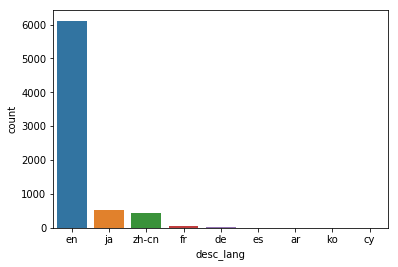

In [29]:
%matplotlib inline
sb.countplot(apps_df['desc_lang'], order = apps_df['desc_lang'].value_counts().index)

In [30]:
apps_df.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'app_desc',
       'desc_lang', 'filtered'],
      dtype='object')

In [31]:
# analysis bits:
# done - word clouds by categories
# - sentiment analysis and correlations with other variables like rating count
# done - lexical diversity
# - tfidf
# done - % by language
# - clustering within categories
# - overall clustering, how well it maps to the actual categories

# new columns:
# - sentiment score
# - lexical diversity

In [52]:
def get_group(df, column, label):
    return df.groupby(column).get_group(label)

def get_corpus(group):
    corpus = ''
    for item, row in group.iterrows():
        line = (' ').join(row['filtered'])
        corpus = corpus + ' ' + line
    return corpus

# get_group(apps_df, 'prime_genre', 'Games').head()
# print(get_corpus(get_group(apps_df, 'prime_genre', 'Games').head()))
genres = list(apps_df['prime_genre'].unique())
desc_lib = dict.fromkeys(genres)
for genre in genres:
    desc_lib[genre] = get_corpus(get_group(apps_df,'prime_genre',genre))

In [58]:
for x in desc_lib:
    print(len(desc_lib[x]))

3676285
253400
102524
124919
82153
140165
205647
241626
102952
151932
122395
78203
268353
516447
410230
55107
636366
129960
74035
75703
104515
34854
12507


In [72]:
# generating dictionary of corpuses
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer(min_df=0, stop_words = 'english',max_features=100)
genre_counts = dict.fromkeys(genres)
genre_words = dict.fromkeys(genres)


for genre in genres:
    genre_counts[genre] = cv.fit_transform([desc_lib[genre]]).toarray().ravel()
    genre_words[genre] = np.array(cv.get_feature_names())
    genre_counts[genre] = genre_counts[genre]/float(genre_counts[genre].max())
    genre_counts[genre]
    print(genre, genre_words[genre])

Games ['achiev' 'action' 'adventur' 'anim' 'app' 'avail' 'battl' 'beauti' 'becom'
 'best' 'big' 'build' 'card' 'challeng' 'charact' 'choos' 'citi' 'collect'
 'come' 'complet' 'control' 'creat' 'custom' 'day' 'design' 'devic'
 'differ' 'discov' 'download' 'earn' 'easi' 'enemi' 'enjoy' 'everi'
 'experi' 'explor' 'facebook' 'featur' 'fight' 'fish' 'free' 'friend' 'fun'
 'game' 'gameplay' 'graphic' 'help' 'hero' 'high' 'inapp' 'includ' 'ipad'
 'iphon' 'item' 'let' 'level' 'like' 'look' 'love' 'make' 'mani' 'match'
 'mobil' 'mode' 'multiplay' 'need' 'new' 'onlin' 'origin' 'play' 'player'
 'pleas' 'power' 'purchas' 'puzzl' 'race' 'real' 'right' 'run' 'save'
 'score' 'set' 'simpl' 'skill' 'special' 'start' 'stori' 'support' 'tap'
 'team' 'time' 'touch' 'uniqu' 'unlock' 'upgrad' 'use' 'want' 'way' 'win'
 'world']
Productivity ['access' 'account' 'add' 'app' 'appl' 'automat' 'best' 'calendar' 'cloud'
 'color' 'complet' 'connect' 'contact' 'creat' 'custom' 'data' 'day'
 'design' 'devic' 'direct'

Entertainment ['access' 'account' 'add' 'allow' 'anim' 'app' 'appl' 'applic' 'avail'
 'best' 'broadcast' 'channel' 'charact' 'check' 'choos' 'collect' 'color'
 'connect' 'content' 'creat' 'custom' 'day' 'design' 'devic' 'download'
 'emoji' 'enjoy' 'entertain' 'episod' 'event' 'everi' 'exclus' 'experi'
 'face' 'famili' 'favorit' 'featur' 'free' 'friend' 'fun' 'game' 'help'
 'hour' 'imag' 'includ' 'inform' 'io' 'ipad' 'iphon' 'keyboard' 'kid' 'let'
 'life' 'like' 'live' 'look' 'love' 'make' 'messag' 'month' 'movi' 'music'
 'network' 'new' 'offici' 'person' 'photo' 'pictur' 'play' 'pleas'
 'privaci' 'program' 'provid' 'purchas' 'real' 'requir' 'right' 'santa'
 'save' 'screen' 'select' 'send' 'servic' 'set' 'share' 'star' 'store'
 'stream' 'subscript' 'support' 'time' 'tv' 'use' 'user' 'video' 'view'
 'want' 'watch' 'work' 'world']
Photo & Video ['add' 'adjust' 'amaz' 'app' 'appli' 'automat' 'background' 'beauti' 'best'
 'camera' 'captur' 'chang' 'choos' 'collag' 'color' 'control' 'creat'


Wordcloud for genre: Games


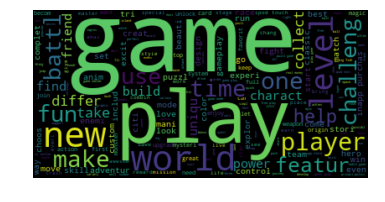

Wordcloud for genre: Productivity


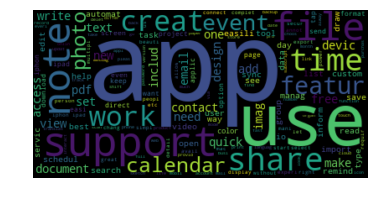

Wordcloud for genre: Weather


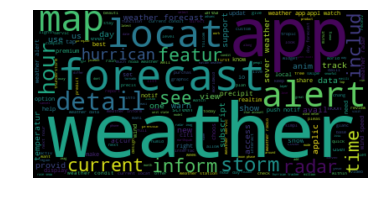

Wordcloud for genre: Shopping


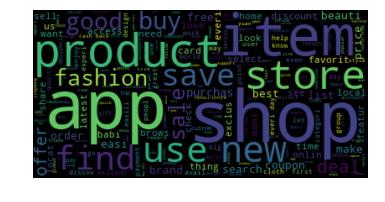

Wordcloud for genre: Reference


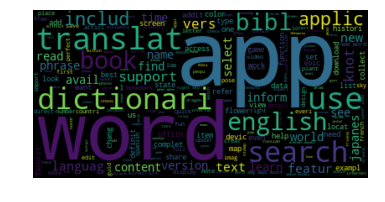

Wordcloud for genre: Finance


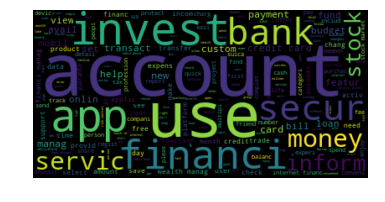

Wordcloud for genre: Music


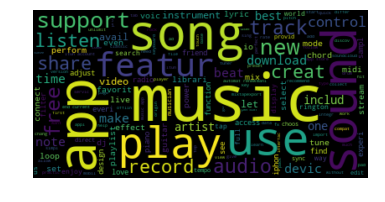

Wordcloud for genre: Utilities


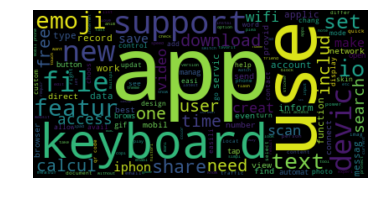

Wordcloud for genre: Travel


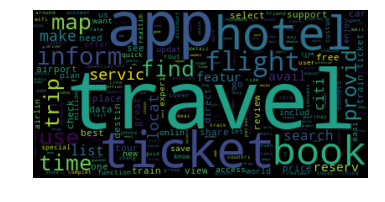

Wordcloud for genre: Social Networking


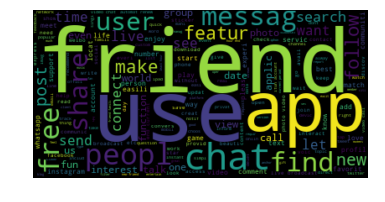

Wordcloud for genre: Sports


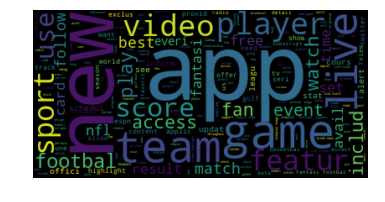

Wordcloud for genre: Business


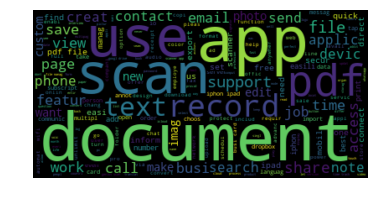

Wordcloud for genre: Health & Fitness


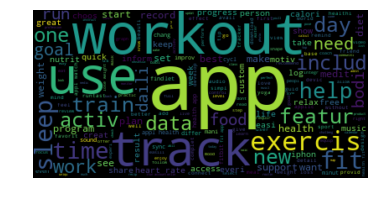

Wordcloud for genre: Entertainment


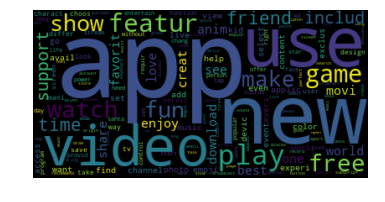

Wordcloud for genre: Photo & Video


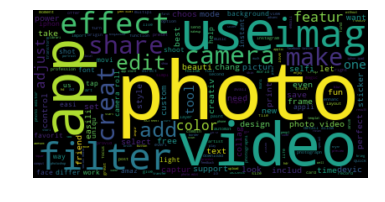

Wordcloud for genre: Navigation


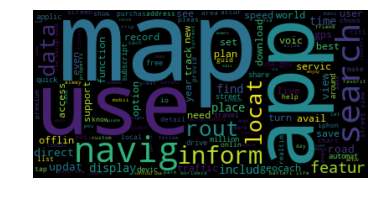

Wordcloud for genre: Education


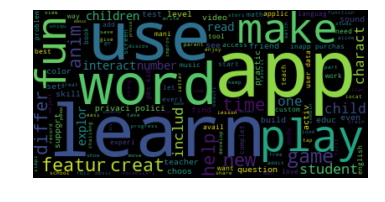

Wordcloud for genre: Lifestyle


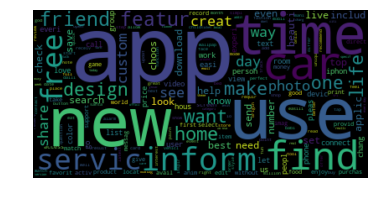

Wordcloud for genre: Food & Drink


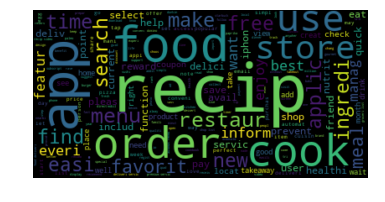

Wordcloud for genre: News


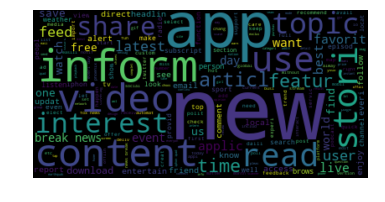

Wordcloud for genre: Book


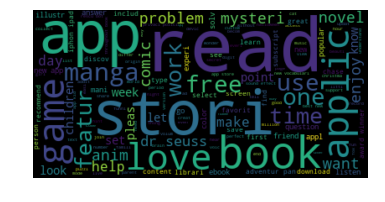

Wordcloud for genre: Medical


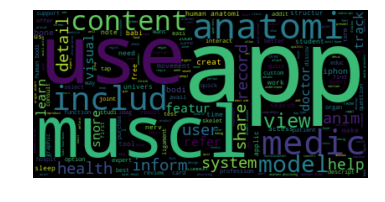

Wordcloud for genre: Catalogs


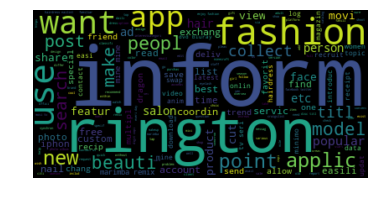

In [79]:
from wordcloud import WordCloud
for genre in genres:
    print('Wordcloud for genre: ' + genre)
    wordcloud = WordCloud().generate(desc_lib[genre])
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

In [80]:
apps_df['lex_score'] = ''
apps_df['sentiment'] = ''

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [101]:
for item, row in apps_df.iterrows():
    apps_df.at[item, 'lex_score'] = float(len(set(row['filtered']))/len(row['filtered']))
# apps_df['lex_score'] = apps_df['lex_score'].astype(float)
apps_df.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
app_desc             object
desc_lang            object
filtered             object
lex_score           float64
sentiment            object
dtype: object

(0.6154134649320987, 0.8)

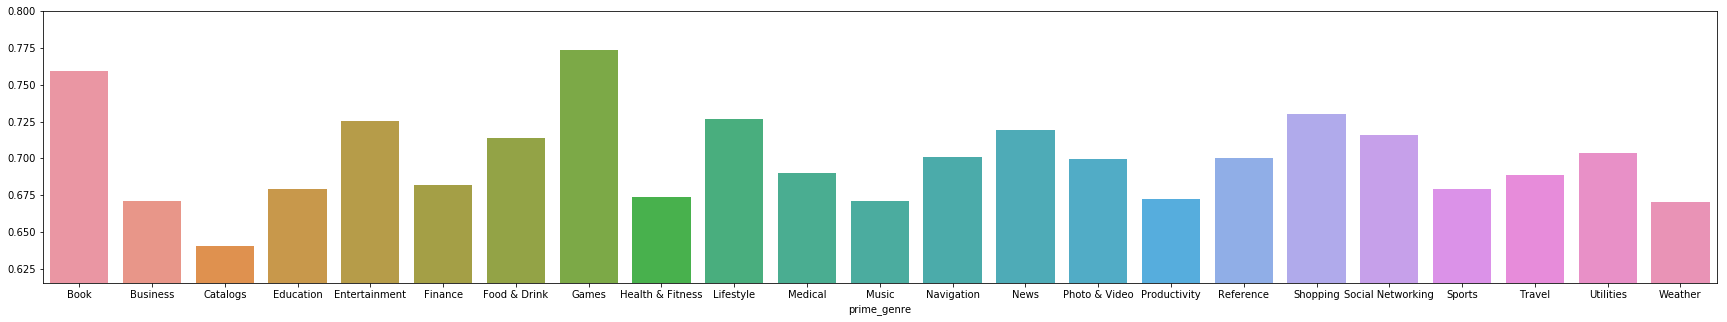

In [146]:
lex_means = apps_df.groupby('prime_genre').mean()['lex_score']

plt.figure(figsize = (30,5))
ax = sb.barplot(x = lex_means.index, y = lex_means.values)
ax.set_ylim(lex_means.values.min() - 0.025,0.8)

In [161]:
# sentiment analysis
from textblob import TextBlob
for item, row in apps_df.iterrows():
    blob = TextBlob(row['app_desc'])
    pol = blob.sentiment.polarity
    apps_df.at[item, 'sentiment'] = float(pol)

In [165]:
apps_df['sentiment'] = apps_df['sentiment'].astype(float)
apps_df.groupby('prime_genre').mean()['sentiment']

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


prime_genre
Book                 0.191724
Business             0.193594
Catalogs             0.256742
Education            0.220332
Entertainment        0.213014
Finance              0.163390
Food & Drink         0.274263
Games                0.151058
Health & Fitness     0.224694
Lifestyle            0.226955
Medical              0.179872
Music                0.238376
Navigation           0.219229
News                 0.218152
Photo & Video        0.262753
Productivity         0.218185
Reference            0.199296
Shopping             0.266099
Social Networking    0.212182
Sports               0.201417
Travel               0.254291
Utilities            0.207793
Weather              0.205879
Name: sentiment, dtype: float64

(0.12605766476133978, 0.29926306316252721)

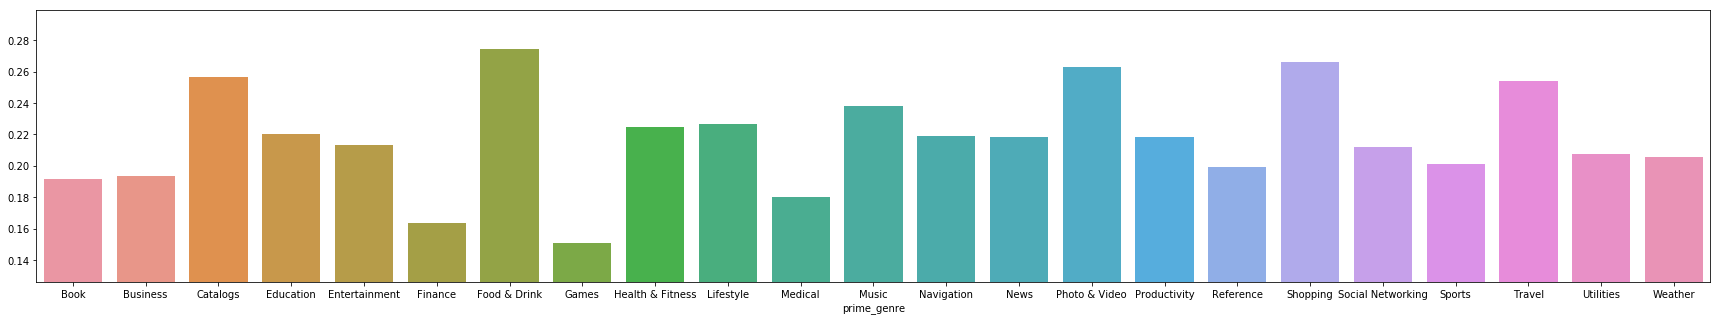

In [170]:
sent_means = apps_df.groupby('prime_genre').mean()['sentiment']

plt.figure(figsize = (30,5))
ax = sb.barplot(x = sent_means.index, y = sent_means.values)
ax.set_ylim(sent_means.values.min() - 0.025,sent_means.values.max() + 0.025)

(0.082392932015573489, 0.42500000000000004)

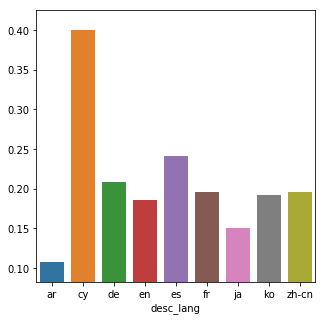

In [188]:
desc_lang_means = apps_df.groupby('desc_lang').mean()['sentiment']

plt.figure(figsize = (5,5))
ax = sb.barplot(x = desc_lang_means.index, y = desc_lang_means.values)
ax.set_ylim(desc_lang_means.values.min() - 0.025,desc_lang_means.values.max() + 0.025)

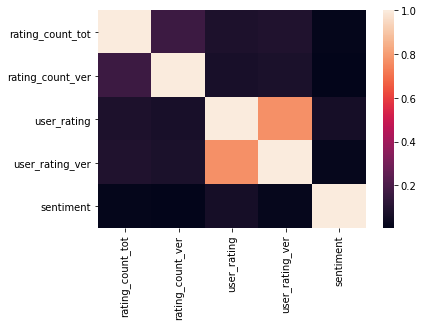

In [186]:
sb.heatmap(apps_df[['rating_count_tot','rating_count_ver','user_rating','user_rating_ver','sentiment']].corr())

In [178]:
list(apps_df.columns)

['Unnamed: 0',
 'id',
 'track_name',
 'size_bytes',
 'currency',
 'price',
 'rating_count_tot',
 'rating_count_ver',
 'user_rating',
 'user_rating_ver',
 'ver',
 'cont_rating',
 'prime_genre',
 'sup_devices.num',
 'ipadSc_urls.num',
 'lang.num',
 'vpp_lic',
 'app_desc',
 'desc_lang',
 'filtered',
 'lex_score',
 'sentiment']

In [189]:
apps_df[['rating_count_tot','rating_count_ver','user_rating','user_rating_ver','sentiment']].corr()

rating_count_tot  rating_count_ver  user_rating  \
rating_count_tot          1.000000          0.163539     0.082611   
rating_count_ver          0.163539          1.000000     0.068418   
user_rating               0.082611          0.068418     1.000000   
user_rating_ver           0.087795          0.077345     0.772491   
sentiment                 0.016761          0.006191     0.060965   

                  user_rating_ver  sentiment  
rating_count_tot         0.087795   0.016761  
rating_count_ver         0.077345   0.006191  
user_rating              0.772491   0.060965  
user_rating_ver          1.000000   0.020826  
sentiment                0.020826   1.000000

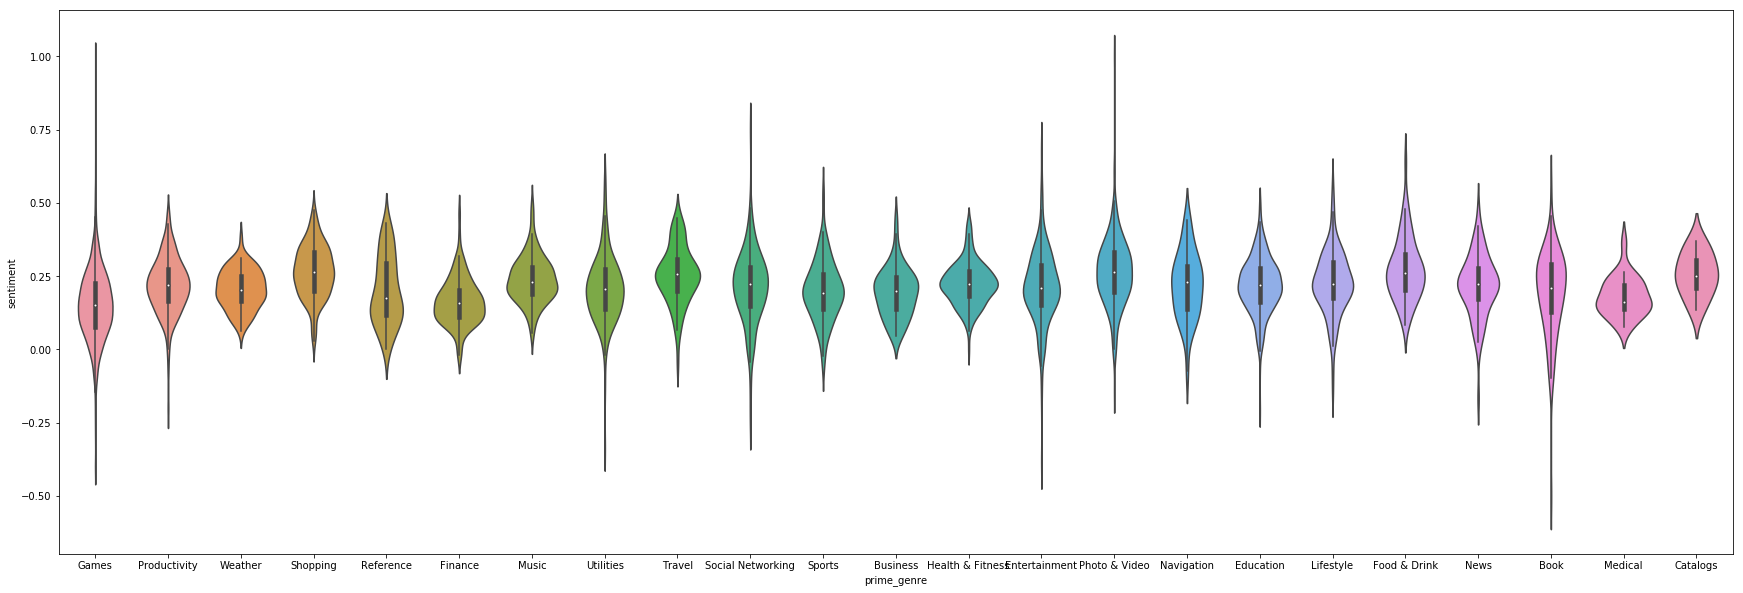

In [203]:
plt.figure(figsize=(30,10))
sb.violinplot(data = apps_df, x = 'prime_genre', y='sentiment')

In [212]:
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

vec = TfidfVectorizer(tokenizer=textblob_tokenizer, stop_words='english',use_idf=True)
matrix = vec.fit_transform(apps_df['app_desc'])
tfidf_df = pd.DataFrame(matrix.toarray(),columns = vec.get_feature_names())
tfidf_df

aa  aaa  aaaa  aaatak  aac  aacappscom  aach  aachen  aalevel  aap  \
0     0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
1     0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
2     0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
3     0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
4     0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
5     0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
6     0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7     0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
8     0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
9     0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
10    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
11    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
12    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
13    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
14    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
15    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
16    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
17    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
18    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
19    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
20    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
21    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
22    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
23    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
24    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
25    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
26    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
27    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
28    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
29    0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
...   ...  ...   ...     ...  ...         ...   ...     ...      ...  ...   
7121  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7122  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7123  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7124  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7125  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7126  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7127  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7128  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7129  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7130  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7131  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7132  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7133  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7134  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7135  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7136  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7137  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7138  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7139  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
7140  0.0  0.0   0.0     0.0  0.0         0.0   0.0     0.0      0.0  0.0   
714

In [215]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10)
kmeans.fit(matrix)
kmeans.fit

<bound method KMeans.fit of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

In [217]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(10):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: kid app learn play word children game privaci thi fun
Cluster 1: app use thi time applic new live make inform video
Cluster 2: subscript period account renew autorenew current itun charg month end
Cluster 3: music song sound rank twitter listen app playlist play artist
Cluster 4: battl game hero enemi fight world player power monster new
Cluster 5: fish enjoy game big discov object collector httpbigfishbigfishtwitt newslett marketplac
Cluster 6: game play puzzl level challeng player new thi fun mode
Cluster 7: photo video camera imag app share filter file edit use
Cluster 8: emoji keyboard minecraft mod app sticker gif thi imessag access
Cluster 9: car race drive game vehicl truck park mode track citi


In [223]:
len(kmeans.labels_)

7151

In [224]:
apps_df['cat_10'] = kmeans.labels_

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [226]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 20)
kmeans.fit(matrix)
kmeans.fit

<bound method KMeans.fit of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

In [227]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(20):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: car race drive game truck vehicl park track racer mode
Cluster 1: kid app play learn children fun parent tabtal game child
Cluster 2: file document pdf scan text support note app email ipad
Cluster 3: app data map user use locat santa thi inform pokemon
Cluster 4: photo video camera filter imag app share edit effect instagram
Cluster 5: ball score jump game tap rank left music right screen
Cluster 6: puzzl game item solv escap level mysteri play tap challeng
Cluster 7: game play player mode new level challeng thi friend fun
Cluster 8: subscript period account renew autorenew current charg itun end month
Cluster 9: slot casino vega machin game win free real gambl money
Cluster 10: battl game hero enemi fight monster world power new war
Cluster 11: weather forecast radar locat alert snow current warn temperatur app
Cluster 12: vr zombi realiti cardboard virtual headset googl experi game mobil
Cluster 13: shop ticket app recip servic food product financi 

In [228]:
apps_df['cat_20'] = kmeans.labels_

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [229]:
apps_df.head()

Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver  ...   ipadSc_urls.num lang.num vpp_lic  \
0          4.0              4.5  ...                 5       10       1   
1          4.0              3.5  ...                 5       23       1   
2          3.5              4.5  ...                 5        3       1   
3          4.0              4.5  ...                 5        9       1   
4          4.5              5.0  ...                 5       45       1   

                                            app_desc  desc_lang  \
0  save  now only  for a limited timeone of the m...         en   
1  let evernote change the way you organize your ...         en   
2  download the most popular free weather app pow...         en   
3  the ebay app is the best way to find anything ...         en   
4  on more than  million devices around the world...         en   

                                            filtered  lex_score sentiment  \
0  [save, limit, timeon, popular, video, game, ar...   0.720000  0.085784   
1  [let, evernot, chang, way, organ, person, prof...   0.611702  0.155892   
2  [download, popular, free, weather, app, power,...   0.600000  0.300616   
3  [ebay, app, best, way, find, anyth, need, dres...   0.550251  0.359656   
4  [million, devic, around, world, peopl, read, l...   0.578014  0.295402   

  cat_10 cat_20  
0      6      7  
1      2      2  
2      1     11  
3      1     13  
4      1     16  

[5 rows x 24 columns]

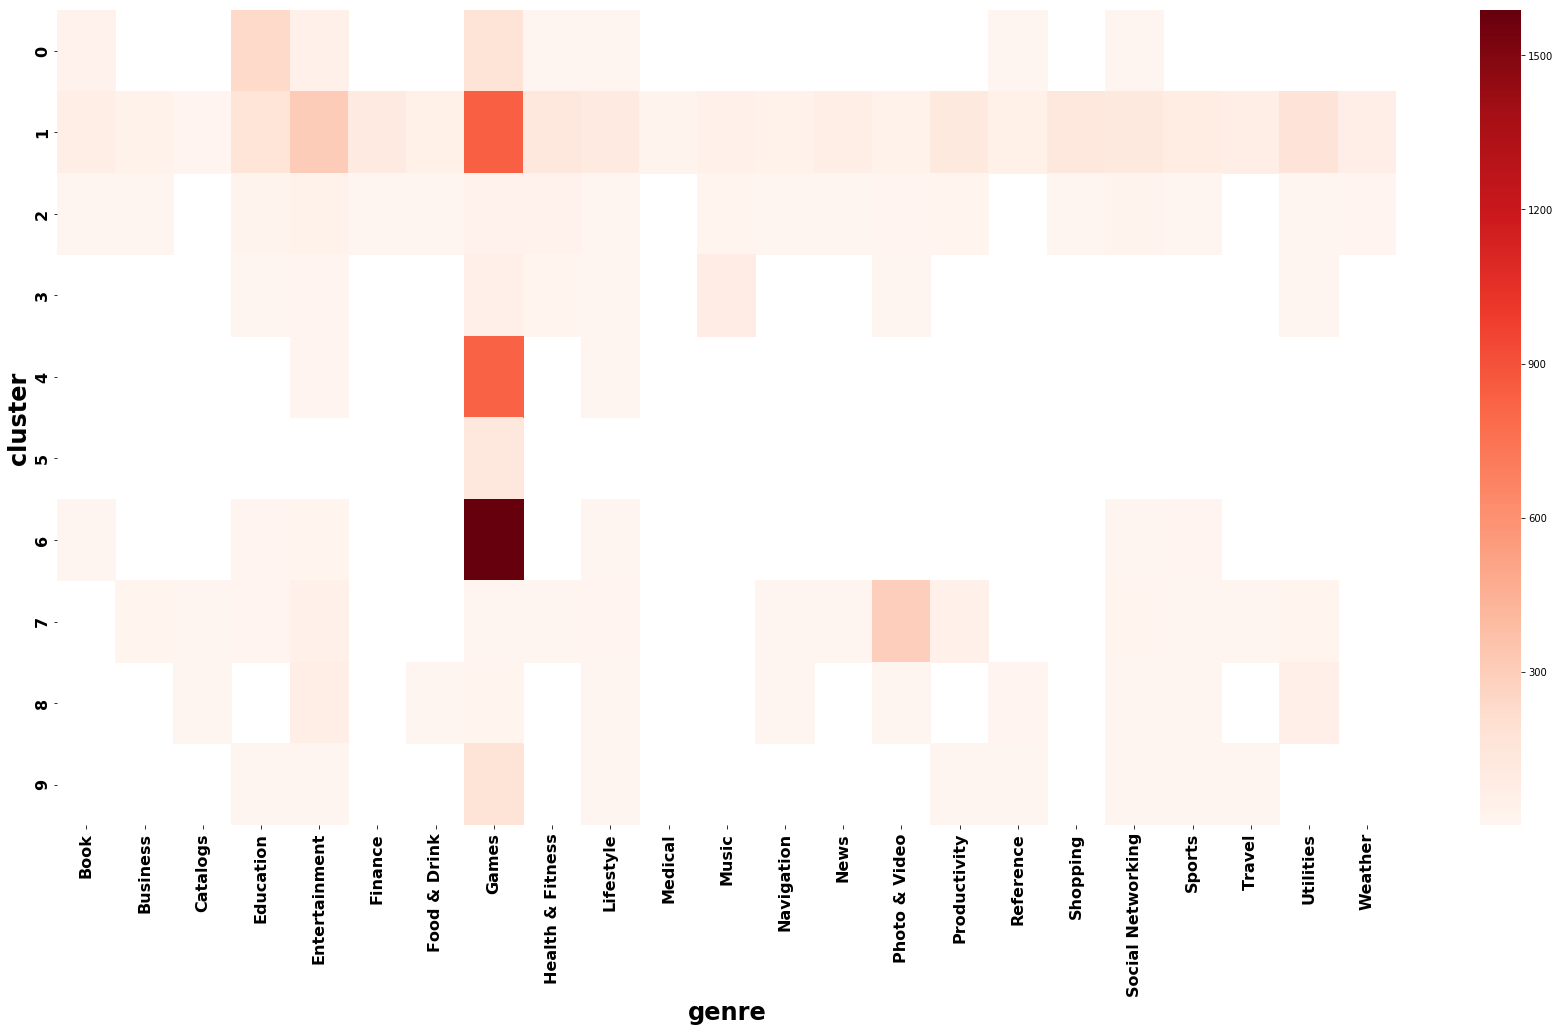

In [233]:
clusters = apps_df.groupby(['cat_10', 'prime_genre']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sb.heatmap(clusters.unstack(level = 'prime_genre'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('genre', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")

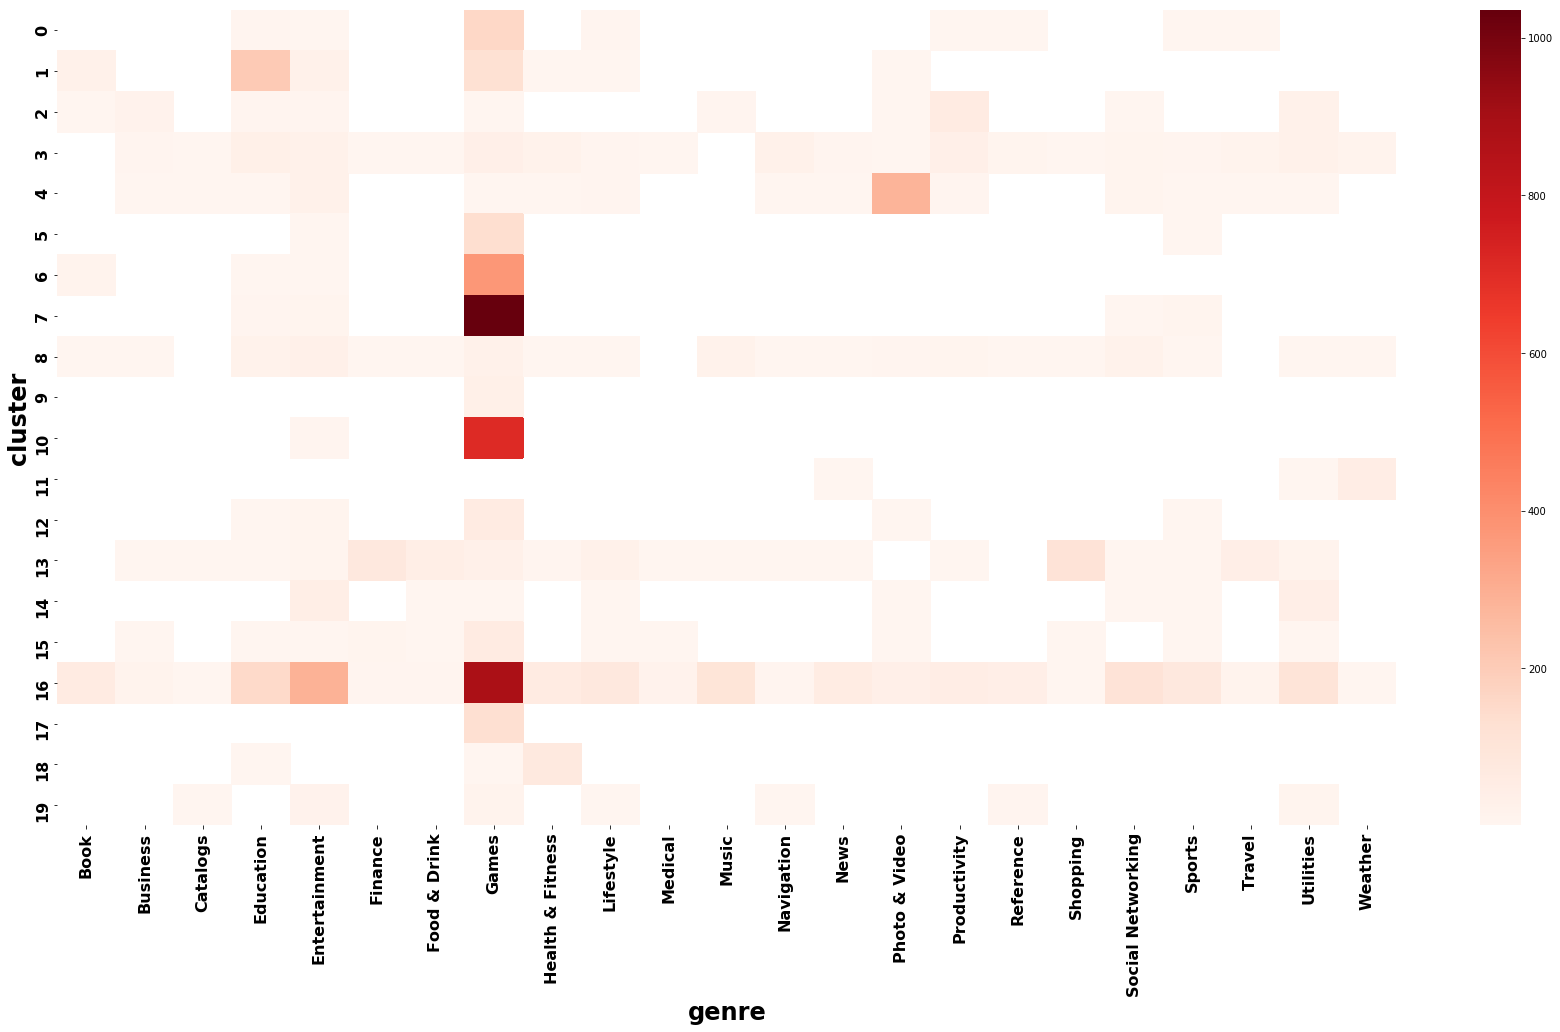

In [234]:
clusters = apps_df.groupby(['cat_20', 'prime_genre']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sb.heatmap(clusters.unstack(level = 'prime_genre'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('genre', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")

In [235]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(matrix)
kmeans.fit

<bound method KMeans.fit of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

In [237]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(5):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: game app play thi kid fun make new word learn
Cluster 1: app use subscript account user inform thi access data live
Cluster 2: game play player new level world challeng mode battl thi
Cluster 3: fish enjoy game big discov object collector httpbigfishbigfishtwitt newslett marketplac
Cluster 4: photo video camera imag share app filter file edit use


In [238]:
apps_df['cat_5'] = kmeans.labels_

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


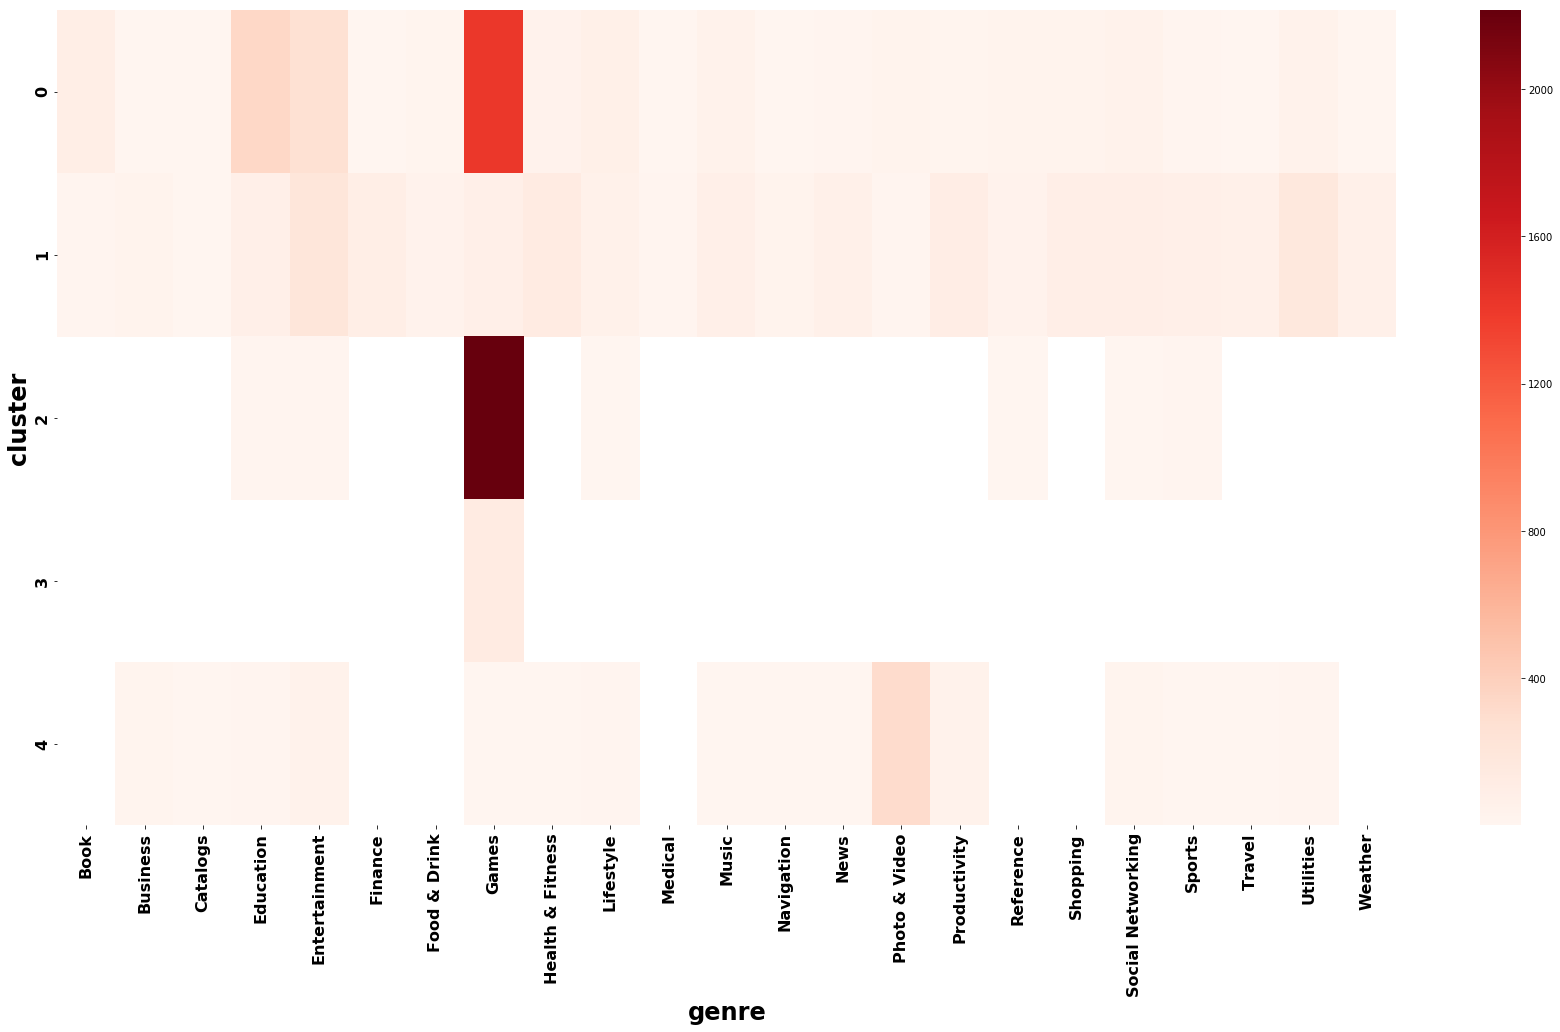

In [239]:
clusters = apps_df.groupby(['cat_5', 'prime_genre']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sb.heatmap(clusters.unstack(level = 'prime_genre'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('genre', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")

In [244]:
for x in desc_lib:
    X = TextBlob(desc_lib[x])
    count = X.words.count('fish')
    print(x,count)

Games 670
Productivity 0
Weather 1
Shopping 2
Reference 2
Finance 1
Music 0
Utilities 0
Travel 0
Social Networking 2
Sports 0
Business 0
Health & Fitness 1
Entertainment 8
Photo & Video 0
Navigation 2
Education 38
Lifestyle 0
Food & Drink 1
News 0
Book 8
Medical 0
Catalogs 0


In [ ]:
# what if without games? new df without games